In [95]:
library(ggplot2)
library(IRdisplay)
library(XAItest)

a <- function(x,y){
    options(repr.plot.width=x, repr.plot.height=y)
}

a(10,5)




In [96]:
options(warn=-1)


In [97]:
list.files("data/scen_ds/")

[1] "classif_bimod.txt"   "classif_circle.txt"  "classif_diffVar.txt"
[4] "classif_relVar.txt"  "regress_parab.txt"   "regress_sinus.txt"

In [98]:
df1 <- read.table("data/scen_ds/classif_diffVar.txt")
df1_short <- df1[,setdiff(colnames(df1), c("diff_distrib01", "diff_distrib02"))]
df2 <- read.table("data/scen_ds/classif_bimod.txt")
df2_short <- df2[,setdiff(colnames(df2), c("diff_distrib01", "diff_distrib02"))]
df3 <- read.table("data/scen_ds/classif_relVar.txt")
df3_short <- df3[,setdiff(colnames(df3), c("diff_distrib01", "diff_distrib02"))]
df4 <- read.table("data/scen_ds/classif_circle.txt")
df4_short <- df4[,setdiff(colnames(df4), c("diff_distrib01", "diff_distrib02"))]
df5 <- read.table("data/scen_ds/regress_parab.txt")
df6 <- read.table("data/scen_ds/regress_sinus.txt")

df1[1:3,1:3]
df2[1:3,1:3]
df3[1:3,1:3]
df4[1:3,1:3]
df5[1:3,1:3]
df6[1:3,1:3]

,y,norm_noise01,norm_noise02
,<chr>,<dbl>,<dbl>
1,A,-1.876532,8.1736207
2,A,-12.699134,-1.9675857
3,A,-12.542217,0.8717875


,y,norm_noise01,norm_noise02
,<chr>,<dbl>,<dbl>
1,A,-5.204427,1.2724080
2,A,2.225210,0.9637928
3,A,-3.955613,-0.8847515


,y,norm_noise01,norm_noise02
,<chr>,<dbl>,<dbl>
1,A,-4.206335,-3.381436
2,A,6.004028,-5.695923
3,A,8.804386,-7.013112


,y,norm_noise01,norm_noise02
,<chr>,<dbl>,<dbl>
1,A,7.612869,-6.234358
2,A,3.925875,-11.568892
3,A,2.375938,-7.093338


,y,norm_noise01,norm_noise02
,<dbl>,<dbl>,<dbl>
1,7.973836,4.847559,4.957615
2,7.938576,4.530617,8.400693
3,7.949509,6.306884,8.943331


,y,norm_noise01,norm_noise02
,<dbl>,<dbl>,<dbl>
1,3.7460292,6.611315,1.063514
2,0.2167224,4.099210,11.770437
3,-4.5046347,-4.031004,3.714968


In [99]:

xaires <- XAI.test(df3, y="y", simData=TRUE, defaultMethods=c("ttest", "ebayes", "cor", "lm",
                            "rf", "lime", "SHAP"))

In [100]:
mpi <- mapPvalImportance(xaires)
head(mpi$df)


,ttest_pval,isSign_ttest_pval,ttest_adjPval,isSign_ttest_adjPval,ebayes_pval,isSign_ebayes_pval,ebayes_adjPval,isSign_ebayes_adjPval,lm_pval,isSign_lm_pval,lm_adjPval,isSign_lm_adjPval,RF_feat_imp,isSign_RF_feat_imp,LIME_feat_imp,isSign_LIME_feat_imp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
diff_distrib02,6.49e-18,1,9.73e-17,1,1.91e-18,1,2.87e-17,1,1.33e-08,1,2.00e-07,1,14.20,1.0,0.15900,1.0
diff_distrib01,7.02e-18,1,1.05e-16,1,1.17e-17,1,1.76e-16,1,7.67e-12,1,1.15e-10,1,14.30,1.0,0.17000,1.0
simFeat,2.99e-03,1,4.49e-02,1,2.80e-03,1,4.20e-02,1,1.44e-02,1,2.16e-01,0,1.56,0.5,0.02890,0.5
norm_noise03,3.11e-01,0,1.00e+00,0,3.24e-01,0,1.00e+00,0,7.40e-01,0,1.00e+00,0,2.36,0.5,0.01710,0.0
norm_noise10,3.12e-01,0,1.00e+00,0,3.04e-01,0,1.00e+00,0,7.79e-01,0,1.00e+00,0,1.91,0.5,0.00862,0.0
norm_noise07,4.09e-01,0,1.00e+00,0,4.21e-01,0,1.00e+00,0,7.02e-01,0,1.00e+00,0,1.23,0.0,0.00499,0.0


In [101]:
getSignificantFeatures <- function(xaires, method="SHAP") {
    mpi <- mapPvalImportance(xaires)
    isSign_col <- paste0("isSign_", method, "_feat_imp")
    signFeats <- rownames(mpi$df[mpi$df[, isSign_col] > 0, ])
    return(signFeats)
}

getSignFeatFromDF <- function(df, method="SHAP") {
    xaires <- XAI.test(df, y="y", simData=TRUE)
    return(getSignificantFeatures(xaires, method))
}

In [102]:
display("signFeats1")
signFeats1 <- getSignFeatFromDF(df1, method="SHAP")
display("signFeats2")
signFeats2 <- getSignFeatFromDF(df2, method="SHAP")
display("signFeats3")
signFeats3 <- getSignFeatFromDF(df3, method="SHAP")
display("signFeats4")
signFeats4 <- getSignFeatFromDF(df4, method="SHAP")
display("signFeats5")
signFeats5 <- getSignFeatFromDF(df5, method="SHAP")
display("signFeats6")
signFeats6 <- getSignFeatFromDF(df6, method="SHAP")


[1] "signFeats1"

[1] "signFeats2"

[1] "signFeats3"

In [18]:
signFeats1
signFeats2
signFeats3
signFeats4
signFeats5
signFeats6


[1] "diff_distrib01" "diff_distrib02" "simFeat"        "diffVar01"

[1] "diff_distrib01" "diff_distrib02" "simFeat"        "biDistrib"

[1] "diff_distrib02" "diff_distrib01" "norm_noise01"   "simFeat"       
 [5] "norm_noise03"   "norm_noise10"   "norm_noise07"   "norm_noise09"  
 [9] "norm_noise08"   "norm_noise06"   "norm_noise02"   "norm_noise05"  
[13] "norm_noise04"   "relVar01"       "relVar02"

[1] "diff_distrib02" "diff_distrib01" "simFeat"

[1] "simFeat"      "norm_noise10" "unif_noise05" "unif_noise06" "norm_noise01"
[6] "unif_noise10"

[1] "simFeat"      "unif_noise01" "unif_noise05" "unif_noise03"

In [19]:
display("signFeats1_RF")
signFeats1_RF <- getSignFeatFromDF(df1, method="RF")
display("signFeats2_RF")
signFeats2_RF <- getSignFeatFromDF(df2, method="RF")
display("signFeats3_RF")
signFeats3_RF <- getSignFeatFromDF(df3, method="RF")
display("signFeats4_RF")
signFeats4_RF <- getSignFeatFromDF(df4, method="RF")
display("signFeats5_RF")
signFeats5_RF <- getSignFeatFromDF(df5, method="RF")
display("signFeats6_RF")
signFeats6_RF <- getSignFeatFromDF(df6, method="RF")

[1] "signFeats1_RF"

[1] "signFeats2_RF"

[1] "signFeats3_RF"

[1] "signFeats4_RF"

[1] "signFeats5_RF"

[1] "signFeats6_RF"

In [20]:
signFeats1_RF
signFeats2_RF
signFeats3_RF
signFeats4_RF
signFeats5_RF
signFeats6_RF

[1] "diff_distrib01" "diff_distrib02" "simFeat"        "diffVar01"

[1] "diff_distrib01" "diff_distrib02" "simFeat"        "biDistrib"

[1] "diff_distrib02" "diff_distrib01" "norm_noise01"   "simFeat"       
[5] "norm_noise05"

[1] "diff_distrib02" "diff_distrib01" "simFeat"        "relVar01"      
[5] "relVar02"

[1] "simFeat"      "norm_noise01"

[1] "simFeat"      "unif_noise01"

In [21]:
display("signFeats1_LIME")
signFeats1_LIME <- getSignFeatFromDF(df1, method="LIME")
display("signFeats2_LIME")
signFeats2_LIME <- getSignFeatFromDF(df2, method="LIME")
display("signFeats3_LIME")
signFeats3_LIME <- getSignFeatFromDF(df3, method="LIME")
display("signFeats4_LIME")
signFeats4_LIME <- getSignFeatFromDF(df4, method="LIME")
display("signFeats5_LIME")
signFeats5_LIME <- getSignFeatFromDF(df5, method="LIME")
display("signFeats6_LIME")
signFeats6_LIME <- getSignFeatFromDF(df6, method="LIME")

[1] "signFeats1_LIME"

[1] "signFeats2_LIME"

[1] "signFeats3_LIME"

[1] "signFeats4_LIME"

[1] "signFeats5_LIME"

[1] "signFeats6_LIME"

In [22]:
signFeats1_LIME
signFeats2_LIME
signFeats3_LIME
signFeats4_LIME
signFeats5_LIME
signFeats6_LIME

[1] "diff_distrib01" "diff_distrib02" "simFeat"        "diffVar01"

[1] "diff_distrib01" "diff_distrib02" "simFeat"        "biDistrib"

[1] "diff_distrib02" "diff_distrib01" "norm_noise01"   "simFeat"

[1] "diff_distrib02" "diff_distrib01" "simFeat"        "norm_noise08"  
[5] "norm_noise03"   "relVar01"       "relVar02"

[1] "simFeat"      "norm_noise01"

[1] "simFeat"      "unif_noise01"

In [26]:
df1$y

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [19] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B"
 [55] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [73] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [91] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"

In [9]:
runif(1)-0.5

[1] -0.1349683

In [85]:
categ = "y"
data <- df1
# Assuming df1 is your data frame and 'categ' is the target column name (as a string)
# Example (if you need to simulate data, uncomment the next lines):
# set.seed(123)
# n <- 200   # number of observations
# p <- 5     # number of predictor variables
# X <- data.frame(matrix(rnorm(n * p), nrow = n))
# names(X) <- paste0("X", 1:p)
# df1 <- data.frame(y = with(X, 3 * X1 - 2 * X2 + rnorm(n)), X)
# categ <- "y"

# 1. Fit Random Forest model on the original data using the target variable 'categ'
fctParamFIPV <- function(data, categ="y", modelType="default", ml_algo="rf", algo_options=list(),
                fi_algo="accuracy", fi_transfo="none",pv_algo="pimp", adjMethod="bonferroni",
                n_perm=100, n_probes=10, shap_nsim=100, verbose=0){
    
    if (!modelType %in% c("classification", "regression", "default")){
        stop("The modelType must be a 'classification',
                    'regression' or 'default'")
    }
    if (modelType == "default"){
        if (is(data[[categ]], "character")){
            modelType <- "classification"
        }
        if (is.numeric(data[[categ]])){
            modelType <- "regression"
        }
    }
    computeTimes <- list()
    predictor_names <- setdiff(names(data), categ)
    data[,setdiff(colnames(data), "y")] <- scale(data[,setdiff(colnames(data), "y")])
    data <- data[sample(1:nrow(data)),]

    jitter_ratio <- 0.00001

    if (modelType == "classification"){
        data[[categ]] <- as.factor(data[[categ]])
    }

    getDTGini <- function(data, categ){
        my_method <- "class"
        if (modelType == "regression"){
            my_method <- "anova"
        }
        my_model <- rpart::rpart(as.formula(paste(categ, "~ .")), data = data, method = my_method)
        orig_importance <- my_model$variable.importance
        orig_importance <- orig_importance[setdiff(colnames(data), categ)]
        orig_importance[is.na(orig_importance)] <- 0
        return(orig_importance)
    }
    getDTShapValues <- function(data, categ){
        my_method <- "class"
        if (modelType == "regression"){
            my_method <- "anova"
        }
        my_model <- rpart::rpart(as.formula(paste(categ, "~ .")), data = data, method = my_method)
        shap_values <- fastshap::explain(my_model, X = data[, setdiff(colnames(data), categ)], pred_wrapper = predict, nsim = shap_nsim)
        shap_values <- colMeans(abs(shap_values))
        return(shap_values)
    }

    getRFShapValues <- function(model, data, predictor_names){
        if (modelType == "regression"){
            shap_values <- fastshap::explain(model, X = data[, predictor_names], pred_wrapper = predict, nsim = shap_nsim)
        }
        if (modelType == "classification"){
            pred_wrapper <- function(object, newdata) {
                predict(object, newdata = newdata, type = "prob")[, "A"]
            }
            shap_values <- fastshap::explain(model, X = data[, predictor_names], pred_wrapper = pred_wrapper, nsim = shap_nsim)
        }
        shap_values <- colMeans(abs(shap_values))
        return(shap_values)
    }

    getKerasOldenImportance <- function(model, data){
        # Extraire les poids du modèle Keras
        weights <- model %>% get_weights()

        W1 <- weights[[1]]
        W2 <- weights[[3]]
        W3 <- weights[[5]]

        n_features <- dim(W1)[1]
        n_hidden1 <- dim(W1)[2]  # 16
        n_hidden2 <- dim(W2)[2]  # 8
        n_outputs <- dim(W3)[2]  # num_classes

        feature_importance <- rep(0, n_features)

        for (i in 1:n_features) {
            for (j in 1:n_hidden1) {
                for (k in 1:n_hidden2) {
                    for (l in 1:n_outputs) {
                        feature_importance[i] <- feature_importance[i] + abs(W1[i, j] * W2[j, k] * W3[k, l])
                    }
                }
            }
        }

        names(feature_importance) <- setdiff(colnames(data), categ)

        return(feature_importance)
    }


    getMLPOldenImportance <- function(data){
        library(keras)
        temp_df <- data
        
        cols_to_scale <- setdiff(names(temp_df), categ)
        temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

        col_means <- colMeans(temp_df[cols_to_scale])
        col_sds <- apply(temp_df[cols_to_scale], 2, sd)

        n <- nrow(temp_df)
        train_data <- temp_df
        test_data  <- temp_df

        # Préparation des données :
        # Séparer les variables explicatives et la variable cible
        X_train <- as.matrix(train_data[, setdiff(names(train_data), categ)])
        X_test  <- as.matrix(test_data[, setdiff(names(test_data), categ)])

        if (modelType == "classification"){
            # Pour le modèle Keras, il faut encoder la variable cible en one-hot
            num_classes <- length(levels(temp_df[[categ]]))
            # Convertir les classes en indices (commençant par 0)
            y_train <- as.integer(train_data[[categ]]) - 1  
            y_test  <- as.integer(test_data[[categ]]) - 1

            # Encodage one-hot
            y_train <- to_categorical(y_train, num_classes = num_classes)
            y_test  <- to_categorical(y_test, num_classes = num_classes)
        }
        if (modelType == "regression"){
            y_train <- train_data[[categ]]
            y_test  <- test_data[[categ]]
        }

        if (modelType == "classification"){
            model <- keras_model_sequential() %>%
            # Première couche cachée avec 4 neurones et activation ReLU
            layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
            # Dropout classique (20% des neurones désactivés aléatoirement)
            layer_dropout(rate = 0.2) %>%
            # Deuxième couche cachée avec 2 neurones et activation ReLU
            layer_dense(units = 8, activation = "relu") %>%
                layer_dropout(rate = 0.2) %>%
                
            # Deuxième couche cachée avec 2 neurones et activation ReLU

            # Couche de sortie : softmax pour la classification multi-classes
            layer_dense(units = num_classes, activation = "softmax")
        } else {
            model <- keras_model_sequential() %>%
            layer_dense(
                units = 32, 
                activation = "relu", 
                input_shape = ncol(X_train),
                kernel_regularizer = regularizer_l2(l = 0.001)  # Régularisation L2
            ) %>%
            layer_dropout(rate = 0.2) %>%
            
            layer_dense(
                units = 16, 
                activation = "relu",
                kernel_regularizer = regularizer_l2(l = 0.001)  # Régularisation L2
            ) %>%
            
            # Couche de sortie pour la régression (1 neurone, activation linéaire par défaut)
            layer_dense(units = 1)
        }

        if (modelType == "classification"){
            my_loss <- "categorical_crossentropy"
            model %>% compile(
                loss = my_loss,
                optimizer = optimizer_adam(),
                metrics = c("accuracy")
            )
        }
        if (modelType == "regression"){
            my_loss <- "mean_squared_error"
                model %>% compile(
                    loss = my_loss,
                    optimizer = optimizer_adam(learning_rate = 0.01),
                    metrics = c("mean_absolute_error")
                )
        }

        model %>% compile(
            loss = my_loss,
            optimizer = optimizer_adam(),
            metrics = c("accuracy")
        )

        summary(model)

        history <- model %>% fit(
            X_train, y_train,
            #epochs = 5000,          # ajustez le nombre d'epochs selon vos besoins
            epochs = 100, 
            batch_size = 32,       # ajustez la taille de batch
            validation_split = 0.2,
            verbose = 0
        )

        # Évaluation sur l'ensemble de test
        #score <- model %>% evaluate(X_test, y_test_cat)
        #score
        my_res <- getKerasOldenImportance(model, data)
        return(my_res)
    }

    getMLPShapValues <- function(data){
        library(keras)
        temp_df <- data
        
        cols_to_scale <- setdiff(names(temp_df), categ)
        temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

        col_means <- colMeans(temp_df[cols_to_scale])
        col_sds <- apply(temp_df[cols_to_scale], 2, sd)

        n <- nrow(temp_df)
        train_data <- temp_df
        test_data  <- temp_df

        # Préparation des données :
        # Séparer les variables explicatives et la variable cible
        X_train <- as.matrix(train_data[, setdiff(names(train_data), categ)])
        X_test  <- as.matrix(test_data[, setdiff(names(test_data), categ)])

        # Pour le modèle Keras, il faut encoder la variable cible en one-hot
        if (modelType == "classification"){
            num_classes <- length(levels(temp_df[[categ]]))
            # Convertir les classes en indices (commençant par 0)
            y_train <- as.integer(train_data[[categ]]) - 1  
            y_test  <- as.integer(test_data[[categ]]) - 1

            # Encodage one-hot
            y_train <- to_categorical(y_train, num_classes = num_classes)
            y_test  <- to_categorical(y_test, num_classes = num_classes)
        }
        if (modelType == "regression"){
            y_train <- train_data[[categ]]
            y_test  <- test_data[[categ]]
        }

        # Construction du modèle MLP
        if (modelType == "classification"){
            model <- keras_model_sequential() %>%
            # Première couche cachée avec 4 neurones et activation ReLU
            layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
            # Dropout classique (20% des neurones désactivés aléatoirement)
            layer_dropout(rate = 0.2) %>%
            # Deuxième couche cachée avec 2 neurones et activation ReLU
            layer_dense(units = 8, activation = "relu") %>%
                layer_dropout(rate = 0.2) %>%
                
            # Deuxième couche cachée avec 2 neurones et activation ReLU

            # Couche de sortie : softmax pour la classification multi-classes
            layer_dense(units = num_classes, activation = "softmax")
        } else {
            model <- keras_model_sequential() %>%
            layer_dense(
                units = 32, 
                activation = "relu", 
                input_shape = ncol(X_train),
                kernel_regularizer = regularizer_l2(l = 0.001)  # Régularisation L2
            ) %>%
            layer_dropout(rate = 0.2) %>%
            
            layer_dense(
                units = 16, 
                activation = "relu",
                kernel_regularizer = regularizer_l2(l = 0.001)  # Régularisation L2
            ) %>%
            
            # Couche de sortie pour la régression (1 neurone, activation linéaire par défaut)
            layer_dense(units = 1)
        }

        if (modelType == "classification"){
            my_loss <- "categorical_crossentropy"
            model %>% compile(
                loss = my_loss,
                optimizer = optimizer_adam(),
                metrics = c("accuracy")
            )
        }
        if (modelType == "regression"){
            my_loss <- "mean_squared_error"
            model %>% compile(
                loss = my_loss,
                optimizer = optimizer_adam(learning_rate = 0.01),
                metrics = c("mean_absolute_error")
            )
        }


        summary(model)

        history <- model %>% fit(
            X_train, y_train,
            #epochs = 5000,        # ajustez le nombre d'epochs selon vos besoins
            epochs = 100, 
            batch_size = 32,       # ajustez la taille de batch
            validation_split = 0.2,
            verbose = 0
        )
        pred_wrapper <- function(object, newdata, ...) {
            predict(object, newdata)[, 1]
        }
        shap_values <- fastshap::explain(object=model, X = X_train, pred_wrapper = pred_wrapper, nsim = shap_nsim)
        shap_values <- colMeans(abs(shap_values))
        return(shap_values)
    }

    getSVMShapValues <- function(data){
        str_kern <- unlist(strsplit(ml_algo, 'svm-'))[2]
        #str_kern <- "rbfdot"
        svm_model_ksvm <- kernlab::ksvm(as.formula(paste(categ, "~ .")), 
                       data = data, 
                       kernel = str_kern,   # Noyau polynomial rbfdot polydot
                       prob.model = TRUE)
        X <- data[, setdiff(colnames(data), categ)]
        pred_fun <- function(model, newdata) {
            probs <- kernlab::predict(model, newdata, type = "probabilities")
            return(probs[, 1])
        }
        shap_values <- fastshap::explain(svm_model_ksvm, 
                                        X = X, 
                                        pred_wrapper = pred_fun, 
                                        nsim = shap_nsim)
        shap_importance <- colMeans(abs(shap_values))
    }

    getSVMCoeffValues <- function(data){
        display("getSVMCoeffValues")
        str_kern <- unlist(strsplit(ml_algo, 'svm-'))[2]
        #str_kern <- "rbfdot"
        svm_model_ksvm <- kernlab::ksvm(as.formula(paste(categ, "~ .")), 
                       data = data, 
                       kernel = str_kern,   # Noyau polynomial rbfdot polydot
                       prob.model = TRUE)
                       # Extraction des coefficients (alpha) pour le cas binaire
        alphas <- coef(svm_model_ksvm)

        # Extraction des vecteurs de support et conversion en matrice
        SV <- do.call(rbind, svm_model_ksvm@xmatrix)

        # Calcul du vecteur de poids (w)
        w <- t(alphas) %*% SV

        # Pour obtenir une importance relative des features,
        # on peut utiliser la valeur absolue des coefficients:
        feature_importance <- as.vector(abs(w))

        # Affichage du vecteur d'importance
        display("feature_importance")
        display(feature_importance)

        # Optionnel : association aux noms des colonnes (features)
        names(feature_importance) <- colnames(SV)
        return(feature_importance)
    }

    start_time <- Sys.time()
    
    if (ml_algo == "mlp"){
        if (fi_algo == "olden"){
            orig_importance <- getMLPOldenImportance(data)
        }
        if (fi_algo == "shap"){
            orig_importance <- getMLPShapValues(data)
        }
    }

    if (ml_algo == "rf"){
        my_model <- randomForest::randomForest(as.formula(paste(categ, "~ .")), data = data, importance = TRUE)
        if (fi_algo %in% c("gini", "accuracy")){
            my_type <- 1
            if (fi_algo == "gini"){
                my_type <- 2
            }
            orig_importance <- randomForest::importance(my_model, type = my_type)[, 1]
        }   
        if (fi_algo == "shap"){
            orig_importance <- getRFShapValues(my_model, data, predictor_names)
        }
    }

    if (ml_algo == "dt"){
        if (fi_algo == "gini"){
            orig_importance <- getDTGini(data, categ)
        }
        if (fi_algo == "shap"){
            orig_importance <- getDTShapValues(data, categ)
        }
    }

    if (unlist(strsplit(ml_algo, '-'))[1] == "svm"){
        if (fi_algo == "shap"){
            orig_importance <- getSVMShapValues(data)
        }
        if(fi_algo == "coeff"){
            display("before getSVMCoeffValues")
            orig_importance <- getSVMCoeffValues(data)
            display("after getSVMCoeffValues")
        }
    }

    if (verbose>0){
        cat("Observed importance:\n")
        print(orig_importance)
    }
    display("before orig_importance")
        display(orig_importance)
    if (fi_transfo == "rank" || fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
        temp_names <- names(orig_importance)
        #orig_importance <- scale(orig_importance)
        if (fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
            toadd <- ((runif(length(orig_importance))-0.5)*jitter_ratio*orig_importance)
            toadd[toadd==0] <- jitter_ratio * min(abs(orig_importance[orig_importance!=0])) * (runif(sum(toadd==0))-0.5)
            orig_importance <- orig_importance + toadd
        }
        if(fi_transfo != "jitter"){
            orig_importance <- rank(abs(orig_importance))
            # orig_importance <- abs(orig_importance)
        }
        names(orig_importance) <- temp_names
        
    }

    if (verbose>0){
        cat("Observed importance:\n")
        print(orig_importance)
    }
            display(orig_importance)

    end_time <- Sys.time()
    computeTimes[["diff_time1"]] <-  difftime(end_time, start_time, units="secs")
    
    start_time <- Sys.time()
    if (pv_algo == "probes"){
        n_perm <- n_perm   # Nombre de répétitions (permutations)
        n_probes <- n_probes   # Nombre de colonnes probes à ajouter par permutation
        # Vecteur pour stocker toutes les importances obtenues pour les probes
        #probe_importances <- c()
        df_probe_importances <- as.data.frame(matrix(nrow = 0, ncol = length(orig_importance)))
        colnames(df_probe_importances) <- names(orig_importance)
        # Pour chaque permutation, on ajoute nprobes colonnes aléatoires et on ajuste le modèle
        # display(paste0("Permutation ", 0, " sur ", n_perm))
        for(i in 1:n_perm){
            #display(paste0("Permutation ", i, " sur ", n_perm))
            # Copier le jeu de données original
            if (verbose>0){
                cat("Probes permutation ", i, " sur ", n_perm, "\n")
            }
            message("Probes permutation ", i, " sur ", n_perm)
            data_perm <- data
            # Ajouter nprobes colonnes de bruit (probes)
            for(j in 1:n_probes){
                probe_name <- paste0("probe_", j)
                data_perm[[probe_name]] <- rnorm(nrow(data))  # bruit normal standard
            }
            # Ajuster un modèle sur le jeu de données étendu
            if (ml_algo == "rf"){
                model_perm <- randomForest::randomForest(as.formula(paste(categ, "~ .")), data = data_perm, importance = TRUE)
                if (fi_algo %in% c("gini", "accuracy")){
                    imp_perm <- randomForest::importance(model_perm, type = my_type)[,1]
                }
                if (fi_algo == "shap"){
                    imp_perm <- getRFShapValues(model_perm, data_perm, setdiff(colnames(data_perm), categ))
                }
            }
            if (ml_algo == "dt"){
                if (fi_algo == "gini"){
                    imp_perm <- getDTGini(data_perm, categ)
                }
                if (fi_algo == "shap"){
                    imp_perm <- getDTShapValues(data_perm, categ)
                }
            }
                    
            if (ml_algo == "mlp"){
                if (fi_algo == "olden"){
                    imp_perm <- getMLPOldenImportance(data_perm)
                }
                if (fi_algo == "shap"){
                    imp_perm <- getMLPShapValues(data_perm)
                }
            }
            if (unlist(strsplit(ml_algo, '-'))[1] == "svm"){
                if (fi_algo == "shap"){
                    imp_perm <- getSVMShapValues(data_perm)
                }
                if(fi_algo == "coeff"){
                    imp_perm <- getSVMCoeffValues(data_perm)
                }
            }
            #if (fi_algo == "olden" || fi_algo == "shap"){
            if (fi_transfo == "rank" || fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
                temp_names <- names(imp_perm)
                #imp_perm <- scale(imp_perm)[,1]
                if (fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
                    toadd <- ((runif(length(imp_perm))-0.5)*jitter_ratio*imp_perm)
                    toadd[toadd==0] <- jitter_ratio * min(abs(imp_perm[imp_perm!=0])) * (runif(sum(toadd==0))-0.5)
                    imp_perm <- imp_perm + toadd
                }
                if(fi_transfo != "jitter"){
                    imp_perm <- rank(abs(imp_perm))-n_probes
                    # imp_perm <- abs(imp_perm)
                }
                names(imp_perm) <- temp_names
            }

            # Conserver uniquement les colonnes probes (leurs noms commencent par "probe_")
            probe_imp_vals <- imp_perm[grep("probe_", names(imp_perm))]
            # Ajouter ces importances au vecteur global
            #probe_importances <- c(probe_importances, probe_imp_vals)

            p_values <- sapply(names(orig_importance), function(feat) {
                (1 + sum(probe_imp_vals >= imp_perm[feat])) / (length(probe_imp_vals) + 1)
            })
            df_probe_importances <- rbind(df_probe_importances, p_values)
            # names(p_values) <- names(orig_importance)
        }

        #p_values <- sapply(names(orig_importance), function(feat) {
        #    (1 + sum(probe_importances >= orig_importance[feat])) / (length(probe_importances) + 1)
        #})
        #names(p_values) <- names(orig_importance)

    # Calculate p-values as the column means of df_probe_importances
        if (nrow(df_probe_importances) > 0) {
            p_values <- colMeans(df_probe_importances, na.rm = TRUE)
            names(p_values) <- names(orig_importance)
        }
    }

    if (pv_algo == "pimp"){
        # 2. Estimate the null distribution by permuting the target variable
        n_perm <- n_perm  # number of permutations (increase for more robustness)
        # Determine predictor names (all columns except the target)
        if (verbose > 0){
            cat("Predictor names: ", predictor_names, "\n")
        }

        p <- length(predictor_names)
        importance_null <- matrix(NA, nrow = n_perm, ncol = p)
        colnames(importance_null) <- predictor_names
        for (i in 1:n_perm) {
            data_perm <- data
            # Permute the target variable to break the relationship between predictors and target
            if (verbose>0){
                cat("Pimp permutation ", i, " sur ", n_perm, "\n")
            }
            message("Pimp permutation ", i, " sur ", n_perm)
            data_perm[[categ]] <- sample(data_perm[[categ]])
            if (ml_algo == "mlp"){
                if (fi_algo == "olden"){
                    importance_null[i, ] <- getMLPOldenImportance(data_perm)
                }
                if (fi_algo == "shap"){
                    importance_null[i, ] <- getMLPShapValues(data_perm)
                }
            }
            if (ml_algo == "rf"){
                model_perm <- randomForest::randomForest(as.formula(paste(categ, "~ .")), data = data_perm, importance = TRUE)
                if (fi_algo %in% c("gini", "accuracy")){
                    importance_null[i, ] <- randomForest::importance(model_perm, type = my_type)[, 1]
                }
                if (fi_algo == "shap"){
                    importance_null[i, ] <- getRFShapValues(model_perm, data_perm, setdiff(colnames(data_perm), categ))
                }

            }
            if (ml_algo == "dt"){
                if (fi_algo == "gini"){
                    importance_null[i, ] <- getDTGini(data_perm, categ)
                }
                if (fi_algo == "shap"){
                    importance_null[i, ] <- getDTShapValues(data_perm, categ)
                }
            }
            if (unlist(strsplit(ml_algo, '-'))[1] == "svm"){
                if (fi_algo == "shap"){
                    importance_null[i, ] <- getSVMShapValues(data_perm)
                }
                if(fi_algo == "coeff"){
                    importance_null[i, ] <- getSVMCoeffValues(data_perm)
                }
            }
        }
        # 3. Calculate p-values: proportion of permutations where the null importance exceeds the observed importance
        #display(importance_null)
        #display(orig_importance)
        if (fi_transfo == "rank" || fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
            temp_names <- colnames(importance_null)
            importance_null <- t(apply(importance_null, 1, function(x) {
                #scale(abs(x))
                y <- x
                #display("orig x")
                #display(x)
                if (fi_transfo == "rank+jitter" || fi_transfo == "jitter"){
                    toadd <- ((runif(length(x))-0.5)*jitter_ratio*x)
                    toadd[toadd==0] <- jitter_ratio * min(abs(x[x!=0])) * (runif(sum(toadd==0))-0.5)
                    y <- y + toadd
                }
                if(fi_transfo != "jitter"){
                    y <- rank(abs(y))
                }
                return(y)
            }))
            colnames(importance_null) <- temp_names
        }
        #display(importance_null)
        #display(orig_importance)
        #display("importance_null[,'diff_distrib02']")
        #display(importance_null[,"diff_distrib02"])
        #display("orig_importance['diff_distrib02']")
        #display(orig_importance["diff_distrib02"])
        
        p_values <- sapply(1:p, function(j) {
            if ( is.na(orig_importance[j]) ){
                return(1)
            }
            (1 + sum(importance_null[, j] >= orig_importance[j])) / (n_perm + 1)
        })
        names(p_values) <- predictor_names

        if ( verbose > 0){
            cat("\nP-values obtained by the PIMP method:\n")
            print(p_values)
        }
    }

    cols2keep <- setdiff(colnames(data), categ)
    p_values <- p_values[cols2keep]

    if (verbose > 0){
        print("p_values")
        print(p_values)
    }
    adjPvals <- p.adjust(p_values, method = adjMethod)
    featImps <- orig_importance[cols2keep]
    featImps[is.na(featImps)] <- 0

    end_time <- Sys.time()
    computeTimes[["diff_time2"]] <-  difftime(end_time, start_time, units="secs")

    my_res <- list( featImps=orig_importance[cols2keep],
                    pvals=p_values,
                    adjPvals=adjPvals,
                    computeTimes=computeTimes)
    return(my_res)
}

In [103]:
# vanilladot
# rbfdot
xaires_fipv <- XAI.test(df5, y="y", simData=F, defaultMethods=c("ttest", "ebayes", "cor", "lm",
                            "rf"), customFIPV=list("try1"=function(data, ...) {
  fctParamFIPV(data=data, fi_algo="shap", pv_algo="probes", ml_algo="dt", fi_transfo="rank+jitter", n_perm=1, shap_nsim = 2, verbose=0,...)
}))

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
    1.156298     0.000000     0.000000     0.000000     0.000000     0.000000 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
unif_noise09 unif_noise10 
    0.000000     0.000000

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          20            8           10           17           12           15 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          19            3           11            1            7           13 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           5            4            6           14            2           16 
unif_noise09 unif_noise10 
           9           18

Probes permutation 1 sur 1



In [106]:
my_combin <- c()
my_ml_algo <- "dt"
for (my_df in c("df1", "df1Short", "df2", "df2Short", "df3", "df3Short", "df4", "df4Short")){
    for (my_fi_algo in c("gini", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "none"
            if(my_fi_algo == "shap"){
                my_fi_transfo <- "rank+jitter"
            }
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "rf"
for (my_df in c("df1", "df1Short", "df2", "df2Short", "df3", "df3Short", "df4", "df4Short")){
    for (my_fi_algo in c("accuracy", "gini", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "none"
            if(my_fi_algo == "shap"){
                my_fi_transfo <- "rank+jitter"
            }
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "svm-vanilladot"
for (my_df in c("df1", "df1Short", "df2", "df2Short", "df3", "df3Short", "df4", "df4Short")){
    for (my_fi_algo in c("shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "rank+jitter"
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "svm-rbfdot"
for (my_df in c("df1", "df1Short", "df2", "df2Short", "df3", "df3Short", "df4", "df4Short")){
    for (my_fi_algo in c("shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "rank+jitter"
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "mlp"
for (my_df in c("df1", "df1Short", "df2", "df2Short", "df3", "df3Short", "df4", "df4Short")){
    for (my_fi_algo in c("olden", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "rank+jitter"
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "dt"
for (my_df in c("df5", "df6")){
    for (my_fi_algo in c("gini", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "none"
            if(my_fi_algo == "shap"){
                my_fi_transfo <- "rank+jitter"
            }
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}
my_ml_algo <- "rf"
for (my_df in c("df5", "df6")){
    for (my_fi_algo in c("accuracy", "gini", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "none"
            if(my_fi_algo == "shap"){
                my_fi_transfo <- "rank+jitter"
            }
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}

my_ml_algo <- "mlp"
for (my_df in c("df5", "df6")){
    for (my_fi_algo in c("olden", "shap")){
        for(my_pv_algo in c("probes", "pimp")){
            my_n_perm <- 100; my_shap_nsim <- 10; my_fi_transfo <- "rank+jitter"
            str_combin <- paste0(my_df, "_", my_ml_algo, "_", my_fi_algo, "_", my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim)
            my_combin <- c(my_combin, str_combin)
        }
    }
}

head(my_combin)

[1] "df1_dt_gini_probes_none_100_10"       
[2] "df1_dt_gini_pimp_none_100_10"         
[3] "df1_dt_shap_probes_rank+jitter_100_10"
[4] "df1_dt_shap_pimp_rank+jitter_100_10"  
[5] "df1Short_dt_gini_probes_none_100_10"  
[6] "df1Short_dt_gini_pimp_none_100_10"

In [92]:
my_df = "df4"
my_ml_algo = "dt"
my_fi_algo = "gini"
my_pv_algo = "pimp"
my_fi_transfo = "none"
my_n_perm = 100
my_shap_nsim = 10
# df1_svm-rbfdot_shap_pimp_rank+jitter_100_10
# df4_rf_accuracy_pimp_none_100_10.rds
# /df4_dt_gini_pimp_none_100_10.rds

        xaires_fipv <- XAI.test(l_df_corres[[my_df]], y="y", simData=F, customFIPV=list("try1"=function(data, ...) {
            fctParamFIPV(data=data, fi_algo=my_fi_algo, pv_algo=my_pv_algo, ml_algo=my_ml_algo,
            fi_transfo=my_fi_transfo, n_perm=my_n_perm, shap_nsim = my_shap_nsim, verbose=0,...)
        }))

[1] "before orig_importance"

norm_noise01   norm_noise02           <NA>           <NA>   norm_noise05 
     1.9036782      4.9397920      0.0000000      0.0000000      7.7625303 
  norm_noise06           <NA>           <NA>   norm_noise09   norm_noise10 
     0.9518391      0.0000000      0.0000000      0.9518391      0.9518391 
diff_distrib01 diff_distrib02       relVar01       relVar02 
    17.9866057     29.6387521      6.3511612      7.0896247

norm_noise01   norm_noise02           <NA>           <NA>   norm_noise05 
     1.9036782      4.9397920      0.0000000      0.0000000      7.7625303 
  norm_noise06           <NA>           <NA>   norm_noise09   norm_noise10 
     0.9518391      0.0000000      0.0000000      0.9518391      0.9518391 
diff_distrib01 diff_distrib02       relVar01       relVar02 
    17.9866057     29.6387521      6.3511612      7.0896247

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

In [90]:
        xaires_fipv <- XAI.test(l_df_corres[[my_df]], y="y", simData=F, customFIPV=list("try1"=function(data, ...) {
            fctParamFIPV(data=data, fi_algo=my_fi_algo, pv_algo=my_pv_algo, ml_algo=my_ml_algo,
            fi_transfo=my_fi_transfo, n_perm=my_n_perm, shap_nsim = my_shap_nsim, verbose=0,...)
        }))

[1] "before orig_importance"

norm_noise01   norm_noise02           <NA>           <NA>   norm_noise05 
     1.9036782      4.9397920      0.0000000      0.0000000      7.7625303 
  norm_noise06           <NA>           <NA>   norm_noise09   norm_noise10 
     0.9518391      0.0000000      0.0000000      0.9518391      0.9518391 
diff_distrib01 diff_distrib02       relVar01       relVar02 
    17.9866057     29.6387521      6.3511612      7.0896247

norm_noise01   norm_noise02           <NA>           <NA>   norm_noise05 
     1.9036782      4.9397920      0.0000000      0.0000000      7.7625303 
  norm_noise06           <NA>           <NA>   norm_noise09   norm_noise10 
     0.9518391      0.0000000      0.0000000      0.9518391      0.9518391 
diff_distrib01 diff_distrib02       relVar01       relVar02 
    17.9866057     29.6387521      6.3511612      7.0896247

ERROR: Error in matrix(NA, nrow = n_perm, ncol = p): non-numeric matrix extent


In [107]:
l_df_corres <- list(df1=df1, df1Short=df1_short, df2=df2, df2Short=df2_short, df3=df3, df3Short=df3_short, df4=df4, df4Short=df4_short, df5=df5, df6=df6)

for (my_str_combin in my_combin[sample(1:length(my_combin))]) {
    a_split <- unlist(strsplit(my_str_combin, "_"))
    my_df <- a_split[1]
    my_ml_algo <- a_split[2]
    my_fi_algo <- a_split[3]
    my_pv_algo <- a_split[4]
    my_fi_transfo <- a_split[5]
    my_n_perm <- as.numeric(a_split[6])
    my_shap_nsim <- as.numeric(a_split[7])
    
    my_rds_path <- paste0("data/comp_rds/", my_df, "_", my_ml_algo, "_", my_fi_algo, "_",
            my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim, ".rds")
    
    if (!file.exists(my_rds_path)){
        display(paste0("my_rds_path = ", my_rds_path))
        xaires_fipv <- XAI.test(l_df_corres[[my_df]], y="y", simData=F, customFIPV=list("try1"=function(data, ...) {
            fctParamFIPV(data=data, fi_algo=my_fi_algo, pv_algo=my_pv_algo, ml_algo=my_ml_algo,
            fi_transfo=my_fi_transfo, n_perm=my_n_perm, shap_nsim = my_shap_nsim, verbose=0,...)
        }))
        
        saveRDS(xaires_fipv, my_rds_path)
        
        loaded_rds <- readRDS(my_rds_path)
        
        a_a <- XAItest::getMetricsTable(loaded_rds)
        a_a[, grep("feat_imp", colnames(a_a))]
    } else {
        display(paste0("my_rds_path already exists: ", my_rds_path))
    }
}

[1] "my_rds_path already exists: data/comp_rds/df2_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_rf_shap_probes_rank+jitter_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  0.48567481   0.04448281   0.02858871   0.02837958   0.01144562   0.03951684 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
  0.03942131   0.02851814   0.05653377   0.06008289   0.03129007   0.01924076 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  0.04527018   0.02114347   0.09647596   0.03958655   0.02234345   0.01805121 
unif_noise09 unif_noise10 
  0.03479023   0.01223167

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          20           15            9            7            1           13 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          12            8           17           18           10            4 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
          16            5           19           14            6            3 
unif_noise09 unif_noise10 
          11            2

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df2Short_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   0.1379523    0.2224050    0.1826979    0.1756532    0.2587112    0.3028057 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
   0.3417478    0.1560139    0.2174799    0.1917100    0.2254784    0.2657780 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   0.1742364    0.1928445    0.3426165    0.2031114    0.3153164    0.1375893 
unif_noise09 unif_noise10 
   0.3382455    0.1741057

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           2           12            7            6           14           16 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          19            3           11            8           13           15 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           5            9           20           10           17            1 
unif_noise09 unif_noise10 
          18            4

Model: "sequential_745"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2238 (Dense)                 (None, 32)                      672         
 dropout_1069 (Dropout)             (None, 32)                      0           
 dense_2237 (Dense)                 (None, 16)                      528         
 dense_2236 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 1 sur 100



Model: "sequential_746"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2241 (Dense)                 (None, 32)                      672         
 dropout_1070 (Dropout)             (None, 32)                      0           
 dense_2240 (Dense)                 (None, 16)                      528         
 dense_2239 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 2 sur 100



Model: "sequential_747"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2244 (Dense)                 (None, 32)                      672         
 dropout_1071 (Dropout)             (None, 32)                      0           
 dense_2243 (Dense)                 (None, 16)                      528         
 dense_2242 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 3 sur 100



Model: "sequential_748"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2247 (Dense)                 (None, 32)                      672         
 dropout_1072 (Dropout)             (None, 32)                      0           
 dense_2246 (Dense)                 (None, 16)                      528         
 dense_2245 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 4 sur 100



Model: "sequential_749"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2250 (Dense)                 (None, 32)                      672         
 dropout_1073 (Dropout)             (None, 32)                      0           
 dense_2249 (Dense)                 (None, 16)                      528         
 dense_2248 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 5 sur 100



Model: "sequential_750"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2253 (Dense)                 (None, 32)                      672         
 dropout_1074 (Dropout)             (None, 32)                      0           
 dense_2252 (Dense)                 (None, 16)                      528         
 dense_2251 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 6 sur 100



Model: "sequential_751"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2256 (Dense)                 (None, 32)                      672         
 dropout_1075 (Dropout)             (None, 32)                      0           
 dense_2255 (Dense)                 (None, 16)                      528         
 dense_2254 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 7 sur 100



Model: "sequential_752"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2259 (Dense)                 (None, 32)                      672         
 dropout_1076 (Dropout)             (None, 32)                      0           
 dense_2258 (Dense)                 (None, 16)                      528         
 dense_2257 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 8 sur 100



Model: "sequential_753"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2262 (Dense)                 (None, 32)                      672         
 dropout_1077 (Dropout)             (None, 32)                      0           
 dense_2261 (Dense)                 (None, 16)                      528         
 dense_2260 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 9 sur 100



Model: "sequential_754"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2265 (Dense)                 (None, 32)                      672         
 dropout_1078 (Dropout)             (None, 32)                      0           
 dense_2264 (Dense)                 (None, 16)                      528         
 dense_2263 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 10 sur 100



Model: "sequential_755"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2268 (Dense)                 (None, 32)                      672         
 dropout_1079 (Dropout)             (None, 32)                      0           
 dense_2267 (Dense)                 (None, 16)                      528         
 dense_2266 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 11 sur 100



Model: "sequential_756"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2271 (Dense)                 (None, 32)                      672         
 dropout_1080 (Dropout)             (None, 32)                      0           
 dense_2270 (Dense)                 (None, 16)                      528         
 dense_2269 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 12 sur 100



Model: "sequential_757"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2274 (Dense)                 (None, 32)                      672         
 dropout_1081 (Dropout)             (None, 32)                      0           
 dense_2273 (Dense)                 (None, 16)                      528         
 dense_2272 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 13 sur 100



Model: "sequential_758"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2277 (Dense)                 (None, 32)                      672         
 dropout_1082 (Dropout)             (None, 32)                      0           
 dense_2276 (Dense)                 (None, 16)                      528         
 dense_2275 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 14 sur 100



Model: "sequential_759"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2280 (Dense)                 (None, 32)                      672         
 dropout_1083 (Dropout)             (None, 32)                      0           
 dense_2279 (Dense)                 (None, 16)                      528         
 dense_2278 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 15 sur 100



Model: "sequential_760"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2283 (Dense)                 (None, 32)                      672         
 dropout_1084 (Dropout)             (None, 32)                      0           
 dense_2282 (Dense)                 (None, 16)                      528         
 dense_2281 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 16 sur 100



Model: "sequential_761"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2286 (Dense)                 (None, 32)                      672         
 dropout_1085 (Dropout)             (None, 32)                      0           
 dense_2285 (Dense)                 (None, 16)                      528         
 dense_2284 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 17 sur 100



Model: "sequential_762"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2289 (Dense)                 (None, 32)                      672         
 dropout_1086 (Dropout)             (None, 32)                      0           
 dense_2288 (Dense)                 (None, 16)                      528         
 dense_2287 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 18 sur 100



Model: "sequential_763"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2292 (Dense)                 (None, 32)                      672         
 dropout_1087 (Dropout)             (None, 32)                      0           
 dense_2291 (Dense)                 (None, 16)                      528         
 dense_2290 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 19 sur 100



Model: "sequential_764"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2295 (Dense)                 (None, 32)                      672         
 dropout_1088 (Dropout)             (None, 32)                      0           
 dense_2294 (Dense)                 (None, 16)                      528         
 dense_2293 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 20 sur 100



Model: "sequential_765"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2298 (Dense)                 (None, 32)                      672         
 dropout_1089 (Dropout)             (None, 32)                      0           
 dense_2297 (Dense)                 (None, 16)                      528         
 dense_2296 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 21 sur 100



Model: "sequential_766"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2301 (Dense)                 (None, 32)                      672         
 dropout_1090 (Dropout)             (None, 32)                      0           
 dense_2300 (Dense)                 (None, 16)                      528         
 dense_2299 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 22 sur 100



Model: "sequential_767"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2304 (Dense)                 (None, 32)                      672         
 dropout_1091 (Dropout)             (None, 32)                      0           
 dense_2303 (Dense)                 (None, 16)                      528         
 dense_2302 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 23 sur 100



Model: "sequential_768"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2307 (Dense)                 (None, 32)                      672         
 dropout_1092 (Dropout)             (None, 32)                      0           
 dense_2306 (Dense)                 (None, 16)                      528         
 dense_2305 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 24 sur 100



Model: "sequential_769"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2310 (Dense)                 (None, 32)                      672         
 dropout_1093 (Dropout)             (None, 32)                      0           
 dense_2309 (Dense)                 (None, 16)                      528         
 dense_2308 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 25 sur 100



Model: "sequential_770"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2313 (Dense)                 (None, 32)                      672         
 dropout_1094 (Dropout)             (None, 32)                      0           
 dense_2312 (Dense)                 (None, 16)                      528         
 dense_2311 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 26 sur 100



Model: "sequential_771"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2316 (Dense)                 (None, 32)                      672         
 dropout_1095 (Dropout)             (None, 32)                      0           
 dense_2315 (Dense)                 (None, 16)                      528         
 dense_2314 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 27 sur 100



Model: "sequential_772"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2319 (Dense)                 (None, 32)                      672         
 dropout_1096 (Dropout)             (None, 32)                      0           
 dense_2318 (Dense)                 (None, 16)                      528         
 dense_2317 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 28 sur 100



Model: "sequential_773"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2322 (Dense)                 (None, 32)                      672         
 dropout_1097 (Dropout)             (None, 32)                      0           
 dense_2321 (Dense)                 (None, 16)                      528         
 dense_2320 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 29 sur 100



Model: "sequential_774"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2325 (Dense)                 (None, 32)                      672         
 dropout_1098 (Dropout)             (None, 32)                      0           
 dense_2324 (Dense)                 (None, 16)                      528         
 dense_2323 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 30 sur 100



Model: "sequential_775"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2328 (Dense)                 (None, 32)                      672         
 dropout_1099 (Dropout)             (None, 32)                      0           
 dense_2327 (Dense)                 (None, 16)                      528         
 dense_2326 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 31 sur 100



Model: "sequential_776"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2331 (Dense)                 (None, 32)                      672         
 dropout_1100 (Dropout)             (None, 32)                      0           
 dense_2330 (Dense)                 (None, 16)                      528         
 dense_2329 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 32 sur 100



Model: "sequential_777"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2334 (Dense)                 (None, 32)                      672         
 dropout_1101 (Dropout)             (None, 32)                      0           
 dense_2333 (Dense)                 (None, 16)                      528         
 dense_2332 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 33 sur 100



Model: "sequential_778"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2337 (Dense)                 (None, 32)                      672         
 dropout_1102 (Dropout)             (None, 32)                      0           
 dense_2336 (Dense)                 (None, 16)                      528         
 dense_2335 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 34 sur 100



Model: "sequential_779"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2340 (Dense)                 (None, 32)                      672         
 dropout_1103 (Dropout)             (None, 32)                      0           
 dense_2339 (Dense)                 (None, 16)                      528         
 dense_2338 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 35 sur 100



Model: "sequential_780"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2343 (Dense)                 (None, 32)                      672         
 dropout_1104 (Dropout)             (None, 32)                      0           
 dense_2342 (Dense)                 (None, 16)                      528         
 dense_2341 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 36 sur 100



Model: "sequential_781"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2346 (Dense)                 (None, 32)                      672         
 dropout_1105 (Dropout)             (None, 32)                      0           
 dense_2345 (Dense)                 (None, 16)                      528         
 dense_2344 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 37 sur 100



Model: "sequential_782"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2349 (Dense)                 (None, 32)                      672         
 dropout_1106 (Dropout)             (None, 32)                      0           
 dense_2348 (Dense)                 (None, 16)                      528         
 dense_2347 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 38 sur 100



Model: "sequential_783"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2352 (Dense)                 (None, 32)                      672         
 dropout_1107 (Dropout)             (None, 32)                      0           
 dense_2351 (Dense)                 (None, 16)                      528         
 dense_2350 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 39 sur 100



Model: "sequential_784"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2355 (Dense)                 (None, 32)                      672         
 dropout_1108 (Dropout)             (None, 32)                      0           
 dense_2354 (Dense)                 (None, 16)                      528         
 dense_2353 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 40 sur 100



Model: "sequential_785"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2358 (Dense)                 (None, 32)                      672         
 dropout_1109 (Dropout)             (None, 32)                      0           
 dense_2357 (Dense)                 (None, 16)                      528         
 dense_2356 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 41 sur 100



Model: "sequential_786"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2361 (Dense)                 (None, 32)                      672         
 dropout_1110 (Dropout)             (None, 32)                      0           
 dense_2360 (Dense)                 (None, 16)                      528         
 dense_2359 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 42 sur 100



Model: "sequential_787"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2364 (Dense)                 (None, 32)                      672         
 dropout_1111 (Dropout)             (None, 32)                      0           
 dense_2363 (Dense)                 (None, 16)                      528         
 dense_2362 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 43 sur 100



Model: "sequential_788"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2367 (Dense)                 (None, 32)                      672         
 dropout_1112 (Dropout)             (None, 32)                      0           
 dense_2366 (Dense)                 (None, 16)                      528         
 dense_2365 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 44 sur 100



Model: "sequential_789"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2370 (Dense)                 (None, 32)                      672         
 dropout_1113 (Dropout)             (None, 32)                      0           
 dense_2369 (Dense)                 (None, 16)                      528         
 dense_2368 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 45 sur 100



Model: "sequential_790"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2373 (Dense)                 (None, 32)                      672         
 dropout_1114 (Dropout)             (None, 32)                      0           
 dense_2372 (Dense)                 (None, 16)                      528         
 dense_2371 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 46 sur 100



Model: "sequential_791"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2376 (Dense)                 (None, 32)                      672         
 dropout_1115 (Dropout)             (None, 32)                      0           
 dense_2375 (Dense)                 (None, 16)                      528         
 dense_2374 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 47 sur 100



Model: "sequential_792"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2379 (Dense)                 (None, 32)                      672         
 dropout_1116 (Dropout)             (None, 32)                      0           
 dense_2378 (Dense)                 (None, 16)                      528         
 dense_2377 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 48 sur 100



Model: "sequential_793"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2382 (Dense)                 (None, 32)                      672         
 dropout_1117 (Dropout)             (None, 32)                      0           
 dense_2381 (Dense)                 (None, 16)                      528         
 dense_2380 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 49 sur 100



Model: "sequential_794"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2385 (Dense)                 (None, 32)                      672         
 dropout_1118 (Dropout)             (None, 32)                      0           
 dense_2384 (Dense)                 (None, 16)                      528         
 dense_2383 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 50 sur 100



Model: "sequential_795"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2388 (Dense)                 (None, 32)                      672         
 dropout_1119 (Dropout)             (None, 32)                      0           
 dense_2387 (Dense)                 (None, 16)                      528         
 dense_2386 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 51 sur 100



Model: "sequential_796"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2391 (Dense)                 (None, 32)                      672         
 dropout_1120 (Dropout)             (None, 32)                      0           
 dense_2390 (Dense)                 (None, 16)                      528         
 dense_2389 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 52 sur 100



Model: "sequential_797"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2394 (Dense)                 (None, 32)                      672         
 dropout_1121 (Dropout)             (None, 32)                      0           
 dense_2393 (Dense)                 (None, 16)                      528         
 dense_2392 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 53 sur 100



Model: "sequential_798"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2397 (Dense)                 (None, 32)                      672         
 dropout_1122 (Dropout)             (None, 32)                      0           
 dense_2396 (Dense)                 (None, 16)                      528         
 dense_2395 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 54 sur 100



Model: "sequential_799"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2400 (Dense)                 (None, 32)                      672         
 dropout_1123 (Dropout)             (None, 32)                      0           
 dense_2399 (Dense)                 (None, 16)                      528         
 dense_2398 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 55 sur 100



Model: "sequential_800"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2403 (Dense)                 (None, 32)                      672         
 dropout_1124 (Dropout)             (None, 32)                      0           
 dense_2402 (Dense)                 (None, 16)                      528         
 dense_2401 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 56 sur 100



Model: "sequential_801"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2406 (Dense)                 (None, 32)                      672         
 dropout_1125 (Dropout)             (None, 32)                      0           
 dense_2405 (Dense)                 (None, 16)                      528         
 dense_2404 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 57 sur 100



Model: "sequential_802"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2409 (Dense)                 (None, 32)                      672         
 dropout_1126 (Dropout)             (None, 32)                      0           
 dense_2408 (Dense)                 (None, 16)                      528         
 dense_2407 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 58 sur 100



Model: "sequential_803"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2412 (Dense)                 (None, 32)                      672         
 dropout_1127 (Dropout)             (None, 32)                      0           
 dense_2411 (Dense)                 (None, 16)                      528         
 dense_2410 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 59 sur 100



Model: "sequential_804"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2415 (Dense)                 (None, 32)                      672         
 dropout_1128 (Dropout)             (None, 32)                      0           
 dense_2414 (Dense)                 (None, 16)                      528         
 dense_2413 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 60 sur 100



Model: "sequential_805"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2418 (Dense)                 (None, 32)                      672         
 dropout_1129 (Dropout)             (None, 32)                      0           
 dense_2417 (Dense)                 (None, 16)                      528         
 dense_2416 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 61 sur 100



Model: "sequential_806"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2421 (Dense)                 (None, 32)                      672         
 dropout_1130 (Dropout)             (None, 32)                      0           
 dense_2420 (Dense)                 (None, 16)                      528         
 dense_2419 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 62 sur 100



Model: "sequential_807"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2424 (Dense)                 (None, 32)                      672         
 dropout_1131 (Dropout)             (None, 32)                      0           
 dense_2423 (Dense)                 (None, 16)                      528         
 dense_2422 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 63 sur 100



Model: "sequential_808"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2427 (Dense)                 (None, 32)                      672         
 dropout_1132 (Dropout)             (None, 32)                      0           
 dense_2426 (Dense)                 (None, 16)                      528         
 dense_2425 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 64 sur 100



Model: "sequential_809"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2430 (Dense)                 (None, 32)                      672         
 dropout_1133 (Dropout)             (None, 32)                      0           
 dense_2429 (Dense)                 (None, 16)                      528         
 dense_2428 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 65 sur 100



Model: "sequential_810"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2433 (Dense)                 (None, 32)                      672         
 dropout_1134 (Dropout)             (None, 32)                      0           
 dense_2432 (Dense)                 (None, 16)                      528         
 dense_2431 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 66 sur 100



Model: "sequential_811"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2436 (Dense)                 (None, 32)                      672         
 dropout_1135 (Dropout)             (None, 32)                      0           
 dense_2435 (Dense)                 (None, 16)                      528         
 dense_2434 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 67 sur 100



Model: "sequential_812"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2439 (Dense)                 (None, 32)                      672         
 dropout_1136 (Dropout)             (None, 32)                      0           
 dense_2438 (Dense)                 (None, 16)                      528         
 dense_2437 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 68 sur 100



Model: "sequential_813"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2442 (Dense)                 (None, 32)                      672         
 dropout_1137 (Dropout)             (None, 32)                      0           
 dense_2441 (Dense)                 (None, 16)                      528         
 dense_2440 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 69 sur 100



Model: "sequential_814"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2445 (Dense)                 (None, 32)                      672         
 dropout_1138 (Dropout)             (None, 32)                      0           
 dense_2444 (Dense)                 (None, 16)                      528         
 dense_2443 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 70 sur 100



Model: "sequential_815"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2448 (Dense)                 (None, 32)                      672         
 dropout_1139 (Dropout)             (None, 32)                      0           
 dense_2447 (Dense)                 (None, 16)                      528         
 dense_2446 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 71 sur 100



Model: "sequential_816"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2451 (Dense)                 (None, 32)                      672         
 dropout_1140 (Dropout)             (None, 32)                      0           
 dense_2450 (Dense)                 (None, 16)                      528         
 dense_2449 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 72 sur 100



Model: "sequential_817"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2454 (Dense)                 (None, 32)                      672         
 dropout_1141 (Dropout)             (None, 32)                      0           
 dense_2453 (Dense)                 (None, 16)                      528         
 dense_2452 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 73 sur 100



Model: "sequential_818"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2457 (Dense)                 (None, 32)                      672         
 dropout_1142 (Dropout)             (None, 32)                      0           
 dense_2456 (Dense)                 (None, 16)                      528         
 dense_2455 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 74 sur 100



Model: "sequential_819"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2460 (Dense)                 (None, 32)                      672         
 dropout_1143 (Dropout)             (None, 32)                      0           
 dense_2459 (Dense)                 (None, 16)                      528         
 dense_2458 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 75 sur 100



Model: "sequential_820"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2463 (Dense)                 (None, 32)                      672         
 dropout_1144 (Dropout)             (None, 32)                      0           
 dense_2462 (Dense)                 (None, 16)                      528         
 dense_2461 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 76 sur 100



Model: "sequential_821"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2466 (Dense)                 (None, 32)                      672         
 dropout_1145 (Dropout)             (None, 32)                      0           
 dense_2465 (Dense)                 (None, 16)                      528         
 dense_2464 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 77 sur 100



Model: "sequential_822"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2469 (Dense)                 (None, 32)                      672         
 dropout_1146 (Dropout)             (None, 32)                      0           
 dense_2468 (Dense)                 (None, 16)                      528         
 dense_2467 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 78 sur 100



Model: "sequential_823"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2472 (Dense)                 (None, 32)                      672         
 dropout_1147 (Dropout)             (None, 32)                      0           
 dense_2471 (Dense)                 (None, 16)                      528         
 dense_2470 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 79 sur 100



Model: "sequential_824"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2475 (Dense)                 (None, 32)                      672         
 dropout_1148 (Dropout)             (None, 32)                      0           
 dense_2474 (Dense)                 (None, 16)                      528         
 dense_2473 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 80 sur 100



Model: "sequential_825"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2478 (Dense)                 (None, 32)                      672         
 dropout_1149 (Dropout)             (None, 32)                      0           
 dense_2477 (Dense)                 (None, 16)                      528         
 dense_2476 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 81 sur 100



Model: "sequential_826"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2481 (Dense)                 (None, 32)                      672         
 dropout_1150 (Dropout)             (None, 32)                      0           
 dense_2480 (Dense)                 (None, 16)                      528         
 dense_2479 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 82 sur 100



Model: "sequential_827"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2484 (Dense)                 (None, 32)                      672         
 dropout_1151 (Dropout)             (None, 32)                      0           
 dense_2483 (Dense)                 (None, 16)                      528         
 dense_2482 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 83 sur 100



Model: "sequential_828"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2487 (Dense)                 (None, 32)                      672         
 dropout_1152 (Dropout)             (None, 32)                      0           
 dense_2486 (Dense)                 (None, 16)                      528         
 dense_2485 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 84 sur 100



Model: "sequential_829"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2490 (Dense)                 (None, 32)                      672         
 dropout_1153 (Dropout)             (None, 32)                      0           
 dense_2489 (Dense)                 (None, 16)                      528         
 dense_2488 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 85 sur 100



Model: "sequential_830"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2493 (Dense)                 (None, 32)                      672         
 dropout_1154 (Dropout)             (None, 32)                      0           
 dense_2492 (Dense)                 (None, 16)                      528         
 dense_2491 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 86 sur 100



Model: "sequential_831"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2496 (Dense)                 (None, 32)                      672         
 dropout_1155 (Dropout)             (None, 32)                      0           
 dense_2495 (Dense)                 (None, 16)                      528         
 dense_2494 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 87 sur 100



Model: "sequential_832"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2499 (Dense)                 (None, 32)                      672         
 dropout_1156 (Dropout)             (None, 32)                      0           
 dense_2498 (Dense)                 (None, 16)                      528         
 dense_2497 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 88 sur 100



Model: "sequential_833"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2502 (Dense)                 (None, 32)                      672         
 dropout_1157 (Dropout)             (None, 32)                      0           
 dense_2501 (Dense)                 (None, 16)                      528         
 dense_2500 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 89 sur 100



Model: "sequential_834"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2505 (Dense)                 (None, 32)                      672         
 dropout_1158 (Dropout)             (None, 32)                      0           
 dense_2504 (Dense)                 (None, 16)                      528         
 dense_2503 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 90 sur 100



Model: "sequential_835"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2508 (Dense)                 (None, 32)                      672         
 dropout_1159 (Dropout)             (None, 32)                      0           
 dense_2507 (Dense)                 (None, 16)                      528         
 dense_2506 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 91 sur 100



Model: "sequential_836"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2511 (Dense)                 (None, 32)                      672         
 dropout_1160 (Dropout)             (None, 32)                      0           
 dense_2510 (Dense)                 (None, 16)                      528         
 dense_2509 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 92 sur 100



Model: "sequential_837"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2514 (Dense)                 (None, 32)                      672         
 dropout_1161 (Dropout)             (None, 32)                      0           
 dense_2513 (Dense)                 (None, 16)                      528         
 dense_2512 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 93 sur 100



Model: "sequential_838"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2517 (Dense)                 (None, 32)                      672         
 dropout_1162 (Dropout)             (None, 32)                      0           
 dense_2516 (Dense)                 (None, 16)                      528         
 dense_2515 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 94 sur 100



Model: "sequential_839"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2520 (Dense)                 (None, 32)                      672         
 dropout_1163 (Dropout)             (None, 32)                      0           
 dense_2519 (Dense)                 (None, 16)                      528         
 dense_2518 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 95 sur 100



Model: "sequential_840"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2523 (Dense)                 (None, 32)                      672         
 dropout_1164 (Dropout)             (None, 32)                      0           
 dense_2522 (Dense)                 (None, 16)                      528         
 dense_2521 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 96 sur 100



Model: "sequential_841"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2526 (Dense)                 (None, 32)                      672         
 dropout_1165 (Dropout)             (None, 32)                      0           
 dense_2525 (Dense)                 (None, 16)                      528         
 dense_2524 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 97 sur 100



Model: "sequential_842"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2529 (Dense)                 (None, 32)                      672         
 dropout_1166 (Dropout)             (None, 32)                      0           
 dense_2528 (Dense)                 (None, 16)                      528         
 dense_2527 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 98 sur 100



Model: "sequential_843"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2532 (Dense)                 (None, 32)                      672         
 dropout_1167 (Dropout)             (None, 32)                      0           
 dense_2531 (Dense)                 (None, 16)                      528         
 dense_2530 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 99 sur 100



Model: "sequential_844"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2535 (Dense)                 (None, 32)                      672         
 dropout_1168 (Dropout)             (None, 32)                      0           
 dense_2534 (Dense)                 (None, 16)                      528         
 dense_2533 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 100 sur 100



[1] "my_rds_path already exists: data/comp_rds/df1Short_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path = data/comp_rds/df6_rf_shap_pimp_rank+jitter_100_10.rds"

Model: "sequential_845"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2538 (Dense)                 (None, 32)                      672         
 dropout_1169 (Dropout)             (None, 32)                      0           
 dense_2537 (Dense)                 (None, 16)                      528         
 dense_2536 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  0.06162876   0.06351353   0.11932239   0.04710343   0.07555519   0.06522869 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
  0.06764342   0.04752039   0.05089375   0.04585666   1.38156927   0.06146427 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  0.05364928   0.05747886   0.06817464   0.14854158   0.10429492   0.07661587 
unif_noise09 unif_noise10 
  0.12011483   0.04817012

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           9           10           17            2           14           11 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          12            3            5            1           20            8 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           6            7           13           19           16           15 
unif_noise09 unif_noise10 
          18            4

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

[1] "my_rds_path = data/comp_rds/df6_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   0.3673637    0.3036737    0.5350095    0.2716625    0.4149259    0.3397205 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
   0.2706942    0.1061293    0.4366378    0.3995452    0.6329822    0.2610481 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   0.2037227    0.2353418    0.3687402    0.6157218    0.3673896    0.6464353 
unif_noise09 unif_noise10 
   0.4334799    0.2276234

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          10            8           17            7           14            9 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           6            1           16           13           19            5 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           2            4           12           18           11           20 
unif_noise09 unif_noise10 
          15            3

Model: "sequential_846"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2541 (Dense)                 (None, 32)                      672         
 dropout_1170 (Dropout)             (None, 32)                      0           
 dense_2540 (Dense)                 (None, 16)                      528         
 dense_2539 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 1 sur 100



Model: "sequential_847"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2544 (Dense)                 (None, 32)                      992         
 dropout_1171 (Dropout)             (None, 32)                      0           
 dense_2543 (Dense)                 (None, 16)                      528         
 dense_2542 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 2 sur 100



Model: "sequential_848"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2547 (Dense)                 (None, 32)                      992         
 dropout_1172 (Dropout)             (None, 32)                      0           
 dense_2546 (Dense)                 (None, 16)                      528         
 dense_2545 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 3 sur 100



Model: "sequential_849"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2550 (Dense)                 (None, 32)                      992         
 dropout_1173 (Dropout)             (None, 32)                      0           
 dense_2549 (Dense)                 (None, 16)                      528         
 dense_2548 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 4 sur 100



Model: "sequential_850"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2553 (Dense)                 (None, 32)                      992         
 dropout_1174 (Dropout)             (None, 32)                      0           
 dense_2552 (Dense)                 (None, 16)                      528         
 dense_2551 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 5 sur 100



Model: "sequential_851"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2556 (Dense)                 (None, 32)                      992         
 dropout_1175 (Dropout)             (None, 32)                      0           
 dense_2555 (Dense)                 (None, 16)                      528         
 dense_2554 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 6 sur 100



Model: "sequential_852"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2559 (Dense)                 (None, 32)                      992         
 dropout_1176 (Dropout)             (None, 32)                      0           
 dense_2558 (Dense)                 (None, 16)                      528         
 dense_2557 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 7 sur 100



Model: "sequential_853"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2562 (Dense)                 (None, 32)                      992         
 dropout_1177 (Dropout)             (None, 32)                      0           
 dense_2561 (Dense)                 (None, 16)                      528         
 dense_2560 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 8 sur 100



Model: "sequential_854"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2565 (Dense)                 (None, 32)                      992         
 dropout_1178 (Dropout)             (None, 32)                      0           
 dense_2564 (Dense)                 (None, 16)                      528         
 dense_2563 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 9 sur 100



Model: "sequential_855"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2568 (Dense)                 (None, 32)                      992         
 dropout_1179 (Dropout)             (None, 32)                      0           
 dense_2567 (Dense)                 (None, 16)                      528         
 dense_2566 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 10 sur 100



Model: "sequential_856"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2571 (Dense)                 (None, 32)                      992         
 dropout_1180 (Dropout)             (None, 32)                      0           
 dense_2570 (Dense)                 (None, 16)                      528         
 dense_2569 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 11 sur 100



Model: "sequential_857"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2574 (Dense)                 (None, 32)                      992         
 dropout_1181 (Dropout)             (None, 32)                      0           
 dense_2573 (Dense)                 (None, 16)                      528         
 dense_2572 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 12 sur 100



Model: "sequential_858"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2577 (Dense)                 (None, 32)                      992         
 dropout_1182 (Dropout)             (None, 32)                      0           
 dense_2576 (Dense)                 (None, 16)                      528         
 dense_2575 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 13 sur 100



Model: "sequential_859"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2580 (Dense)                 (None, 32)                      992         
 dropout_1183 (Dropout)             (None, 32)                      0           
 dense_2579 (Dense)                 (None, 16)                      528         
 dense_2578 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 14 sur 100



Model: "sequential_860"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2583 (Dense)                 (None, 32)                      992         
 dropout_1184 (Dropout)             (None, 32)                      0           
 dense_2582 (Dense)                 (None, 16)                      528         
 dense_2581 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 15 sur 100



Model: "sequential_861"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2586 (Dense)                 (None, 32)                      992         
 dropout_1185 (Dropout)             (None, 32)                      0           
 dense_2585 (Dense)                 (None, 16)                      528         
 dense_2584 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 16 sur 100



Model: "sequential_862"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2589 (Dense)                 (None, 32)                      992         
 dropout_1186 (Dropout)             (None, 32)                      0           
 dense_2588 (Dense)                 (None, 16)                      528         
 dense_2587 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 17 sur 100



Model: "sequential_863"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2592 (Dense)                 (None, 32)                      992         
 dropout_1187 (Dropout)             (None, 32)                      0           
 dense_2591 (Dense)                 (None, 16)                      528         
 dense_2590 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 18 sur 100



Model: "sequential_864"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2595 (Dense)                 (None, 32)                      992         
 dropout_1188 (Dropout)             (None, 32)                      0           
 dense_2594 (Dense)                 (None, 16)                      528         
 dense_2593 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 19 sur 100



Model: "sequential_865"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2598 (Dense)                 (None, 32)                      992         
 dropout_1189 (Dropout)             (None, 32)                      0           
 dense_2597 (Dense)                 (None, 16)                      528         
 dense_2596 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 20 sur 100



Model: "sequential_866"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2601 (Dense)                 (None, 32)                      992         
 dropout_1190 (Dropout)             (None, 32)                      0           
 dense_2600 (Dense)                 (None, 16)                      528         
 dense_2599 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 21 sur 100



Model: "sequential_867"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2604 (Dense)                 (None, 32)                      992         
 dropout_1191 (Dropout)             (None, 32)                      0           
 dense_2603 (Dense)                 (None, 16)                      528         
 dense_2602 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 22 sur 100



Model: "sequential_868"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2607 (Dense)                 (None, 32)                      992         
 dropout_1192 (Dropout)             (None, 32)                      0           
 dense_2606 (Dense)                 (None, 16)                      528         
 dense_2605 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 23 sur 100



Model: "sequential_869"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2610 (Dense)                 (None, 32)                      992         
 dropout_1193 (Dropout)             (None, 32)                      0           
 dense_2609 (Dense)                 (None, 16)                      528         
 dense_2608 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 24 sur 100



Model: "sequential_870"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2613 (Dense)                 (None, 32)                      992         
 dropout_1194 (Dropout)             (None, 32)                      0           
 dense_2612 (Dense)                 (None, 16)                      528         
 dense_2611 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 25 sur 100



Model: "sequential_871"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2616 (Dense)                 (None, 32)                      992         
 dropout_1195 (Dropout)             (None, 32)                      0           
 dense_2615 (Dense)                 (None, 16)                      528         
 dense_2614 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 26 sur 100



Model: "sequential_872"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2619 (Dense)                 (None, 32)                      992         
 dropout_1196 (Dropout)             (None, 32)                      0           
 dense_2618 (Dense)                 (None, 16)                      528         
 dense_2617 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 27 sur 100



Model: "sequential_873"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2622 (Dense)                 (None, 32)                      992         
 dropout_1197 (Dropout)             (None, 32)                      0           
 dense_2621 (Dense)                 (None, 16)                      528         
 dense_2620 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 28 sur 100



Model: "sequential_874"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2625 (Dense)                 (None, 32)                      992         
 dropout_1198 (Dropout)             (None, 32)                      0           
 dense_2624 (Dense)                 (None, 16)                      528         
 dense_2623 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 29 sur 100



Model: "sequential_875"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2628 (Dense)                 (None, 32)                      992         
 dropout_1199 (Dropout)             (None, 32)                      0           
 dense_2627 (Dense)                 (None, 16)                      528         
 dense_2626 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 30 sur 100



Model: "sequential_876"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2631 (Dense)                 (None, 32)                      992         
 dropout_1200 (Dropout)             (None, 32)                      0           
 dense_2630 (Dense)                 (None, 16)                      528         
 dense_2629 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 31 sur 100



Model: "sequential_877"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2634 (Dense)                 (None, 32)                      992         
 dropout_1201 (Dropout)             (None, 32)                      0           
 dense_2633 (Dense)                 (None, 16)                      528         
 dense_2632 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 32 sur 100



Model: "sequential_878"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2637 (Dense)                 (None, 32)                      992         
 dropout_1202 (Dropout)             (None, 32)                      0           
 dense_2636 (Dense)                 (None, 16)                      528         
 dense_2635 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 33 sur 100



Model: "sequential_879"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2640 (Dense)                 (None, 32)                      992         
 dropout_1203 (Dropout)             (None, 32)                      0           
 dense_2639 (Dense)                 (None, 16)                      528         
 dense_2638 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 34 sur 100



Model: "sequential_880"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2643 (Dense)                 (None, 32)                      992         
 dropout_1204 (Dropout)             (None, 32)                      0           
 dense_2642 (Dense)                 (None, 16)                      528         
 dense_2641 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 35 sur 100



Model: "sequential_881"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2646 (Dense)                 (None, 32)                      992         
 dropout_1205 (Dropout)             (None, 32)                      0           
 dense_2645 (Dense)                 (None, 16)                      528         
 dense_2644 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 36 sur 100



Model: "sequential_882"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2649 (Dense)                 (None, 32)                      992         
 dropout_1206 (Dropout)             (None, 32)                      0           
 dense_2648 (Dense)                 (None, 16)                      528         
 dense_2647 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 37 sur 100



Model: "sequential_883"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2652 (Dense)                 (None, 32)                      992         
 dropout_1207 (Dropout)             (None, 32)                      0           
 dense_2651 (Dense)                 (None, 16)                      528         
 dense_2650 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 38 sur 100



Model: "sequential_884"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2655 (Dense)                 (None, 32)                      992         
 dropout_1208 (Dropout)             (None, 32)                      0           
 dense_2654 (Dense)                 (None, 16)                      528         
 dense_2653 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 39 sur 100



Model: "sequential_885"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2658 (Dense)                 (None, 32)                      992         
 dropout_1209 (Dropout)             (None, 32)                      0           
 dense_2657 (Dense)                 (None, 16)                      528         
 dense_2656 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 40 sur 100



Model: "sequential_886"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2661 (Dense)                 (None, 32)                      992         
 dropout_1210 (Dropout)             (None, 32)                      0           
 dense_2660 (Dense)                 (None, 16)                      528         
 dense_2659 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 41 sur 100



Model: "sequential_887"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2664 (Dense)                 (None, 32)                      992         
 dropout_1211 (Dropout)             (None, 32)                      0           
 dense_2663 (Dense)                 (None, 16)                      528         
 dense_2662 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 42 sur 100



Model: "sequential_888"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2667 (Dense)                 (None, 32)                      992         
 dropout_1212 (Dropout)             (None, 32)                      0           
 dense_2666 (Dense)                 (None, 16)                      528         
 dense_2665 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 43 sur 100



Model: "sequential_889"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2670 (Dense)                 (None, 32)                      992         
 dropout_1213 (Dropout)             (None, 32)                      0           
 dense_2669 (Dense)                 (None, 16)                      528         
 dense_2668 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 44 sur 100



Model: "sequential_890"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2673 (Dense)                 (None, 32)                      992         
 dropout_1214 (Dropout)             (None, 32)                      0           
 dense_2672 (Dense)                 (None, 16)                      528         
 dense_2671 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 45 sur 100



Model: "sequential_891"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2676 (Dense)                 (None, 32)                      992         
 dropout_1215 (Dropout)             (None, 32)                      0           
 dense_2675 (Dense)                 (None, 16)                      528         
 dense_2674 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 46 sur 100



Model: "sequential_892"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2679 (Dense)                 (None, 32)                      992         
 dropout_1216 (Dropout)             (None, 32)                      0           
 dense_2678 (Dense)                 (None, 16)                      528         
 dense_2677 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 47 sur 100



Model: "sequential_893"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2682 (Dense)                 (None, 32)                      992         
 dropout_1217 (Dropout)             (None, 32)                      0           
 dense_2681 (Dense)                 (None, 16)                      528         
 dense_2680 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 48 sur 100



Model: "sequential_894"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2685 (Dense)                 (None, 32)                      992         
 dropout_1218 (Dropout)             (None, 32)                      0           
 dense_2684 (Dense)                 (None, 16)                      528         
 dense_2683 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 49 sur 100



Model: "sequential_895"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2688 (Dense)                 (None, 32)                      992         
 dropout_1219 (Dropout)             (None, 32)                      0           
 dense_2687 (Dense)                 (None, 16)                      528         
 dense_2686 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 50 sur 100



Model: "sequential_896"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2691 (Dense)                 (None, 32)                      992         
 dropout_1220 (Dropout)             (None, 32)                      0           
 dense_2690 (Dense)                 (None, 16)                      528         
 dense_2689 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 51 sur 100



Model: "sequential_897"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2694 (Dense)                 (None, 32)                      992         
 dropout_1221 (Dropout)             (None, 32)                      0           
 dense_2693 (Dense)                 (None, 16)                      528         
 dense_2692 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 52 sur 100



Model: "sequential_898"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2697 (Dense)                 (None, 32)                      992         
 dropout_1222 (Dropout)             (None, 32)                      0           
 dense_2696 (Dense)                 (None, 16)                      528         
 dense_2695 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 53 sur 100



Model: "sequential_899"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2700 (Dense)                 (None, 32)                      992         
 dropout_1223 (Dropout)             (None, 32)                      0           
 dense_2699 (Dense)                 (None, 16)                      528         
 dense_2698 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 54 sur 100



Model: "sequential_900"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2703 (Dense)                 (None, 32)                      992         
 dropout_1224 (Dropout)             (None, 32)                      0           
 dense_2702 (Dense)                 (None, 16)                      528         
 dense_2701 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 55 sur 100



Model: "sequential_901"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2706 (Dense)                 (None, 32)                      992         
 dropout_1225 (Dropout)             (None, 32)                      0           
 dense_2705 (Dense)                 (None, 16)                      528         
 dense_2704 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 56 sur 100



Model: "sequential_902"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2709 (Dense)                 (None, 32)                      992         
 dropout_1226 (Dropout)             (None, 32)                      0           
 dense_2708 (Dense)                 (None, 16)                      528         
 dense_2707 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 57 sur 100



Model: "sequential_903"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2712 (Dense)                 (None, 32)                      992         
 dropout_1227 (Dropout)             (None, 32)                      0           
 dense_2711 (Dense)                 (None, 16)                      528         
 dense_2710 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 58 sur 100



Model: "sequential_904"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2715 (Dense)                 (None, 32)                      992         
 dropout_1228 (Dropout)             (None, 32)                      0           
 dense_2714 (Dense)                 (None, 16)                      528         
 dense_2713 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 59 sur 100



Model: "sequential_905"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2718 (Dense)                 (None, 32)                      992         
 dropout_1229 (Dropout)             (None, 32)                      0           
 dense_2717 (Dense)                 (None, 16)                      528         
 dense_2716 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 60 sur 100



Model: "sequential_906"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2721 (Dense)                 (None, 32)                      992         
 dropout_1230 (Dropout)             (None, 32)                      0           
 dense_2720 (Dense)                 (None, 16)                      528         
 dense_2719 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 61 sur 100



Model: "sequential_907"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2724 (Dense)                 (None, 32)                      992         
 dropout_1231 (Dropout)             (None, 32)                      0           
 dense_2723 (Dense)                 (None, 16)                      528         
 dense_2722 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 62 sur 100



Model: "sequential_908"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2727 (Dense)                 (None, 32)                      992         
 dropout_1232 (Dropout)             (None, 32)                      0           
 dense_2726 (Dense)                 (None, 16)                      528         
 dense_2725 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 63 sur 100



Model: "sequential_909"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2730 (Dense)                 (None, 32)                      992         
 dropout_1233 (Dropout)             (None, 32)                      0           
 dense_2729 (Dense)                 (None, 16)                      528         
 dense_2728 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 64 sur 100



Model: "sequential_910"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2733 (Dense)                 (None, 32)                      992         
 dropout_1234 (Dropout)             (None, 32)                      0           
 dense_2732 (Dense)                 (None, 16)                      528         
 dense_2731 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 65 sur 100



Model: "sequential_911"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2736 (Dense)                 (None, 32)                      992         
 dropout_1235 (Dropout)             (None, 32)                      0           
 dense_2735 (Dense)                 (None, 16)                      528         
 dense_2734 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 66 sur 100



Model: "sequential_912"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2739 (Dense)                 (None, 32)                      992         
 dropout_1236 (Dropout)             (None, 32)                      0           
 dense_2738 (Dense)                 (None, 16)                      528         
 dense_2737 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 67 sur 100



Model: "sequential_913"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2742 (Dense)                 (None, 32)                      992         
 dropout_1237 (Dropout)             (None, 32)                      0           
 dense_2741 (Dense)                 (None, 16)                      528         
 dense_2740 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 68 sur 100



Model: "sequential_914"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2745 (Dense)                 (None, 32)                      992         
 dropout_1238 (Dropout)             (None, 32)                      0           
 dense_2744 (Dense)                 (None, 16)                      528         
 dense_2743 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 69 sur 100



Model: "sequential_915"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2748 (Dense)                 (None, 32)                      992         
 dropout_1239 (Dropout)             (None, 32)                      0           
 dense_2747 (Dense)                 (None, 16)                      528         
 dense_2746 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 70 sur 100



Model: "sequential_916"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2751 (Dense)                 (None, 32)                      992         
 dropout_1240 (Dropout)             (None, 32)                      0           
 dense_2750 (Dense)                 (None, 16)                      528         
 dense_2749 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 71 sur 100



Model: "sequential_917"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2754 (Dense)                 (None, 32)                      992         
 dropout_1241 (Dropout)             (None, 32)                      0           
 dense_2753 (Dense)                 (None, 16)                      528         
 dense_2752 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 72 sur 100



Model: "sequential_918"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2757 (Dense)                 (None, 32)                      992         
 dropout_1242 (Dropout)             (None, 32)                      0           
 dense_2756 (Dense)                 (None, 16)                      528         
 dense_2755 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 73 sur 100



Model: "sequential_919"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2760 (Dense)                 (None, 32)                      992         
 dropout_1243 (Dropout)             (None, 32)                      0           
 dense_2759 (Dense)                 (None, 16)                      528         
 dense_2758 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 74 sur 100



Model: "sequential_920"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2763 (Dense)                 (None, 32)                      992         
 dropout_1244 (Dropout)             (None, 32)                      0           
 dense_2762 (Dense)                 (None, 16)                      528         
 dense_2761 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 75 sur 100



Model: "sequential_921"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2766 (Dense)                 (None, 32)                      992         
 dropout_1245 (Dropout)             (None, 32)                      0           
 dense_2765 (Dense)                 (None, 16)                      528         
 dense_2764 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 76 sur 100



Model: "sequential_922"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2769 (Dense)                 (None, 32)                      992         
 dropout_1246 (Dropout)             (None, 32)                      0           
 dense_2768 (Dense)                 (None, 16)                      528         
 dense_2767 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 77 sur 100



Model: "sequential_923"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2772 (Dense)                 (None, 32)                      992         
 dropout_1247 (Dropout)             (None, 32)                      0           
 dense_2771 (Dense)                 (None, 16)                      528         
 dense_2770 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 78 sur 100



Model: "sequential_924"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2775 (Dense)                 (None, 32)                      992         
 dropout_1248 (Dropout)             (None, 32)                      0           
 dense_2774 (Dense)                 (None, 16)                      528         
 dense_2773 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 79 sur 100



Model: "sequential_925"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2778 (Dense)                 (None, 32)                      992         
 dropout_1249 (Dropout)             (None, 32)                      0           
 dense_2777 (Dense)                 (None, 16)                      528         
 dense_2776 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 80 sur 100



Model: "sequential_926"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2781 (Dense)                 (None, 32)                      992         
 dropout_1250 (Dropout)             (None, 32)                      0           
 dense_2780 (Dense)                 (None, 16)                      528         
 dense_2779 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 81 sur 100



Model: "sequential_927"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2784 (Dense)                 (None, 32)                      992         
 dropout_1251 (Dropout)             (None, 32)                      0           
 dense_2783 (Dense)                 (None, 16)                      528         
 dense_2782 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 82 sur 100



Model: "sequential_928"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2787 (Dense)                 (None, 32)                      992         
 dropout_1252 (Dropout)             (None, 32)                      0           
 dense_2786 (Dense)                 (None, 16)                      528         
 dense_2785 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 83 sur 100



Model: "sequential_929"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2790 (Dense)                 (None, 32)                      992         
 dropout_1253 (Dropout)             (None, 32)                      0           
 dense_2789 (Dense)                 (None, 16)                      528         
 dense_2788 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 84 sur 100



Model: "sequential_930"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2793 (Dense)                 (None, 32)                      992         
 dropout_1254 (Dropout)             (None, 32)                      0           
 dense_2792 (Dense)                 (None, 16)                      528         
 dense_2791 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 85 sur 100



Model: "sequential_931"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2796 (Dense)                 (None, 32)                      992         
 dropout_1255 (Dropout)             (None, 32)                      0           
 dense_2795 (Dense)                 (None, 16)                      528         
 dense_2794 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 86 sur 100



Model: "sequential_932"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2799 (Dense)                 (None, 32)                      992         
 dropout_1256 (Dropout)             (None, 32)                      0           
 dense_2798 (Dense)                 (None, 16)                      528         
 dense_2797 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 87 sur 100



Model: "sequential_933"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2802 (Dense)                 (None, 32)                      992         
 dropout_1257 (Dropout)             (None, 32)                      0           
 dense_2801 (Dense)                 (None, 16)                      528         
 dense_2800 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 88 sur 100



Model: "sequential_934"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2805 (Dense)                 (None, 32)                      992         
 dropout_1258 (Dropout)             (None, 32)                      0           
 dense_2804 (Dense)                 (None, 16)                      528         
 dense_2803 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 89 sur 100



Model: "sequential_935"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2808 (Dense)                 (None, 32)                      992         
 dropout_1259 (Dropout)             (None, 32)                      0           
 dense_2807 (Dense)                 (None, 16)                      528         
 dense_2806 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 90 sur 100



Model: "sequential_936"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2811 (Dense)                 (None, 32)                      992         
 dropout_1260 (Dropout)             (None, 32)                      0           
 dense_2810 (Dense)                 (None, 16)                      528         
 dense_2809 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 91 sur 100



Model: "sequential_937"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2814 (Dense)                 (None, 32)                      992         
 dropout_1261 (Dropout)             (None, 32)                      0           
 dense_2813 (Dense)                 (None, 16)                      528         
 dense_2812 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 92 sur 100



Model: "sequential_938"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2817 (Dense)                 (None, 32)                      992         
 dropout_1262 (Dropout)             (None, 32)                      0           
 dense_2816 (Dense)                 (None, 16)                      528         
 dense_2815 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 93 sur 100



Model: "sequential_939"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2820 (Dense)                 (None, 32)                      992         
 dropout_1263 (Dropout)             (None, 32)                      0           
 dense_2819 (Dense)                 (None, 16)                      528         
 dense_2818 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 94 sur 100



Model: "sequential_940"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2823 (Dense)                 (None, 32)                      992         
 dropout_1264 (Dropout)             (None, 32)                      0           
 dense_2822 (Dense)                 (None, 16)                      528         
 dense_2821 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 95 sur 100



Model: "sequential_941"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2826 (Dense)                 (None, 32)                      992         
 dropout_1265 (Dropout)             (None, 32)                      0           
 dense_2825 (Dense)                 (None, 16)                      528         
 dense_2824 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 96 sur 100



Model: "sequential_942"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2829 (Dense)                 (None, 32)                      992         
 dropout_1266 (Dropout)             (None, 32)                      0           
 dense_2828 (Dense)                 (None, 16)                      528         
 dense_2827 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 97 sur 100



Model: "sequential_943"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2832 (Dense)                 (None, 32)                      992         
 dropout_1267 (Dropout)             (None, 32)                      0           
 dense_2831 (Dense)                 (None, 16)                      528         
 dense_2830 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 98 sur 100



Model: "sequential_944"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2835 (Dense)                 (None, 32)                      992         
 dropout_1268 (Dropout)             (None, 32)                      0           
 dense_2834 (Dense)                 (None, 16)                      528         
 dense_2833 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 99 sur 100



Model: "sequential_945"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2838 (Dense)                 (None, 32)                      992         
 dropout_1269 (Dropout)             (None, 32)                      0           
 dense_2837 (Dense)                 (None, 16)                      528         
 dense_2836 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 100 sur 100



[1] "my_rds_path already exists: data/comp_rds/df4Short_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df6_rf_shap_probes_rank+jitter_100_10.rds"

Model: "sequential_946"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2841 (Dense)                 (None, 32)                      992         
 dropout_1270 (Dropout)             (None, 32)                      0           
 dense_2840 (Dense)                 (None, 16)                      528         
 dense_2839 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  0.07430490   0.07428520   0.12764092   0.04456916   0.07314762   0.06256797 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
  0.06847679   0.04667014   0.06074476   0.04592371   1.32708267   0.07479281 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  0.07348151   0.05849573   0.08347765   0.14133340   0.10995346   0.08621671 
unif_noise09 unif_noise10 
  0.13093428   0.04767674

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          12           11           17            1            9            7 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           8            3            6            2           20           13 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
          10            5           14           19           16           15 
unif_noise09 unif_noise10 
          18            4

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df6_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df6_rf_accuracy_pimp_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  -1.8855422    0.4294741    0.6666619   -2.3481445   -2.3555673    0.8672773 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
  -2.0801880   -2.6650126   -0.5266085   -1.1575675   26.0024014   -0.2130280 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  -0.4163044   -1.3456107   -2.3537811    0.7975487   -0.5427830   -1.4154466 
unif_noise09 unif_noise10 
   0.8723965   -1.0660421

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  -1.8855422    0.4294741    0.6666619   -2.3481445   -2.3555673    0.8672773 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
  -2.0801880   -2.6650126   -0.5266085   -1.1575675   26.0024014   -0.2130280 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  -0.4163044   -1.3456107   -2.3537811    0.7975487   -0.5427830   -1.4154466 
unif_noise09 unif_noise10 
   0.8723965   -1.0660421

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df6_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df6_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df6_rf_accuracy_probes_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
-1.025614464 -0.493119248 -0.008792919 -2.190360960  0.326023746  0.024296593 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
-0.459078667 -0.852240046 -0.077624100 -1.602156977 26.420523682  0.534117893 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
 1.991105586  1.607151661  0.118786113 -1.747317309  1.290088638  0.098400372 
unif_noise09 unif_noise10 
 1.123488814  0.762122850

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
-1.025614464 -0.493119248 -0.008792919 -2.190360960  0.326023746  0.024296593 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
-0.459078667 -0.852240046 -0.077624100 -1.602156977 26.420523682  0.534117893 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
 1.991105586  1.607151661  0.118786113 -1.747317309  1.290088638  0.098400372 
unif_noise09 unif_noise10 
 1.123488814  0.762122850

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df2Short_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_rf_gini_probes_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   80.720121     7.373727     6.832760    12.586474     2.585475     9.425481 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    5.303412     6.563903     9.494783    11.227355     6.151515     4.869420 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
    7.432182     5.141775    16.484707     6.037288     2.655038     4.096171 
unif_noise09 unif_noise10 
    5.422172     3.728685

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   80.720121     7.373727     6.832760    12.586474     2.585475     9.425481 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    5.303412     6.563903     9.494783    11.227355     6.151515     4.869420 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
    7.432182     5.141775    16.484707     6.037288     2.655038     4.096171 
unif_noise09 unif_noise10 
    5.422172     3.728685

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df4Short_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_rf_accuracy_pimp_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
 24.05741019   1.32488295   0.95063899  -0.35727279  -1.53316578   1.16508986 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
 -0.29274060  -0.96665377   2.66695913   3.68539725  -0.02141152  -2.23175952 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  0.50325160  -0.35124567   5.23130275   0.27918551  -0.91721422  -0.78731118 
unif_noise09 unif_noise10 
 -1.32728598   0.90983995

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
 24.05741019   1.32488295   0.95063899  -0.35727279  -1.53316578   1.16508986 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
 -0.29274060  -0.96665377   2.66695913   3.68539725  -0.02141152  -2.23175952 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
  0.50325160  -0.35124567   5.23130275   0.27918551  -0.91721422  -0.78731118 
unif_noise09 unif_noise10 
 -1.32728598   0.90983995

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

[1] "my_rds_path = data/comp_rds/df6_dt_shap_probes_rank+jitter_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    0.000000     0.000000     0.000000     0.000000     2.890629     0.000000 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
unif_noise09 unif_noise10 
    0.000000     0.000000

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          10           16           14           18           11           15 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           1            9           17            3           20            7 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           6            8            5            2            4           19 
unif_noise09 unif_noise10 
          12           13

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df4_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df6_rf_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_svm-vanilladot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_svm-rbfdot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_dt_gini_pimp_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02         <NA>         <NA>         <NA>         <NA> 
 177.2369927    0.6203906    0.0000000    0.0000000    0.0000000    0.0000000 
norm_noise07 norm_noise08         <NA> norm_noise10         <NA>         <NA> 
   2.5511094    1.2407811    0.0000000   18.7652902    0.0000000    0.0000000 
        <NA>         <NA> unif_noise05         <NA>         <NA> unif_noise08 
   0.0000000    0.0000000    1.2755547    0.0000000    0.0000000    0.6203906 
unif_noise09         <NA> 
   2.5511094    0.0000000

norm_noise01 norm_noise02         <NA>         <NA>         <NA>         <NA> 
 177.2369927    0.6203906    0.0000000    0.0000000    0.0000000    0.0000000 
norm_noise07 norm_noise08         <NA> norm_noise10         <NA>         <NA> 
   2.5511094    1.2407811    0.0000000   18.7652902    0.0000000    0.0000000 
        <NA>         <NA> unif_noise05         <NA>         <NA> unif_noise08 
   0.0000000    0.0000000    1.2755547    0.0000000    0.0000000    0.6203906 
unif_noise09         <NA> 
   2.5511094    0.0000000

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

[1] "my_rds_path already exists: data/comp_rds/df2Short_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_dt_gini_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_dt_gini_probes_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02         <NA>         <NA>         <NA>         <NA> 
 177.2369927    0.6203906    0.0000000    0.0000000    0.0000000    0.0000000 
norm_noise07 norm_noise08         <NA> norm_noise10         <NA>         <NA> 
   2.5511094    1.2407811    0.0000000   18.7652902    0.0000000    0.0000000 
        <NA>         <NA> unif_noise05         <NA>         <NA> unif_noise08 
   0.0000000    0.0000000    1.2755547    0.0000000    0.0000000    0.6203906 
unif_noise09         <NA> 
   2.5511094    0.0000000

norm_noise01 norm_noise02         <NA>         <NA>         <NA>         <NA> 
 177.2369927    0.6203906    0.0000000    0.0000000    0.0000000    0.0000000 
norm_noise07 norm_noise08         <NA> norm_noise10         <NA>         <NA> 
   2.5511094    1.2407811    0.0000000   18.7652902    0.0000000    0.0000000 
        <NA>         <NA> unif_noise05         <NA>         <NA> unif_noise08 
   0.0000000    0.0000000    1.2755547    0.0000000    0.0000000    0.6203906 
unif_noise09         <NA> 
   2.5511094    0.0000000

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path = data/comp_rds/df6_dt_gini_probes_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   40.559560    74.721340     2.258974    90.945577    99.998100   162.278455 
norm_noise07 norm_noise08 norm_noise09         <NA> unif_noise01 unif_noise02 
  108.858585     6.359757    18.800741     0.000000  1065.895060    12.440985 
unif_noise03 unif_noise04         <NA> unif_noise06 unif_noise07 unif_noise08 
    9.539635    26.498568     0.000000   108.244546    74.721340     4.517949 
unif_noise09         <NA> 
    6.359757     0.000000

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   40.559560    74.721340     2.258974    90.945577    99.998100   162.278455 
norm_noise07 norm_noise08 norm_noise09         <NA> unif_noise01 unif_noise02 
  108.858585     6.359757    18.800741     0.000000  1065.895060    12.440985 
unif_noise03 unif_noise04         <NA> unif_noise06 unif_noise07 unif_noise08 
    9.539635    26.498568     0.000000   108.244546    74.721340     4.517949 
unif_noise09         <NA> 
    6.359757     0.000000

Probes permutation 1 sur 100

Probes permutation 2 sur 100

Probes permutation 3 sur 100

Probes permutation 4 sur 100

Probes permutation 5 sur 100

Probes permutation 6 sur 100

Probes permutation 7 sur 100

Probes permutation 8 sur 100

Probes permutation 9 sur 100

Probes permutation 10 sur 100

Probes permutation 11 sur 100

Probes permutation 12 sur 100

Probes permutation 13 sur 100

Probes permutation 14 sur 100

Probes permutation 15 sur 100

Probes permutation 16 sur 100

Probes permutation 17 sur 100

Probes permutation 18 sur 100

Probes permutation 19 sur 100

Probes permutation 20 sur 100

Probes permutation 21 sur 100

Probes permutation 22 sur 100

Probes permutation 23 sur 100

Probes permutation 24 sur 100

Probes permutation 25 sur 100

Probes permutation 26 sur 100

Probes permutation 27 sur 100

Probes permutation 28 sur 100

Probes permutation 29 sur 100

Probes permutation 30 sur 100

Probes permutation 31 sur 100

Probes permutation 32 sur 100

Probes permutatio

[1] "my_rds_path already exists: data/comp_rds/df4Short_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_rf_gini_pimp_none_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   80.935114     7.310105     5.581188    14.597001     2.369377     8.179105 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    4.856491     5.882017    10.264381    11.555656     6.091705     4.639039 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   10.342310     4.961044    18.400636     7.006134     2.862063     3.904301 
unif_noise09 unif_noise10 
    4.661847     3.527815

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   80.935114     7.310105     5.581188    14.597001     2.369377     8.179105 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
    4.856491     5.882017    10.264381    11.555656     6.091705     4.639039 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   10.342310     4.961044    18.400636     7.006134     2.862063     3.904301 
unif_noise09 unif_noise10 
    4.661847     3.527815

Pimp permutation 1 sur 100

Pimp permutation 2 sur 100

Pimp permutation 3 sur 100

Pimp permutation 4 sur 100

Pimp permutation 5 sur 100

Pimp permutation 6 sur 100

Pimp permutation 7 sur 100

Pimp permutation 8 sur 100

Pimp permutation 9 sur 100

Pimp permutation 10 sur 100

Pimp permutation 11 sur 100

Pimp permutation 12 sur 100

Pimp permutation 13 sur 100

Pimp permutation 14 sur 100

Pimp permutation 15 sur 100

Pimp permutation 16 sur 100

Pimp permutation 17 sur 100

Pimp permutation 18 sur 100

Pimp permutation 19 sur 100

Pimp permutation 20 sur 100

Pimp permutation 21 sur 100

Pimp permutation 22 sur 100

Pimp permutation 23 sur 100

Pimp permutation 24 sur 100

Pimp permutation 25 sur 100

Pimp permutation 26 sur 100

Pimp permutation 27 sur 100

Pimp permutation 28 sur 100

Pimp permutation 29 sur 100

Pimp permutation 30 sur 100

Pimp permutation 31 sur 100

Pimp permutation 32 sur 100

Pimp permutation 33 sur 100

Pimp permutation 34 sur 100

Pimp permutation 35 sur

[1] "my_rds_path already exists: data/comp_rds/df4Short_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_dt_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path = data/comp_rds/df5_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "before orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   0.1681139    0.1847263    0.1668877    0.1558279    0.2159311    0.2828311 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
   0.1748667    0.1717240    0.2365735    0.2912252    0.3740691    0.2458369 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   0.1416226    0.1231200    0.2583974    0.4819915    0.2083021    0.1398756 
unif_noise09 unif_noise10 
   0.3774706    0.2531099

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           6            9            5            4           11           16 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           8            7           12           17           18           13 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           3            1           15           20           10            2 
unif_noise09 unif_noise10 
          19           14

Model: "sequential_947"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2844 (Dense)                 (None, 32)                      672         
 dropout_1271 (Dropout)             (None, 32)                      0           
 dense_2843 (Dense)                 (None, 16)                      528         
 dense_2842 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 1 sur 100



Model: "sequential_948"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2847 (Dense)                 (None, 32)                      992         
 dropout_1272 (Dropout)             (None, 32)                      0           
 dense_2846 (Dense)                 (None, 16)                      528         
 dense_2845 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 2 sur 100



Model: "sequential_949"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2850 (Dense)                 (None, 32)                      992         
 dropout_1273 (Dropout)             (None, 32)                      0           
 dense_2849 (Dense)                 (None, 16)                      528         
 dense_2848 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 3 sur 100



Model: "sequential_950"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2853 (Dense)                 (None, 32)                      992         
 dropout_1274 (Dropout)             (None, 32)                      0           
 dense_2852 (Dense)                 (None, 16)                      528         
 dense_2851 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 4 sur 100



Model: "sequential_951"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2856 (Dense)                 (None, 32)                      992         
 dropout_1275 (Dropout)             (None, 32)                      0           
 dense_2855 (Dense)                 (None, 16)                      528         
 dense_2854 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 5 sur 100



Model: "sequential_952"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2859 (Dense)                 (None, 32)                      992         
 dropout_1276 (Dropout)             (None, 32)                      0           
 dense_2858 (Dense)                 (None, 16)                      528         
 dense_2857 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 6 sur 100



Model: "sequential_953"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2862 (Dense)                 (None, 32)                      992         
 dropout_1277 (Dropout)             (None, 32)                      0           
 dense_2861 (Dense)                 (None, 16)                      528         
 dense_2860 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 7 sur 100



Model: "sequential_954"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2865 (Dense)                 (None, 32)                      992         
 dropout_1278 (Dropout)             (None, 32)                      0           
 dense_2864 (Dense)                 (None, 16)                      528         
 dense_2863 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 8 sur 100



Model: "sequential_955"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2868 (Dense)                 (None, 32)                      992         
 dropout_1279 (Dropout)             (None, 32)                      0           
 dense_2867 (Dense)                 (None, 16)                      528         
 dense_2866 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 9 sur 100



Model: "sequential_956"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2871 (Dense)                 (None, 32)                      992         
 dropout_1280 (Dropout)             (None, 32)                      0           
 dense_2870 (Dense)                 (None, 16)                      528         
 dense_2869 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 10 sur 100



Model: "sequential_957"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2874 (Dense)                 (None, 32)                      992         
 dropout_1281 (Dropout)             (None, 32)                      0           
 dense_2873 (Dense)                 (None, 16)                      528         
 dense_2872 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 11 sur 100



Model: "sequential_958"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2877 (Dense)                 (None, 32)                      992         
 dropout_1282 (Dropout)             (None, 32)                      0           
 dense_2876 (Dense)                 (None, 16)                      528         
 dense_2875 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 12 sur 100



Model: "sequential_959"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2880 (Dense)                 (None, 32)                      992         
 dropout_1283 (Dropout)             (None, 32)                      0           
 dense_2879 (Dense)                 (None, 16)                      528         
 dense_2878 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 13 sur 100



Model: "sequential_960"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2883 (Dense)                 (None, 32)                      992         
 dropout_1284 (Dropout)             (None, 32)                      0           
 dense_2882 (Dense)                 (None, 16)                      528         
 dense_2881 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 14 sur 100



Model: "sequential_961"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2886 (Dense)                 (None, 32)                      992         
 dropout_1285 (Dropout)             (None, 32)                      0           
 dense_2885 (Dense)                 (None, 16)                      528         
 dense_2884 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 15 sur 100



Model: "sequential_962"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2889 (Dense)                 (None, 32)                      992         
 dropout_1286 (Dropout)             (None, 32)                      0           
 dense_2888 (Dense)                 (None, 16)                      528         
 dense_2887 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 16 sur 100



Model: "sequential_963"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2892 (Dense)                 (None, 32)                      992         
 dropout_1287 (Dropout)             (None, 32)                      0           
 dense_2891 (Dense)                 (None, 16)                      528         
 dense_2890 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 17 sur 100



Model: "sequential_964"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2895 (Dense)                 (None, 32)                      992         
 dropout_1288 (Dropout)             (None, 32)                      0           
 dense_2894 (Dense)                 (None, 16)                      528         
 dense_2893 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 18 sur 100



Model: "sequential_965"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2898 (Dense)                 (None, 32)                      992         
 dropout_1289 (Dropout)             (None, 32)                      0           
 dense_2897 (Dense)                 (None, 16)                      528         
 dense_2896 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 19 sur 100



Model: "sequential_966"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2901 (Dense)                 (None, 32)                      992         
 dropout_1290 (Dropout)             (None, 32)                      0           
 dense_2900 (Dense)                 (None, 16)                      528         
 dense_2899 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 20 sur 100



Model: "sequential_967"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2904 (Dense)                 (None, 32)                      992         
 dropout_1291 (Dropout)             (None, 32)                      0           
 dense_2903 (Dense)                 (None, 16)                      528         
 dense_2902 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 21 sur 100



Model: "sequential_968"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2907 (Dense)                 (None, 32)                      992         
 dropout_1292 (Dropout)             (None, 32)                      0           
 dense_2906 (Dense)                 (None, 16)                      528         
 dense_2905 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 22 sur 100



Model: "sequential_969"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2910 (Dense)                 (None, 32)                      992         
 dropout_1293 (Dropout)             (None, 32)                      0           
 dense_2909 (Dense)                 (None, 16)                      528         
 dense_2908 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 23 sur 100



Model: "sequential_970"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2913 (Dense)                 (None, 32)                      992         
 dropout_1294 (Dropout)             (None, 32)                      0           
 dense_2912 (Dense)                 (None, 16)                      528         
 dense_2911 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 24 sur 100



Model: "sequential_971"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2916 (Dense)                 (None, 32)                      992         
 dropout_1295 (Dropout)             (None, 32)                      0           
 dense_2915 (Dense)                 (None, 16)                      528         
 dense_2914 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 25 sur 100



Model: "sequential_972"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2919 (Dense)                 (None, 32)                      992         
 dropout_1296 (Dropout)             (None, 32)                      0           
 dense_2918 (Dense)                 (None, 16)                      528         
 dense_2917 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 26 sur 100



Model: "sequential_973"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2922 (Dense)                 (None, 32)                      992         
 dropout_1297 (Dropout)             (None, 32)                      0           
 dense_2921 (Dense)                 (None, 16)                      528         
 dense_2920 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 27 sur 100



Model: "sequential_974"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2925 (Dense)                 (None, 32)                      992         
 dropout_1298 (Dropout)             (None, 32)                      0           
 dense_2924 (Dense)                 (None, 16)                      528         
 dense_2923 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 28 sur 100



Model: "sequential_975"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2928 (Dense)                 (None, 32)                      992         
 dropout_1299 (Dropout)             (None, 32)                      0           
 dense_2927 (Dense)                 (None, 16)                      528         
 dense_2926 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 29 sur 100



Model: "sequential_976"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2931 (Dense)                 (None, 32)                      992         
 dropout_1300 (Dropout)             (None, 32)                      0           
 dense_2930 (Dense)                 (None, 16)                      528         
 dense_2929 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 30 sur 100



Model: "sequential_977"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2934 (Dense)                 (None, 32)                      992         
 dropout_1301 (Dropout)             (None, 32)                      0           
 dense_2933 (Dense)                 (None, 16)                      528         
 dense_2932 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 31 sur 100



Model: "sequential_978"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2937 (Dense)                 (None, 32)                      992         
 dropout_1302 (Dropout)             (None, 32)                      0           
 dense_2936 (Dense)                 (None, 16)                      528         
 dense_2935 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 32 sur 100



Model: "sequential_979"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2940 (Dense)                 (None, 32)                      992         
 dropout_1303 (Dropout)             (None, 32)                      0           
 dense_2939 (Dense)                 (None, 16)                      528         
 dense_2938 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 33 sur 100



Model: "sequential_980"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2943 (Dense)                 (None, 32)                      992         
 dropout_1304 (Dropout)             (None, 32)                      0           
 dense_2942 (Dense)                 (None, 16)                      528         
 dense_2941 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 34 sur 100



Model: "sequential_981"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2946 (Dense)                 (None, 32)                      992         
 dropout_1305 (Dropout)             (None, 32)                      0           
 dense_2945 (Dense)                 (None, 16)                      528         
 dense_2944 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 35 sur 100



Model: "sequential_982"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2949 (Dense)                 (None, 32)                      992         
 dropout_1306 (Dropout)             (None, 32)                      0           
 dense_2948 (Dense)                 (None, 16)                      528         
 dense_2947 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 36 sur 100



Model: "sequential_983"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2952 (Dense)                 (None, 32)                      992         
 dropout_1307 (Dropout)             (None, 32)                      0           
 dense_2951 (Dense)                 (None, 16)                      528         
 dense_2950 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 37 sur 100



Model: "sequential_984"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2955 (Dense)                 (None, 32)                      992         
 dropout_1308 (Dropout)             (None, 32)                      0           
 dense_2954 (Dense)                 (None, 16)                      528         
 dense_2953 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 38 sur 100



Model: "sequential_985"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2958 (Dense)                 (None, 32)                      992         
 dropout_1309 (Dropout)             (None, 32)                      0           
 dense_2957 (Dense)                 (None, 16)                      528         
 dense_2956 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 39 sur 100



Model: "sequential_986"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2961 (Dense)                 (None, 32)                      992         
 dropout_1310 (Dropout)             (None, 32)                      0           
 dense_2960 (Dense)                 (None, 16)                      528         
 dense_2959 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 40 sur 100



Model: "sequential_987"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2964 (Dense)                 (None, 32)                      992         
 dropout_1311 (Dropout)             (None, 32)                      0           
 dense_2963 (Dense)                 (None, 16)                      528         
 dense_2962 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 41 sur 100



Model: "sequential_988"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2967 (Dense)                 (None, 32)                      992         
 dropout_1312 (Dropout)             (None, 32)                      0           
 dense_2966 (Dense)                 (None, 16)                      528         
 dense_2965 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 42 sur 100



Model: "sequential_989"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2970 (Dense)                 (None, 32)                      992         
 dropout_1313 (Dropout)             (None, 32)                      0           
 dense_2969 (Dense)                 (None, 16)                      528         
 dense_2968 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 43 sur 100



Model: "sequential_990"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2973 (Dense)                 (None, 32)                      992         
 dropout_1314 (Dropout)             (None, 32)                      0           
 dense_2972 (Dense)                 (None, 16)                      528         
 dense_2971 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 44 sur 100



Model: "sequential_991"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2976 (Dense)                 (None, 32)                      992         
 dropout_1315 (Dropout)             (None, 32)                      0           
 dense_2975 (Dense)                 (None, 16)                      528         
 dense_2974 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 45 sur 100



Model: "sequential_992"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2979 (Dense)                 (None, 32)                      992         
 dropout_1316 (Dropout)             (None, 32)                      0           
 dense_2978 (Dense)                 (None, 16)                      528         
 dense_2977 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 46 sur 100



Model: "sequential_993"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2982 (Dense)                 (None, 32)                      992         
 dropout_1317 (Dropout)             (None, 32)                      0           
 dense_2981 (Dense)                 (None, 16)                      528         
 dense_2980 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 47 sur 100



Model: "sequential_994"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2985 (Dense)                 (None, 32)                      992         
 dropout_1318 (Dropout)             (None, 32)                      0           
 dense_2984 (Dense)                 (None, 16)                      528         
 dense_2983 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 48 sur 100



Model: "sequential_995"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2988 (Dense)                 (None, 32)                      992         
 dropout_1319 (Dropout)             (None, 32)                      0           
 dense_2987 (Dense)                 (None, 16)                      528         
 dense_2986 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 49 sur 100



Model: "sequential_996"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2991 (Dense)                 (None, 32)                      992         
 dropout_1320 (Dropout)             (None, 32)                      0           
 dense_2990 (Dense)                 (None, 16)                      528         
 dense_2989 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 50 sur 100



Model: "sequential_997"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2994 (Dense)                 (None, 32)                      992         
 dropout_1321 (Dropout)             (None, 32)                      0           
 dense_2993 (Dense)                 (None, 16)                      528         
 dense_2992 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 51 sur 100



Model: "sequential_998"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2997 (Dense)                 (None, 32)                      992         
 dropout_1322 (Dropout)             (None, 32)                      0           
 dense_2996 (Dense)                 (None, 16)                      528         
 dense_2995 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 52 sur 100



Model: "sequential_999"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3000 (Dense)                 (None, 32)                      992         
 dropout_1323 (Dropout)             (None, 32)                      0           
 dense_2999 (Dense)                 (None, 16)                      528         
 dense_2998 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 53 sur 100



Model: "sequential_1000"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3003 (Dense)                 (None, 32)                      992         
 dropout_1324 (Dropout)             (None, 32)                      0           
 dense_3002 (Dense)                 (None, 16)                      528         
 dense_3001 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 54 sur 100



Model: "sequential_1001"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3006 (Dense)                 (None, 32)                      992         
 dropout_1325 (Dropout)             (None, 32)                      0           
 dense_3005 (Dense)                 (None, 16)                      528         
 dense_3004 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 55 sur 100



Model: "sequential_1002"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3009 (Dense)                 (None, 32)                      992         
 dropout_1326 (Dropout)             (None, 32)                      0           
 dense_3008 (Dense)                 (None, 16)                      528         
 dense_3007 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 56 sur 100



Model: "sequential_1003"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3012 (Dense)                 (None, 32)                      992         
 dropout_1327 (Dropout)             (None, 32)                      0           
 dense_3011 (Dense)                 (None, 16)                      528         
 dense_3010 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 57 sur 100



Model: "sequential_1004"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3015 (Dense)                 (None, 32)                      992         
 dropout_1328 (Dropout)             (None, 32)                      0           
 dense_3014 (Dense)                 (None, 16)                      528         
 dense_3013 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 58 sur 100



Model: "sequential_1005"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3018 (Dense)                 (None, 32)                      992         
 dropout_1329 (Dropout)             (None, 32)                      0           
 dense_3017 (Dense)                 (None, 16)                      528         
 dense_3016 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 59 sur 100



Model: "sequential_1006"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3021 (Dense)                 (None, 32)                      992         
 dropout_1330 (Dropout)             (None, 32)                      0           
 dense_3020 (Dense)                 (None, 16)                      528         
 dense_3019 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 60 sur 100



Model: "sequential_1007"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3024 (Dense)                 (None, 32)                      992         
 dropout_1331 (Dropout)             (None, 32)                      0           
 dense_3023 (Dense)                 (None, 16)                      528         
 dense_3022 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 61 sur 100



Model: "sequential_1008"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3027 (Dense)                 (None, 32)                      992         
 dropout_1332 (Dropout)             (None, 32)                      0           
 dense_3026 (Dense)                 (None, 16)                      528         
 dense_3025 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 62 sur 100



Model: "sequential_1009"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3030 (Dense)                 (None, 32)                      992         
 dropout_1333 (Dropout)             (None, 32)                      0           
 dense_3029 (Dense)                 (None, 16)                      528         
 dense_3028 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 63 sur 100



Model: "sequential_1010"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3033 (Dense)                 (None, 32)                      992         
 dropout_1334 (Dropout)             (None, 32)                      0           
 dense_3032 (Dense)                 (None, 16)                      528         
 dense_3031 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 64 sur 100



Model: "sequential_1011"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3036 (Dense)                 (None, 32)                      992         
 dropout_1335 (Dropout)             (None, 32)                      0           
 dense_3035 (Dense)                 (None, 16)                      528         
 dense_3034 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 65 sur 100



Model: "sequential_1012"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3039 (Dense)                 (None, 32)                      992         
 dropout_1336 (Dropout)             (None, 32)                      0           
 dense_3038 (Dense)                 (None, 16)                      528         
 dense_3037 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 66 sur 100



Model: "sequential_1013"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3042 (Dense)                 (None, 32)                      992         
 dropout_1337 (Dropout)             (None, 32)                      0           
 dense_3041 (Dense)                 (None, 16)                      528         
 dense_3040 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 67 sur 100



Model: "sequential_1014"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3045 (Dense)                 (None, 32)                      992         
 dropout_1338 (Dropout)             (None, 32)                      0           
 dense_3044 (Dense)                 (None, 16)                      528         
 dense_3043 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 68 sur 100



Model: "sequential_1015"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3048 (Dense)                 (None, 32)                      992         
 dropout_1339 (Dropout)             (None, 32)                      0           
 dense_3047 (Dense)                 (None, 16)                      528         
 dense_3046 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 69 sur 100



Model: "sequential_1016"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3051 (Dense)                 (None, 32)                      992         
 dropout_1340 (Dropout)             (None, 32)                      0           
 dense_3050 (Dense)                 (None, 16)                      528         
 dense_3049 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 70 sur 100



Model: "sequential_1017"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3054 (Dense)                 (None, 32)                      992         
 dropout_1341 (Dropout)             (None, 32)                      0           
 dense_3053 (Dense)                 (None, 16)                      528         
 dense_3052 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 71 sur 100



Model: "sequential_1018"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3057 (Dense)                 (None, 32)                      992         
 dropout_1342 (Dropout)             (None, 32)                      0           
 dense_3056 (Dense)                 (None, 16)                      528         
 dense_3055 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 72 sur 100



Model: "sequential_1019"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3060 (Dense)                 (None, 32)                      992         
 dropout_1343 (Dropout)             (None, 32)                      0           
 dense_3059 (Dense)                 (None, 16)                      528         
 dense_3058 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 73 sur 100



Model: "sequential_1020"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3063 (Dense)                 (None, 32)                      992         
 dropout_1344 (Dropout)             (None, 32)                      0           
 dense_3062 (Dense)                 (None, 16)                      528         
 dense_3061 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 74 sur 100



Model: "sequential_1021"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3066 (Dense)                 (None, 32)                      992         
 dropout_1345 (Dropout)             (None, 32)                      0           
 dense_3065 (Dense)                 (None, 16)                      528         
 dense_3064 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 75 sur 100



Model: "sequential_1022"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3069 (Dense)                 (None, 32)                      992         
 dropout_1346 (Dropout)             (None, 32)                      0           
 dense_3068 (Dense)                 (None, 16)                      528         
 dense_3067 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 76 sur 100



Model: "sequential_1023"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3072 (Dense)                 (None, 32)                      992         
 dropout_1347 (Dropout)             (None, 32)                      0           
 dense_3071 (Dense)                 (None, 16)                      528         
 dense_3070 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 77 sur 100



Model: "sequential_1024"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3075 (Dense)                 (None, 32)                      992         
 dropout_1348 (Dropout)             (None, 32)                      0           
 dense_3074 (Dense)                 (None, 16)                      528         
 dense_3073 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 78 sur 100



Model: "sequential_1025"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3078 (Dense)                 (None, 32)                      992         
 dropout_1349 (Dropout)             (None, 32)                      0           
 dense_3077 (Dense)                 (None, 16)                      528         
 dense_3076 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 79 sur 100



Model: "sequential_1026"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3081 (Dense)                 (None, 32)                      992         
 dropout_1350 (Dropout)             (None, 32)                      0           
 dense_3080 (Dense)                 (None, 16)                      528         
 dense_3079 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 80 sur 100



Model: "sequential_1027"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3084 (Dense)                 (None, 32)                      992         
 dropout_1351 (Dropout)             (None, 32)                      0           
 dense_3083 (Dense)                 (None, 16)                      528         
 dense_3082 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 81 sur 100



Model: "sequential_1028"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3087 (Dense)                 (None, 32)                      992         
 dropout_1352 (Dropout)             (None, 32)                      0           
 dense_3086 (Dense)                 (None, 16)                      528         
 dense_3085 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 82 sur 100



Model: "sequential_1029"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3090 (Dense)                 (None, 32)                      992         
 dropout_1353 (Dropout)             (None, 32)                      0           
 dense_3089 (Dense)                 (None, 16)                      528         
 dense_3088 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 83 sur 100



Model: "sequential_1030"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3093 (Dense)                 (None, 32)                      992         
 dropout_1354 (Dropout)             (None, 32)                      0           
 dense_3092 (Dense)                 (None, 16)                      528         
 dense_3091 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 84 sur 100



Model: "sequential_1031"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3096 (Dense)                 (None, 32)                      992         
 dropout_1355 (Dropout)             (None, 32)                      0           
 dense_3095 (Dense)                 (None, 16)                      528         
 dense_3094 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 85 sur 100



Model: "sequential_1032"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3099 (Dense)                 (None, 32)                      992         
 dropout_1356 (Dropout)             (None, 32)                      0           
 dense_3098 (Dense)                 (None, 16)                      528         
 dense_3097 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 86 sur 100



Model: "sequential_1033"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3102 (Dense)                 (None, 32)                      992         
 dropout_1357 (Dropout)             (None, 32)                      0           
 dense_3101 (Dense)                 (None, 16)                      528         
 dense_3100 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 87 sur 100



Model: "sequential_1034"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3105 (Dense)                 (None, 32)                      992         
 dropout_1358 (Dropout)             (None, 32)                      0           
 dense_3104 (Dense)                 (None, 16)                      528         
 dense_3103 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 88 sur 100



Model: "sequential_1035"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3108 (Dense)                 (None, 32)                      992         
 dropout_1359 (Dropout)             (None, 32)                      0           
 dense_3107 (Dense)                 (None, 16)                      528         
 dense_3106 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 89 sur 100



Model: "sequential_1036"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3111 (Dense)                 (None, 32)                      992         
 dropout_1360 (Dropout)             (None, 32)                      0           
 dense_3110 (Dense)                 (None, 16)                      528         
 dense_3109 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 90 sur 100



Model: "sequential_1037"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3114 (Dense)                 (None, 32)                      992         
 dropout_1361 (Dropout)             (None, 32)                      0           
 dense_3113 (Dense)                 (None, 16)                      528         
 dense_3112 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 91 sur 100



Model: "sequential_1038"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3117 (Dense)                 (None, 32)                      992         
 dropout_1362 (Dropout)             (None, 32)                      0           
 dense_3116 (Dense)                 (None, 16)                      528         
 dense_3115 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 92 sur 100



Model: "sequential_1039"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3120 (Dense)                 (None, 32)                      992         
 dropout_1363 (Dropout)             (None, 32)                      0           
 dense_3119 (Dense)                 (None, 16)                      528         
 dense_3118 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 93 sur 100



Model: "sequential_1040"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3123 (Dense)                 (None, 32)                      992         
 dropout_1364 (Dropout)             (None, 32)                      0           
 dense_3122 (Dense)                 (None, 16)                      528         
 dense_3121 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 94 sur 100



Model: "sequential_1041"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3126 (Dense)                 (None, 32)                      992         
 dropout_1365 (Dropout)             (None, 32)                      0           
 dense_3125 (Dense)                 (None, 16)                      528         
 dense_3124 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 95 sur 100



Model: "sequential_1042"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3129 (Dense)                 (None, 32)                      992         
 dropout_1366 (Dropout)             (None, 32)                      0           
 dense_3128 (Dense)                 (None, 16)                      528         
 dense_3127 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 96 sur 100



Model: "sequential_1043"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3132 (Dense)                 (None, 32)                      992         
 dropout_1367 (Dropout)             (None, 32)                      0           
 dense_3131 (Dense)                 (None, 16)                      528         
 dense_3130 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 97 sur 100



Model: "sequential_1044"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3135 (Dense)                 (None, 32)                      992         
 dropout_1368 (Dropout)             (None, 32)                      0           
 dense_3134 (Dense)                 (None, 16)                      528         
 dense_3133 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 98 sur 100



Model: "sequential_1045"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3138 (Dense)                 (None, 32)                      992         
 dropout_1369 (Dropout)             (None, 32)                      0           
 dense_3137 (Dense)                 (None, 16)                      528         
 dense_3136 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 99 sur 100



Model: "sequential_1046"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3141 (Dense)                 (None, 32)                      992         
 dropout_1370 (Dropout)             (None, 32)                      0           
 dense_3140 (Dense)                 (None, 16)                      528         
 dense_3139 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 100 sur 100



[1] "my_rds_path already exists: data/comp_rds/df6_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df5_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_mlp_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4Short_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df6_dt_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_svm-vanilladot_shap_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_dt_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_rf_accuracy_probes_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df4_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_svm-rbfdot_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3_mlp_shap_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_mlp_olden_probes_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1_rf_accuracy_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df1Short_rf_gini_pimp_none_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df3Short_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df2Short_mlp_olden_pimp_rank+jitter_100_10.rds"

[1] "my_rds_path already exists: data/comp_rds/df6_rf_gini_pimp_none_100_10.rds"

Model: "sequential_1047"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3144 (Dense)                 (None, 32)                      992         
 dropout_1371 (Dropout)             (None, 32)                      0           
 dense_3143 (Dense)                 (None, 16)                      528         
 dense_3142 (Dense)                 (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [49]:
        a_a <- XAItest::getMetricsTable(xaires_fipv)
        a_a[, grep("feat_imp", colnames(a_a))]

,RF_feat_imp,try1_feat_imp,try1_feat_imp_pval,try1_feat_imp_adjPval
,<dbl>,<dbl>,<dbl>,<dbl>
norm_noise06,7.902941,3.285821e-64,0.45454545,1
norm_noise09,12.187896,3.136958e-64,0.90909091,1
norm_noise08,2.408208,3.230397e-64,1.00000000,1
norm_noise10,10.641023,3.209094e-64,0.90909091,1
norm_noise07,4.358367,3.334546e-64,1.00000000,1
unif_noise05,15.535676,3.401123e-64,1.00000000,1
unif_noise06,4.925926,3.269345e-64,0.45454545,1
unif_noise01,7.505813,3.209220e-64,0.90909091,1
norm_noise01,96.098379,3.132480e-64,0.45454545,1


In [50]:
l_df_corres <- list(df1=df1, df2=df2, df3=df3, df3Short=df3_short, df4=df4, df4Short=df4_short, df5=df5, df6=df6)
my_dfs <- c("df5", "df5", "df6", "df6")
my_ml_algos <- c("mlp", "mlp", "mlp", "mlp")
my_fi_algos <- c("olden", "olden", "olden", "olden")
my_pv_algos <- c("probes", "pimp", "probes", "pimp")
my_n_perms <- c(100, 100, 100, 100)
my_shap_nsims <- c(10, 10, 10, 10)
my_fi_transfos <- c("rank+jitter", "rank+jitter", "rank+jitter", "rank+jitter")
#my_fi_transfo <- "none"


set.seed(123)
for (i in 1:length(my_dfs)) {
    my_df <- my_dfs[i]
    my_ml_algo <- my_ml_algos[i]
    my_fi_algo <- my_fi_algos[i]
    my_pv_algo <- my_pv_algos[i]
    my_n_perm <- my_n_perms[i]
    my_shap_nsim <- my_shap_nsims[i]
    my_fi_transfo <- my_fi_transfos[i]
    
    my_rds_path <- paste0("data/comp_rds/", my_df, "_", my_ml_algo, "_", my_fi_algo, "_",
            my_pv_algo, "_", my_fi_transfo, "_", my_n_perm, "_", my_shap_nsim, ".rds")
    
    if (!file.exists(my_rds_path)){
        display(paste0("my_rds_path = ", my_rds_path))
        xaires_fipv <- XAI.test(l_df_corres[[my_df]], y="y", simData=F, customFIPV=list("try1"=function(data, ...) {
            fctParamFIPV(data=data, fi_algo=my_fi_algo, pv_algo=my_pv_algo, ml_algo=my_ml_algo,
            fi_transfo=my_fi_transfo, n_perm=my_n_perm, shap_nsim = my_shap_nsim, verbose=0,...)
        }))
        
        saveRDS(xaires_fipv, my_rds_path)
        
        loaded_rds <- readRDS(my_rds_path)
        
        a_a <- XAItest::getMetricsTable(loaded_rds)
        a_a[, grep("feat_imp", colnames(a_a))]
    } else {
        display(paste0("my_rds_path already exists: ", my_rds_path))
    }
}


[1] "my_rds_path = data/comp_rds/df5_mlp_olden_probes_rank+jitter_100_10.rds"

Loading required package: lattice



norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
1.866021e-64 1.784542e-64 1.499111e-64 1.779934e-64 1.552696e-64 2.033032e-64 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
1.622304e-64 1.893074e-64 2.178123e-64 2.110169e-64 2.089727e-64 1.643100e-64 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
1.784291e-64 1.461917e-64 1.631434e-64 1.928435e-64 1.799553e-64 1.821956e-64 
unif_noise09 unif_noise10 
1.847002e-64 1.704301e-64

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          14           10            2            8            3           17 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           4           15           20           19           18            6 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           9            1            5           16           11           12 
unif_noise09 unif_noise10 
          13            7

Model: "sequential_30"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_93 (Dense)                   (None, 32)                      672         
 dropout_51 (Dropout)               (None, 32)                      0           
 dense_92 (Dense)                   (None, 16)                      528         
 dense_91 (Dense)                   (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 1 sur 100



Model: "sequential_31"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_96 (Dense)                   (None, 32)                      992         
 dropout_52 (Dropout)               (None, 32)                      0           
 dense_95 (Dense)                   (None, 16)                      528         
 dense_94 (Dense)                   (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 2 sur 100



Model: "sequential_32"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_99 (Dense)                   (None, 32)                      992         
 dropout_53 (Dropout)               (None, 32)                      0           
 dense_98 (Dense)                   (None, 16)                      528         
 dense_97 (Dense)                   (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 3 sur 100



Model: "sequential_33"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_102 (Dense)                  (None, 32)                      992         
 dropout_54 (Dropout)               (None, 32)                      0           
 dense_101 (Dense)                  (None, 16)                      528         
 dense_100 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 4 sur 100



Model: "sequential_34"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_105 (Dense)                  (None, 32)                      992         
 dropout_55 (Dropout)               (None, 32)                      0           
 dense_104 (Dense)                  (None, 16)                      528         
 dense_103 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 5 sur 100



Model: "sequential_35"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_108 (Dense)                  (None, 32)                      992         
 dropout_56 (Dropout)               (None, 32)                      0           
 dense_107 (Dense)                  (None, 16)                      528         
 dense_106 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 6 sur 100



Model: "sequential_36"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_111 (Dense)                  (None, 32)                      992         
 dropout_57 (Dropout)               (None, 32)                      0           
 dense_110 (Dense)                  (None, 16)                      528         
 dense_109 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 7 sur 100



Model: "sequential_37"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_114 (Dense)                  (None, 32)                      992         
 dropout_58 (Dropout)               (None, 32)                      0           
 dense_113 (Dense)                  (None, 16)                      528         
 dense_112 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 8 sur 100



Model: "sequential_38"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_117 (Dense)                  (None, 32)                      992         
 dropout_59 (Dropout)               (None, 32)                      0           
 dense_116 (Dense)                  (None, 16)                      528         
 dense_115 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 9 sur 100



Model: "sequential_39"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_120 (Dense)                  (None, 32)                      992         
 dropout_60 (Dropout)               (None, 32)                      0           
 dense_119 (Dense)                  (None, 16)                      528         
 dense_118 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 10 sur 100



Model: "sequential_40"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_123 (Dense)                  (None, 32)                      992         
 dropout_61 (Dropout)               (None, 32)                      0           
 dense_122 (Dense)                  (None, 16)                      528         
 dense_121 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 11 sur 100



Model: "sequential_41"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_126 (Dense)                  (None, 32)                      992         
 dropout_62 (Dropout)               (None, 32)                      0           
 dense_125 (Dense)                  (None, 16)                      528         
 dense_124 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 12 sur 100



Model: "sequential_42"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_129 (Dense)                  (None, 32)                      992         
 dropout_63 (Dropout)               (None, 32)                      0           
 dense_128 (Dense)                  (None, 16)                      528         
 dense_127 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 13 sur 100



Model: "sequential_43"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_132 (Dense)                  (None, 32)                      992         
 dropout_64 (Dropout)               (None, 32)                      0           
 dense_131 (Dense)                  (None, 16)                      528         
 dense_130 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 14 sur 100



Model: "sequential_44"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_135 (Dense)                  (None, 32)                      992         
 dropout_65 (Dropout)               (None, 32)                      0           
 dense_134 (Dense)                  (None, 16)                      528         
 dense_133 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 15 sur 100



Model: "sequential_45"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_138 (Dense)                  (None, 32)                      992         
 dropout_66 (Dropout)               (None, 32)                      0           
 dense_137 (Dense)                  (None, 16)                      528         
 dense_136 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 16 sur 100



Model: "sequential_46"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_141 (Dense)                  (None, 32)                      992         
 dropout_67 (Dropout)               (None, 32)                      0           
 dense_140 (Dense)                  (None, 16)                      528         
 dense_139 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 17 sur 100



Model: "sequential_47"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_144 (Dense)                  (None, 32)                      992         
 dropout_68 (Dropout)               (None, 32)                      0           
 dense_143 (Dense)                  (None, 16)                      528         
 dense_142 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 18 sur 100



Model: "sequential_48"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_147 (Dense)                  (None, 32)                      992         
 dropout_69 (Dropout)               (None, 32)                      0           
 dense_146 (Dense)                  (None, 16)                      528         
 dense_145 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 19 sur 100



Model: "sequential_49"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_150 (Dense)                  (None, 32)                      992         
 dropout_70 (Dropout)               (None, 32)                      0           
 dense_149 (Dense)                  (None, 16)                      528         
 dense_148 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 20 sur 100



Model: "sequential_50"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_153 (Dense)                  (None, 32)                      992         
 dropout_71 (Dropout)               (None, 32)                      0           
 dense_152 (Dense)                  (None, 16)                      528         
 dense_151 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 21 sur 100



Model: "sequential_51"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_156 (Dense)                  (None, 32)                      992         
 dropout_72 (Dropout)               (None, 32)                      0           
 dense_155 (Dense)                  (None, 16)                      528         
 dense_154 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 22 sur 100



Model: "sequential_52"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_159 (Dense)                  (None, 32)                      992         
 dropout_73 (Dropout)               (None, 32)                      0           
 dense_158 (Dense)                  (None, 16)                      528         
 dense_157 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 23 sur 100



Model: "sequential_53"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_162 (Dense)                  (None, 32)                      992         
 dropout_74 (Dropout)               (None, 32)                      0           
 dense_161 (Dense)                  (None, 16)                      528         
 dense_160 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 24 sur 100



Model: "sequential_54"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_165 (Dense)                  (None, 32)                      992         
 dropout_75 (Dropout)               (None, 32)                      0           
 dense_164 (Dense)                  (None, 16)                      528         
 dense_163 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 25 sur 100



Model: "sequential_55"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_168 (Dense)                  (None, 32)                      992         
 dropout_76 (Dropout)               (None, 32)                      0           
 dense_167 (Dense)                  (None, 16)                      528         
 dense_166 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 26 sur 100



Model: "sequential_56"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_171 (Dense)                  (None, 32)                      992         
 dropout_77 (Dropout)               (None, 32)                      0           
 dense_170 (Dense)                  (None, 16)                      528         
 dense_169 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 27 sur 100



Model: "sequential_57"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_174 (Dense)                  (None, 32)                      992         
 dropout_78 (Dropout)               (None, 32)                      0           
 dense_173 (Dense)                  (None, 16)                      528         
 dense_172 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 28 sur 100



Model: "sequential_58"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_177 (Dense)                  (None, 32)                      992         
 dropout_79 (Dropout)               (None, 32)                      0           
 dense_176 (Dense)                  (None, 16)                      528         
 dense_175 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 29 sur 100



Model: "sequential_59"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_180 (Dense)                  (None, 32)                      992         
 dropout_80 (Dropout)               (None, 32)                      0           
 dense_179 (Dense)                  (None, 16)                      528         
 dense_178 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 30 sur 100



Model: "sequential_60"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_183 (Dense)                  (None, 32)                      992         
 dropout_81 (Dropout)               (None, 32)                      0           
 dense_182 (Dense)                  (None, 16)                      528         
 dense_181 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 31 sur 100



Model: "sequential_61"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_186 (Dense)                  (None, 32)                      992         
 dropout_82 (Dropout)               (None, 32)                      0           
 dense_185 (Dense)                  (None, 16)                      528         
 dense_184 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 32 sur 100



Model: "sequential_62"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_189 (Dense)                  (None, 32)                      992         
 dropout_83 (Dropout)               (None, 32)                      0           
 dense_188 (Dense)                  (None, 16)                      528         
 dense_187 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 33 sur 100



Model: "sequential_63"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_192 (Dense)                  (None, 32)                      992         
 dropout_84 (Dropout)               (None, 32)                      0           
 dense_191 (Dense)                  (None, 16)                      528         
 dense_190 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 34 sur 100



Model: "sequential_64"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_195 (Dense)                  (None, 32)                      992         
 dropout_85 (Dropout)               (None, 32)                      0           
 dense_194 (Dense)                  (None, 16)                      528         
 dense_193 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 35 sur 100



Model: "sequential_65"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_198 (Dense)                  (None, 32)                      992         
 dropout_86 (Dropout)               (None, 32)                      0           
 dense_197 (Dense)                  (None, 16)                      528         
 dense_196 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 36 sur 100



Model: "sequential_66"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_201 (Dense)                  (None, 32)                      992         
 dropout_87 (Dropout)               (None, 32)                      0           
 dense_200 (Dense)                  (None, 16)                      528         
 dense_199 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 37 sur 100



Model: "sequential_67"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_204 (Dense)                  (None, 32)                      992         
 dropout_88 (Dropout)               (None, 32)                      0           
 dense_203 (Dense)                  (None, 16)                      528         
 dense_202 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 38 sur 100



Model: "sequential_68"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_207 (Dense)                  (None, 32)                      992         
 dropout_89 (Dropout)               (None, 32)                      0           
 dense_206 (Dense)                  (None, 16)                      528         
 dense_205 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 39 sur 100



Model: "sequential_69"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_210 (Dense)                  (None, 32)                      992         
 dropout_90 (Dropout)               (None, 32)                      0           
 dense_209 (Dense)                  (None, 16)                      528         
 dense_208 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 40 sur 100



Model: "sequential_70"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_213 (Dense)                  (None, 32)                      992         
 dropout_91 (Dropout)               (None, 32)                      0           
 dense_212 (Dense)                  (None, 16)                      528         
 dense_211 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 41 sur 100



Model: "sequential_71"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_216 (Dense)                  (None, 32)                      992         
 dropout_92 (Dropout)               (None, 32)                      0           
 dense_215 (Dense)                  (None, 16)                      528         
 dense_214 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 42 sur 100



Model: "sequential_72"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_219 (Dense)                  (None, 32)                      992         
 dropout_93 (Dropout)               (None, 32)                      0           
 dense_218 (Dense)                  (None, 16)                      528         
 dense_217 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 43 sur 100



Model: "sequential_73"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_222 (Dense)                  (None, 32)                      992         
 dropout_94 (Dropout)               (None, 32)                      0           
 dense_221 (Dense)                  (None, 16)                      528         
 dense_220 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 44 sur 100



Model: "sequential_74"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_225 (Dense)                  (None, 32)                      992         
 dropout_95 (Dropout)               (None, 32)                      0           
 dense_224 (Dense)                  (None, 16)                      528         
 dense_223 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 45 sur 100



Model: "sequential_75"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_228 (Dense)                  (None, 32)                      992         
 dropout_96 (Dropout)               (None, 32)                      0           
 dense_227 (Dense)                  (None, 16)                      528         
 dense_226 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 46 sur 100



Model: "sequential_76"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_231 (Dense)                  (None, 32)                      992         
 dropout_97 (Dropout)               (None, 32)                      0           
 dense_230 (Dense)                  (None, 16)                      528         
 dense_229 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 47 sur 100



Model: "sequential_77"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_234 (Dense)                  (None, 32)                      992         
 dropout_98 (Dropout)               (None, 32)                      0           
 dense_233 (Dense)                  (None, 16)                      528         
 dense_232 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 48 sur 100



Model: "sequential_78"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_237 (Dense)                  (None, 32)                      992         
 dropout_99 (Dropout)               (None, 32)                      0           
 dense_236 (Dense)                  (None, 16)                      528         
 dense_235 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 49 sur 100



Model: "sequential_79"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_240 (Dense)                  (None, 32)                      992         
 dropout_100 (Dropout)              (None, 32)                      0           
 dense_239 (Dense)                  (None, 16)                      528         
 dense_238 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 50 sur 100



Model: "sequential_80"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_243 (Dense)                  (None, 32)                      992         
 dropout_101 (Dropout)              (None, 32)                      0           
 dense_242 (Dense)                  (None, 16)                      528         
 dense_241 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 51 sur 100



Model: "sequential_81"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_246 (Dense)                  (None, 32)                      992         
 dropout_102 (Dropout)              (None, 32)                      0           
 dense_245 (Dense)                  (None, 16)                      528         
 dense_244 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 52 sur 100



Model: "sequential_82"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_249 (Dense)                  (None, 32)                      992         
 dropout_103 (Dropout)              (None, 32)                      0           
 dense_248 (Dense)                  (None, 16)                      528         
 dense_247 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 53 sur 100



Model: "sequential_83"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_252 (Dense)                  (None, 32)                      992         
 dropout_104 (Dropout)              (None, 32)                      0           
 dense_251 (Dense)                  (None, 16)                      528         
 dense_250 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 54 sur 100



Model: "sequential_84"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_255 (Dense)                  (None, 32)                      992         
 dropout_105 (Dropout)              (None, 32)                      0           
 dense_254 (Dense)                  (None, 16)                      528         
 dense_253 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 55 sur 100



Model: "sequential_85"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_258 (Dense)                  (None, 32)                      992         
 dropout_106 (Dropout)              (None, 32)                      0           
 dense_257 (Dense)                  (None, 16)                      528         
 dense_256 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 56 sur 100



Model: "sequential_86"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_261 (Dense)                  (None, 32)                      992         
 dropout_107 (Dropout)              (None, 32)                      0           
 dense_260 (Dense)                  (None, 16)                      528         
 dense_259 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 57 sur 100



Model: "sequential_87"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_264 (Dense)                  (None, 32)                      992         
 dropout_108 (Dropout)              (None, 32)                      0           
 dense_263 (Dense)                  (None, 16)                      528         
 dense_262 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 58 sur 100



Model: "sequential_88"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_267 (Dense)                  (None, 32)                      992         
 dropout_109 (Dropout)              (None, 32)                      0           
 dense_266 (Dense)                  (None, 16)                      528         
 dense_265 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 59 sur 100



Model: "sequential_89"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_270 (Dense)                  (None, 32)                      992         
 dropout_110 (Dropout)              (None, 32)                      0           
 dense_269 (Dense)                  (None, 16)                      528         
 dense_268 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 60 sur 100



Model: "sequential_90"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_273 (Dense)                  (None, 32)                      992         
 dropout_111 (Dropout)              (None, 32)                      0           
 dense_272 (Dense)                  (None, 16)                      528         
 dense_271 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 61 sur 100



Model: "sequential_91"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_276 (Dense)                  (None, 32)                      992         
 dropout_112 (Dropout)              (None, 32)                      0           
 dense_275 (Dense)                  (None, 16)                      528         
 dense_274 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 62 sur 100



Model: "sequential_92"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_279 (Dense)                  (None, 32)                      992         
 dropout_113 (Dropout)              (None, 32)                      0           
 dense_278 (Dense)                  (None, 16)                      528         
 dense_277 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 63 sur 100



Model: "sequential_93"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_282 (Dense)                  (None, 32)                      992         
 dropout_114 (Dropout)              (None, 32)                      0           
 dense_281 (Dense)                  (None, 16)                      528         
 dense_280 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 64 sur 100



Model: "sequential_94"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_285 (Dense)                  (None, 32)                      992         
 dropout_115 (Dropout)              (None, 32)                      0           
 dense_284 (Dense)                  (None, 16)                      528         
 dense_283 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 65 sur 100



Model: "sequential_95"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_288 (Dense)                  (None, 32)                      992         
 dropout_116 (Dropout)              (None, 32)                      0           
 dense_287 (Dense)                  (None, 16)                      528         
 dense_286 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 66 sur 100



Model: "sequential_96"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_291 (Dense)                  (None, 32)                      992         
 dropout_117 (Dropout)              (None, 32)                      0           
 dense_290 (Dense)                  (None, 16)                      528         
 dense_289 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 67 sur 100



Model: "sequential_97"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_294 (Dense)                  (None, 32)                      992         
 dropout_118 (Dropout)              (None, 32)                      0           
 dense_293 (Dense)                  (None, 16)                      528         
 dense_292 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 68 sur 100



Model: "sequential_98"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_297 (Dense)                  (None, 32)                      992         
 dropout_119 (Dropout)              (None, 32)                      0           
 dense_296 (Dense)                  (None, 16)                      528         
 dense_295 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 69 sur 100



Model: "sequential_99"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_300 (Dense)                  (None, 32)                      992         
 dropout_120 (Dropout)              (None, 32)                      0           
 dense_299 (Dense)                  (None, 16)                      528         
 dense_298 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 70 sur 100



Model: "sequential_100"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_303 (Dense)                  (None, 32)                      992         
 dropout_121 (Dropout)              (None, 32)                      0           
 dense_302 (Dense)                  (None, 16)                      528         
 dense_301 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 71 sur 100



Model: "sequential_101"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_306 (Dense)                  (None, 32)                      992         
 dropout_122 (Dropout)              (None, 32)                      0           
 dense_305 (Dense)                  (None, 16)                      528         
 dense_304 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 72 sur 100



Model: "sequential_102"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_309 (Dense)                  (None, 32)                      992         
 dropout_123 (Dropout)              (None, 32)                      0           
 dense_308 (Dense)                  (None, 16)                      528         
 dense_307 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 73 sur 100



Model: "sequential_103"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_312 (Dense)                  (None, 32)                      992         
 dropout_124 (Dropout)              (None, 32)                      0           
 dense_311 (Dense)                  (None, 16)                      528         
 dense_310 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 74 sur 100



Model: "sequential_104"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_315 (Dense)                  (None, 32)                      992         
 dropout_125 (Dropout)              (None, 32)                      0           
 dense_314 (Dense)                  (None, 16)                      528         
 dense_313 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 75 sur 100



Model: "sequential_105"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_318 (Dense)                  (None, 32)                      992         
 dropout_126 (Dropout)              (None, 32)                      0           
 dense_317 (Dense)                  (None, 16)                      528         
 dense_316 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 76 sur 100



Model: "sequential_106"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_321 (Dense)                  (None, 32)                      992         
 dropout_127 (Dropout)              (None, 32)                      0           
 dense_320 (Dense)                  (None, 16)                      528         
 dense_319 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 77 sur 100



Model: "sequential_107"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_324 (Dense)                  (None, 32)                      992         
 dropout_128 (Dropout)              (None, 32)                      0           
 dense_323 (Dense)                  (None, 16)                      528         
 dense_322 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 78 sur 100



Model: "sequential_108"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_327 (Dense)                  (None, 32)                      992         
 dropout_129 (Dropout)              (None, 32)                      0           
 dense_326 (Dense)                  (None, 16)                      528         
 dense_325 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 79 sur 100



Model: "sequential_109"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_330 (Dense)                  (None, 32)                      992         
 dropout_130 (Dropout)              (None, 32)                      0           
 dense_329 (Dense)                  (None, 16)                      528         
 dense_328 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 80 sur 100



Model: "sequential_110"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_333 (Dense)                  (None, 32)                      992         
 dropout_131 (Dropout)              (None, 32)                      0           
 dense_332 (Dense)                  (None, 16)                      528         
 dense_331 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 81 sur 100



Model: "sequential_111"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_336 (Dense)                  (None, 32)                      992         
 dropout_132 (Dropout)              (None, 32)                      0           
 dense_335 (Dense)                  (None, 16)                      528         
 dense_334 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 82 sur 100



Model: "sequential_112"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_339 (Dense)                  (None, 32)                      992         
 dropout_133 (Dropout)              (None, 32)                      0           
 dense_338 (Dense)                  (None, 16)                      528         
 dense_337 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 83 sur 100



Model: "sequential_113"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_342 (Dense)                  (None, 32)                      992         
 dropout_134 (Dropout)              (None, 32)                      0           
 dense_341 (Dense)                  (None, 16)                      528         
 dense_340 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 84 sur 100



Model: "sequential_114"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_345 (Dense)                  (None, 32)                      992         
 dropout_135 (Dropout)              (None, 32)                      0           
 dense_344 (Dense)                  (None, 16)                      528         
 dense_343 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 85 sur 100



Model: "sequential_115"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_348 (Dense)                  (None, 32)                      992         
 dropout_136 (Dropout)              (None, 32)                      0           
 dense_347 (Dense)                  (None, 16)                      528         
 dense_346 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 86 sur 100



Model: "sequential_116"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_351 (Dense)                  (None, 32)                      992         
 dropout_137 (Dropout)              (None, 32)                      0           
 dense_350 (Dense)                  (None, 16)                      528         
 dense_349 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 87 sur 100



Model: "sequential_117"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_354 (Dense)                  (None, 32)                      992         
 dropout_138 (Dropout)              (None, 32)                      0           
 dense_353 (Dense)                  (None, 16)                      528         
 dense_352 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 88 sur 100



Model: "sequential_118"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_357 (Dense)                  (None, 32)                      992         
 dropout_139 (Dropout)              (None, 32)                      0           
 dense_356 (Dense)                  (None, 16)                      528         
 dense_355 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 89 sur 100



Model: "sequential_119"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_360 (Dense)                  (None, 32)                      992         
 dropout_140 (Dropout)              (None, 32)                      0           
 dense_359 (Dense)                  (None, 16)                      528         
 dense_358 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 90 sur 100



Model: "sequential_120"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_363 (Dense)                  (None, 32)                      992         
 dropout_141 (Dropout)              (None, 32)                      0           
 dense_362 (Dense)                  (None, 16)                      528         
 dense_361 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 91 sur 100



Model: "sequential_121"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_366 (Dense)                  (None, 32)                      992         
 dropout_142 (Dropout)              (None, 32)                      0           
 dense_365 (Dense)                  (None, 16)                      528         
 dense_364 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 92 sur 100



Model: "sequential_122"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_369 (Dense)                  (None, 32)                      992         
 dropout_143 (Dropout)              (None, 32)                      0           
 dense_368 (Dense)                  (None, 16)                      528         
 dense_367 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 93 sur 100



Model: "sequential_123"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_372 (Dense)                  (None, 32)                      992         
 dropout_144 (Dropout)              (None, 32)                      0           
 dense_371 (Dense)                  (None, 16)                      528         
 dense_370 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 94 sur 100



Model: "sequential_124"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_375 (Dense)                  (None, 32)                      992         
 dropout_145 (Dropout)              (None, 32)                      0           
 dense_374 (Dense)                  (None, 16)                      528         
 dense_373 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 95 sur 100



Model: "sequential_125"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_378 (Dense)                  (None, 32)                      992         
 dropout_146 (Dropout)              (None, 32)                      0           
 dense_377 (Dense)                  (None, 16)                      528         
 dense_376 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 96 sur 100



Model: "sequential_126"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_381 (Dense)                  (None, 32)                      992         
 dropout_147 (Dropout)              (None, 32)                      0           
 dense_380 (Dense)                  (None, 16)                      528         
 dense_379 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 97 sur 100



Model: "sequential_127"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_384 (Dense)                  (None, 32)                      992         
 dropout_148 (Dropout)              (None, 32)                      0           
 dense_383 (Dense)                  (None, 16)                      528         
 dense_382 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 98 sur 100



Model: "sequential_128"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_387 (Dense)                  (None, 32)                      992         
 dropout_149 (Dropout)              (None, 32)                      0           
 dense_386 (Dense)                  (None, 16)                      528         
 dense_385 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 99 sur 100



Model: "sequential_129"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_390 (Dense)                  (None, 32)                      992         
 dropout_150 (Dropout)              (None, 32)                      0           
 dense_389 (Dense)                  (None, 16)                      528         
 dense_388 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 100 sur 100



[1] "my_rds_path = data/comp_rds/df5_mlp_olden_pimp_rank+jitter_100_10.rds"

Model: "sequential_130"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_393 (Dense)                  (None, 32)                      992         
 dropout_151 (Dropout)              (None, 32)                      0           
 dense_392 (Dense)                  (None, 16)                      528         
 dense_391 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
1.423244e-64 1.449191e-64 1.805342e-64 1.635399e-64 1.822536e-64 1.519248e-64 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
1.725694e-64 1.946682e-64 1.650292e-64 1.359990e-64 1.664634e-64 1.392054e-64 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
1.619354e-64 1.742409e-64 1.295731e-64 1.164346e-64 1.315756e-64 1.839567e-64 
unif_noise09 unif_noise10 
1.695442e-64 1.852152e-64

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           6            7           16           10           17            8 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          14           20           11            4           12            5 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           9           15            2            1            3           18 
unif_noise09 unif_noise10 
          13           19

Model: "sequential_131"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_396 (Dense)                  (None, 32)                      672         
 dropout_152 (Dropout)              (None, 32)                      0           
 dense_395 (Dense)                  (None, 16)                      528         
 dense_394 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 1 sur 100



Model: "sequential_132"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_399 (Dense)                  (None, 32)                      672         
 dropout_153 (Dropout)              (None, 32)                      0           
 dense_398 (Dense)                  (None, 16)                      528         
 dense_397 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 2 sur 100



Model: "sequential_133"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_402 (Dense)                  (None, 32)                      672         
 dropout_154 (Dropout)              (None, 32)                      0           
 dense_401 (Dense)                  (None, 16)                      528         
 dense_400 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 3 sur 100



Model: "sequential_134"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_405 (Dense)                  (None, 32)                      672         
 dropout_155 (Dropout)              (None, 32)                      0           
 dense_404 (Dense)                  (None, 16)                      528         
 dense_403 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 4 sur 100



Model: "sequential_135"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_408 (Dense)                  (None, 32)                      672         
 dropout_156 (Dropout)              (None, 32)                      0           
 dense_407 (Dense)                  (None, 16)                      528         
 dense_406 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 5 sur 100



Model: "sequential_136"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_411 (Dense)                  (None, 32)                      672         
 dropout_157 (Dropout)              (None, 32)                      0           
 dense_410 (Dense)                  (None, 16)                      528         
 dense_409 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 6 sur 100



Model: "sequential_137"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_414 (Dense)                  (None, 32)                      672         
 dropout_158 (Dropout)              (None, 32)                      0           
 dense_413 (Dense)                  (None, 16)                      528         
 dense_412 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 7 sur 100



Model: "sequential_138"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_417 (Dense)                  (None, 32)                      672         
 dropout_159 (Dropout)              (None, 32)                      0           
 dense_416 (Dense)                  (None, 16)                      528         
 dense_415 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 8 sur 100



Model: "sequential_139"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_420 (Dense)                  (None, 32)                      672         
 dropout_160 (Dropout)              (None, 32)                      0           
 dense_419 (Dense)                  (None, 16)                      528         
 dense_418 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 9 sur 100



Model: "sequential_140"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_423 (Dense)                  (None, 32)                      672         
 dropout_161 (Dropout)              (None, 32)                      0           
 dense_422 (Dense)                  (None, 16)                      528         
 dense_421 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 10 sur 100



Model: "sequential_141"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_426 (Dense)                  (None, 32)                      672         
 dropout_162 (Dropout)              (None, 32)                      0           
 dense_425 (Dense)                  (None, 16)                      528         
 dense_424 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 11 sur 100



Model: "sequential_142"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_429 (Dense)                  (None, 32)                      672         
 dropout_163 (Dropout)              (None, 32)                      0           
 dense_428 (Dense)                  (None, 16)                      528         
 dense_427 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 12 sur 100



Model: "sequential_143"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_432 (Dense)                  (None, 32)                      672         
 dropout_164 (Dropout)              (None, 32)                      0           
 dense_431 (Dense)                  (None, 16)                      528         
 dense_430 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 13 sur 100



Model: "sequential_144"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_435 (Dense)                  (None, 32)                      672         
 dropout_165 (Dropout)              (None, 32)                      0           
 dense_434 (Dense)                  (None, 16)                      528         
 dense_433 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 14 sur 100



Model: "sequential_145"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_438 (Dense)                  (None, 32)                      672         
 dropout_166 (Dropout)              (None, 32)                      0           
 dense_437 (Dense)                  (None, 16)                      528         
 dense_436 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 15 sur 100



Model: "sequential_146"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_441 (Dense)                  (None, 32)                      672         
 dropout_167 (Dropout)              (None, 32)                      0           
 dense_440 (Dense)                  (None, 16)                      528         
 dense_439 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 16 sur 100



Model: "sequential_147"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_444 (Dense)                  (None, 32)                      672         
 dropout_168 (Dropout)              (None, 32)                      0           
 dense_443 (Dense)                  (None, 16)                      528         
 dense_442 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 17 sur 100



Model: "sequential_148"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_447 (Dense)                  (None, 32)                      672         
 dropout_169 (Dropout)              (None, 32)                      0           
 dense_446 (Dense)                  (None, 16)                      528         
 dense_445 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 18 sur 100



Model: "sequential_149"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_450 (Dense)                  (None, 32)                      672         
 dropout_170 (Dropout)              (None, 32)                      0           
 dense_449 (Dense)                  (None, 16)                      528         
 dense_448 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 19 sur 100



Model: "sequential_150"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_453 (Dense)                  (None, 32)                      672         
 dropout_171 (Dropout)              (None, 32)                      0           
 dense_452 (Dense)                  (None, 16)                      528         
 dense_451 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 20 sur 100



Model: "sequential_151"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_456 (Dense)                  (None, 32)                      672         
 dropout_172 (Dropout)              (None, 32)                      0           
 dense_455 (Dense)                  (None, 16)                      528         
 dense_454 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 21 sur 100



Model: "sequential_152"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_459 (Dense)                  (None, 32)                      672         
 dropout_173 (Dropout)              (None, 32)                      0           
 dense_458 (Dense)                  (None, 16)                      528         
 dense_457 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 22 sur 100



Model: "sequential_153"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_462 (Dense)                  (None, 32)                      672         
 dropout_174 (Dropout)              (None, 32)                      0           
 dense_461 (Dense)                  (None, 16)                      528         
 dense_460 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 23 sur 100



Model: "sequential_154"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_465 (Dense)                  (None, 32)                      672         
 dropout_175 (Dropout)              (None, 32)                      0           
 dense_464 (Dense)                  (None, 16)                      528         
 dense_463 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 24 sur 100



Model: "sequential_155"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_468 (Dense)                  (None, 32)                      672         
 dropout_176 (Dropout)              (None, 32)                      0           
 dense_467 (Dense)                  (None, 16)                      528         
 dense_466 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 25 sur 100



Model: "sequential_156"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_471 (Dense)                  (None, 32)                      672         
 dropout_177 (Dropout)              (None, 32)                      0           
 dense_470 (Dense)                  (None, 16)                      528         
 dense_469 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 26 sur 100



Model: "sequential_157"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_474 (Dense)                  (None, 32)                      672         
 dropout_178 (Dropout)              (None, 32)                      0           
 dense_473 (Dense)                  (None, 16)                      528         
 dense_472 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 27 sur 100



Model: "sequential_158"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_477 (Dense)                  (None, 32)                      672         
 dropout_179 (Dropout)              (None, 32)                      0           
 dense_476 (Dense)                  (None, 16)                      528         
 dense_475 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 28 sur 100



Model: "sequential_159"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_480 (Dense)                  (None, 32)                      672         
 dropout_180 (Dropout)              (None, 32)                      0           
 dense_479 (Dense)                  (None, 16)                      528         
 dense_478 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 29 sur 100



Model: "sequential_160"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_483 (Dense)                  (None, 32)                      672         
 dropout_181 (Dropout)              (None, 32)                      0           
 dense_482 (Dense)                  (None, 16)                      528         
 dense_481 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 30 sur 100



Model: "sequential_161"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_486 (Dense)                  (None, 32)                      672         
 dropout_182 (Dropout)              (None, 32)                      0           
 dense_485 (Dense)                  (None, 16)                      528         
 dense_484 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 31 sur 100



Model: "sequential_162"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_489 (Dense)                  (None, 32)                      672         
 dropout_183 (Dropout)              (None, 32)                      0           
 dense_488 (Dense)                  (None, 16)                      528         
 dense_487 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 32 sur 100



Model: "sequential_163"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_492 (Dense)                  (None, 32)                      672         
 dropout_184 (Dropout)              (None, 32)                      0           
 dense_491 (Dense)                  (None, 16)                      528         
 dense_490 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 33 sur 100



Model: "sequential_164"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_495 (Dense)                  (None, 32)                      672         
 dropout_185 (Dropout)              (None, 32)                      0           
 dense_494 (Dense)                  (None, 16)                      528         
 dense_493 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 34 sur 100



Model: "sequential_165"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_498 (Dense)                  (None, 32)                      672         
 dropout_186 (Dropout)              (None, 32)                      0           
 dense_497 (Dense)                  (None, 16)                      528         
 dense_496 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 35 sur 100



Model: "sequential_166"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_501 (Dense)                  (None, 32)                      672         
 dropout_187 (Dropout)              (None, 32)                      0           
 dense_500 (Dense)                  (None, 16)                      528         
 dense_499 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 36 sur 100



Model: "sequential_167"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_504 (Dense)                  (None, 32)                      672         
 dropout_188 (Dropout)              (None, 32)                      0           
 dense_503 (Dense)                  (None, 16)                      528         
 dense_502 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 37 sur 100



Model: "sequential_168"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_507 (Dense)                  (None, 32)                      672         
 dropout_189 (Dropout)              (None, 32)                      0           
 dense_506 (Dense)                  (None, 16)                      528         
 dense_505 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 38 sur 100



Model: "sequential_169"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_510 (Dense)                  (None, 32)                      672         
 dropout_190 (Dropout)              (None, 32)                      0           
 dense_509 (Dense)                  (None, 16)                      528         
 dense_508 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 39 sur 100



Model: "sequential_170"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_513 (Dense)                  (None, 32)                      672         
 dropout_191 (Dropout)              (None, 32)                      0           
 dense_512 (Dense)                  (None, 16)                      528         
 dense_511 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 40 sur 100



Model: "sequential_171"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_516 (Dense)                  (None, 32)                      672         
 dropout_192 (Dropout)              (None, 32)                      0           
 dense_515 (Dense)                  (None, 16)                      528         
 dense_514 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 41 sur 100



Model: "sequential_172"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_519 (Dense)                  (None, 32)                      672         
 dropout_193 (Dropout)              (None, 32)                      0           
 dense_518 (Dense)                  (None, 16)                      528         
 dense_517 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 42 sur 100



Model: "sequential_173"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_522 (Dense)                  (None, 32)                      672         
 dropout_194 (Dropout)              (None, 32)                      0           
 dense_521 (Dense)                  (None, 16)                      528         
 dense_520 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 43 sur 100



Model: "sequential_174"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_525 (Dense)                  (None, 32)                      672         
 dropout_195 (Dropout)              (None, 32)                      0           
 dense_524 (Dense)                  (None, 16)                      528         
 dense_523 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 44 sur 100



Model: "sequential_175"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_528 (Dense)                  (None, 32)                      672         
 dropout_196 (Dropout)              (None, 32)                      0           
 dense_527 (Dense)                  (None, 16)                      528         
 dense_526 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 45 sur 100



Model: "sequential_176"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_531 (Dense)                  (None, 32)                      672         
 dropout_197 (Dropout)              (None, 32)                      0           
 dense_530 (Dense)                  (None, 16)                      528         
 dense_529 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 46 sur 100



Model: "sequential_177"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_534 (Dense)                  (None, 32)                      672         
 dropout_198 (Dropout)              (None, 32)                      0           
 dense_533 (Dense)                  (None, 16)                      528         
 dense_532 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 47 sur 100



Model: "sequential_178"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_537 (Dense)                  (None, 32)                      672         
 dropout_199 (Dropout)              (None, 32)                      0           
 dense_536 (Dense)                  (None, 16)                      528         
 dense_535 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 48 sur 100



Model: "sequential_179"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_540 (Dense)                  (None, 32)                      672         
 dropout_200 (Dropout)              (None, 32)                      0           
 dense_539 (Dense)                  (None, 16)                      528         
 dense_538 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 49 sur 100



Model: "sequential_180"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_543 (Dense)                  (None, 32)                      672         
 dropout_201 (Dropout)              (None, 32)                      0           
 dense_542 (Dense)                  (None, 16)                      528         
 dense_541 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 50 sur 100



Model: "sequential_181"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_546 (Dense)                  (None, 32)                      672         
 dropout_202 (Dropout)              (None, 32)                      0           
 dense_545 (Dense)                  (None, 16)                      528         
 dense_544 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 51 sur 100



Model: "sequential_182"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_549 (Dense)                  (None, 32)                      672         
 dropout_203 (Dropout)              (None, 32)                      0           
 dense_548 (Dense)                  (None, 16)                      528         
 dense_547 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 52 sur 100



Model: "sequential_183"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_552 (Dense)                  (None, 32)                      672         
 dropout_204 (Dropout)              (None, 32)                      0           
 dense_551 (Dense)                  (None, 16)                      528         
 dense_550 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 53 sur 100



Model: "sequential_184"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_555 (Dense)                  (None, 32)                      672         
 dropout_205 (Dropout)              (None, 32)                      0           
 dense_554 (Dense)                  (None, 16)                      528         
 dense_553 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 54 sur 100



Model: "sequential_185"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_558 (Dense)                  (None, 32)                      672         
 dropout_206 (Dropout)              (None, 32)                      0           
 dense_557 (Dense)                  (None, 16)                      528         
 dense_556 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 55 sur 100



Model: "sequential_186"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_561 (Dense)                  (None, 32)                      672         
 dropout_207 (Dropout)              (None, 32)                      0           
 dense_560 (Dense)                  (None, 16)                      528         
 dense_559 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 56 sur 100



Model: "sequential_187"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_564 (Dense)                  (None, 32)                      672         
 dropout_208 (Dropout)              (None, 32)                      0           
 dense_563 (Dense)                  (None, 16)                      528         
 dense_562 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 57 sur 100



Model: "sequential_188"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_567 (Dense)                  (None, 32)                      672         
 dropout_209 (Dropout)              (None, 32)                      0           
 dense_566 (Dense)                  (None, 16)                      528         
 dense_565 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 58 sur 100



Model: "sequential_189"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_570 (Dense)                  (None, 32)                      672         
 dropout_210 (Dropout)              (None, 32)                      0           
 dense_569 (Dense)                  (None, 16)                      528         
 dense_568 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 59 sur 100



Model: "sequential_190"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_573 (Dense)                  (None, 32)                      672         
 dropout_211 (Dropout)              (None, 32)                      0           
 dense_572 (Dense)                  (None, 16)                      528         
 dense_571 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 60 sur 100



Model: "sequential_191"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_576 (Dense)                  (None, 32)                      672         
 dropout_212 (Dropout)              (None, 32)                      0           
 dense_575 (Dense)                  (None, 16)                      528         
 dense_574 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 61 sur 100



Model: "sequential_192"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_579 (Dense)                  (None, 32)                      672         
 dropout_213 (Dropout)              (None, 32)                      0           
 dense_578 (Dense)                  (None, 16)                      528         
 dense_577 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 62 sur 100



Model: "sequential_193"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_582 (Dense)                  (None, 32)                      672         
 dropout_214 (Dropout)              (None, 32)                      0           
 dense_581 (Dense)                  (None, 16)                      528         
 dense_580 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 63 sur 100



Model: "sequential_194"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_585 (Dense)                  (None, 32)                      672         
 dropout_215 (Dropout)              (None, 32)                      0           
 dense_584 (Dense)                  (None, 16)                      528         
 dense_583 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 64 sur 100



Model: "sequential_195"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_588 (Dense)                  (None, 32)                      672         
 dropout_216 (Dropout)              (None, 32)                      0           
 dense_587 (Dense)                  (None, 16)                      528         
 dense_586 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 65 sur 100



Model: "sequential_196"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_591 (Dense)                  (None, 32)                      672         
 dropout_217 (Dropout)              (None, 32)                      0           
 dense_590 (Dense)                  (None, 16)                      528         
 dense_589 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 66 sur 100



Model: "sequential_197"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_594 (Dense)                  (None, 32)                      672         
 dropout_218 (Dropout)              (None, 32)                      0           
 dense_593 (Dense)                  (None, 16)                      528         
 dense_592 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 67 sur 100



Model: "sequential_198"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_597 (Dense)                  (None, 32)                      672         
 dropout_219 (Dropout)              (None, 32)                      0           
 dense_596 (Dense)                  (None, 16)                      528         
 dense_595 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 68 sur 100



Model: "sequential_199"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_600 (Dense)                  (None, 32)                      672         
 dropout_220 (Dropout)              (None, 32)                      0           
 dense_599 (Dense)                  (None, 16)                      528         
 dense_598 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 69 sur 100



Model: "sequential_200"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_603 (Dense)                  (None, 32)                      672         
 dropout_221 (Dropout)              (None, 32)                      0           
 dense_602 (Dense)                  (None, 16)                      528         
 dense_601 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 70 sur 100



Model: "sequential_201"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_606 (Dense)                  (None, 32)                      672         
 dropout_222 (Dropout)              (None, 32)                      0           
 dense_605 (Dense)                  (None, 16)                      528         
 dense_604 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 71 sur 100



Model: "sequential_202"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_609 (Dense)                  (None, 32)                      672         
 dropout_223 (Dropout)              (None, 32)                      0           
 dense_608 (Dense)                  (None, 16)                      528         
 dense_607 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 72 sur 100



Model: "sequential_203"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_612 (Dense)                  (None, 32)                      672         
 dropout_224 (Dropout)              (None, 32)                      0           
 dense_611 (Dense)                  (None, 16)                      528         
 dense_610 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 73 sur 100



Model: "sequential_204"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_615 (Dense)                  (None, 32)                      672         
 dropout_225 (Dropout)              (None, 32)                      0           
 dense_614 (Dense)                  (None, 16)                      528         
 dense_613 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 74 sur 100



Model: "sequential_205"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_618 (Dense)                  (None, 32)                      672         
 dropout_226 (Dropout)              (None, 32)                      0           
 dense_617 (Dense)                  (None, 16)                      528         
 dense_616 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 75 sur 100



Model: "sequential_206"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_621 (Dense)                  (None, 32)                      672         
 dropout_227 (Dropout)              (None, 32)                      0           
 dense_620 (Dense)                  (None, 16)                      528         
 dense_619 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 76 sur 100



Model: "sequential_207"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_624 (Dense)                  (None, 32)                      672         
 dropout_228 (Dropout)              (None, 32)                      0           
 dense_623 (Dense)                  (None, 16)                      528         
 dense_622 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 77 sur 100



Model: "sequential_208"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_627 (Dense)                  (None, 32)                      672         
 dropout_229 (Dropout)              (None, 32)                      0           
 dense_626 (Dense)                  (None, 16)                      528         
 dense_625 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 78 sur 100



Model: "sequential_209"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_630 (Dense)                  (None, 32)                      672         
 dropout_230 (Dropout)              (None, 32)                      0           
 dense_629 (Dense)                  (None, 16)                      528         
 dense_628 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 79 sur 100



Model: "sequential_210"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_633 (Dense)                  (None, 32)                      672         
 dropout_231 (Dropout)              (None, 32)                      0           
 dense_632 (Dense)                  (None, 16)                      528         
 dense_631 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 80 sur 100



Model: "sequential_211"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_636 (Dense)                  (None, 32)                      672         
 dropout_232 (Dropout)              (None, 32)                      0           
 dense_635 (Dense)                  (None, 16)                      528         
 dense_634 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 81 sur 100



Model: "sequential_212"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_639 (Dense)                  (None, 32)                      672         
 dropout_233 (Dropout)              (None, 32)                      0           
 dense_638 (Dense)                  (None, 16)                      528         
 dense_637 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 82 sur 100



Model: "sequential_213"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_642 (Dense)                  (None, 32)                      672         
 dropout_234 (Dropout)              (None, 32)                      0           
 dense_641 (Dense)                  (None, 16)                      528         
 dense_640 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 83 sur 100



Model: "sequential_214"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_645 (Dense)                  (None, 32)                      672         
 dropout_235 (Dropout)              (None, 32)                      0           
 dense_644 (Dense)                  (None, 16)                      528         
 dense_643 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 84 sur 100



Model: "sequential_215"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_648 (Dense)                  (None, 32)                      672         
 dropout_236 (Dropout)              (None, 32)                      0           
 dense_647 (Dense)                  (None, 16)                      528         
 dense_646 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 85 sur 100



Model: "sequential_216"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_651 (Dense)                  (None, 32)                      672         
 dropout_237 (Dropout)              (None, 32)                      0           
 dense_650 (Dense)                  (None, 16)                      528         
 dense_649 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 86 sur 100



Model: "sequential_217"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_654 (Dense)                  (None, 32)                      672         
 dropout_238 (Dropout)              (None, 32)                      0           
 dense_653 (Dense)                  (None, 16)                      528         
 dense_652 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 87 sur 100



Model: "sequential_218"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_657 (Dense)                  (None, 32)                      672         
 dropout_239 (Dropout)              (None, 32)                      0           
 dense_656 (Dense)                  (None, 16)                      528         
 dense_655 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 88 sur 100



Model: "sequential_219"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_660 (Dense)                  (None, 32)                      672         
 dropout_240 (Dropout)              (None, 32)                      0           
 dense_659 (Dense)                  (None, 16)                      528         
 dense_658 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 89 sur 100



Model: "sequential_220"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_663 (Dense)                  (None, 32)                      672         
 dropout_241 (Dropout)              (None, 32)                      0           
 dense_662 (Dense)                  (None, 16)                      528         
 dense_661 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 90 sur 100



Model: "sequential_221"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_666 (Dense)                  (None, 32)                      672         
 dropout_242 (Dropout)              (None, 32)                      0           
 dense_665 (Dense)                  (None, 16)                      528         
 dense_664 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 91 sur 100



Model: "sequential_222"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_669 (Dense)                  (None, 32)                      672         
 dropout_243 (Dropout)              (None, 32)                      0           
 dense_668 (Dense)                  (None, 16)                      528         
 dense_667 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 92 sur 100



Model: "sequential_223"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_672 (Dense)                  (None, 32)                      672         
 dropout_244 (Dropout)              (None, 32)                      0           
 dense_671 (Dense)                  (None, 16)                      528         
 dense_670 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 93 sur 100



Model: "sequential_224"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_675 (Dense)                  (None, 32)                      672         
 dropout_245 (Dropout)              (None, 32)                      0           
 dense_674 (Dense)                  (None, 16)                      528         
 dense_673 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 94 sur 100



Model: "sequential_225"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_678 (Dense)                  (None, 32)                      672         
 dropout_246 (Dropout)              (None, 32)                      0           
 dense_677 (Dense)                  (None, 16)                      528         
 dense_676 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 95 sur 100



Model: "sequential_226"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_681 (Dense)                  (None, 32)                      672         
 dropout_247 (Dropout)              (None, 32)                      0           
 dense_680 (Dense)                  (None, 16)                      528         
 dense_679 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 96 sur 100



Model: "sequential_227"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_684 (Dense)                  (None, 32)                      672         
 dropout_248 (Dropout)              (None, 32)                      0           
 dense_683 (Dense)                  (None, 16)                      528         
 dense_682 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 97 sur 100



Model: "sequential_228"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_687 (Dense)                  (None, 32)                      672         
 dropout_249 (Dropout)              (None, 32)                      0           
 dense_686 (Dense)                  (None, 16)                      528         
 dense_685 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 98 sur 100



Model: "sequential_229"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_690 (Dense)                  (None, 32)                      672         
 dropout_250 (Dropout)              (None, 32)                      0           
 dense_689 (Dense)                  (None, 16)                      528         
 dense_688 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 99 sur 100



Model: "sequential_230"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_693 (Dense)                  (None, 32)                      672         
 dropout_251 (Dropout)              (None, 32)                      0           
 dense_692 (Dense)                  (None, 16)                      528         
 dense_691 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 100 sur 100



[1] "my_rds_path = data/comp_rds/df6_mlp_olden_probes_rank+jitter_100_10.rds"

Model: "sequential_231"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_696 (Dense)                  (None, 32)                      672         
 dropout_252 (Dropout)              (None, 32)                      0           
 dense_695 (Dense)                  (None, 16)                      528         
 dense_694 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
2.055882e-16 2.859006e-16 4.578996e-16 3.831818e-16 1.167649e-16 1.761498e-16 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
1.038523e-16 4.743468e-16 2.423246e-16 1.198355e-16 2.814449e-16 3.299744e-16 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
2.109239e-16 2.798471e-16 3.240358e-16 2.057892e-16 2.398640e-16 2.671234e-16 
unif_noise09 unif_noise10 
1.038858e-16 1.605075e-16

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           7           15           19           18            3            6 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           1           20           11            4           14           17 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
           9           13           16            8           10           12 
unif_noise09 unif_noise10 
           2            5

Model: "sequential_232"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_699 (Dense)                  (None, 32)                      672         
 dropout_253 (Dropout)              (None, 32)                      0           
 dense_698 (Dense)                  (None, 16)                      528         
 dense_697 (Dense)                  (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 1 sur 100



Model: "sequential_233"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_702 (Dense)                  (None, 32)                      992         
 dropout_254 (Dropout)              (None, 32)                      0           
 dense_701 (Dense)                  (None, 16)                      528         
 dense_700 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 2 sur 100



Model: "sequential_234"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_705 (Dense)                  (None, 32)                      992         
 dropout_255 (Dropout)              (None, 32)                      0           
 dense_704 (Dense)                  (None, 16)                      528         
 dense_703 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 3 sur 100



Model: "sequential_235"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_708 (Dense)                  (None, 32)                      992         
 dropout_256 (Dropout)              (None, 32)                      0           
 dense_707 (Dense)                  (None, 16)                      528         
 dense_706 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 4 sur 100



Model: "sequential_236"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_711 (Dense)                  (None, 32)                      992         
 dropout_257 (Dropout)              (None, 32)                      0           
 dense_710 (Dense)                  (None, 16)                      528         
 dense_709 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 5 sur 100



Model: "sequential_237"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_714 (Dense)                  (None, 32)                      992         
 dropout_258 (Dropout)              (None, 32)                      0           
 dense_713 (Dense)                  (None, 16)                      528         
 dense_712 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 6 sur 100



Model: "sequential_238"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_717 (Dense)                  (None, 32)                      992         
 dropout_259 (Dropout)              (None, 32)                      0           
 dense_716 (Dense)                  (None, 16)                      528         
 dense_715 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 7 sur 100



Model: "sequential_239"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_720 (Dense)                  (None, 32)                      992         
 dropout_260 (Dropout)              (None, 32)                      0           
 dense_719 (Dense)                  (None, 16)                      528         
 dense_718 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 8 sur 100



Model: "sequential_240"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_723 (Dense)                  (None, 32)                      992         
 dropout_261 (Dropout)              (None, 32)                      0           
 dense_722 (Dense)                  (None, 16)                      528         
 dense_721 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 9 sur 100



Model: "sequential_241"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_726 (Dense)                  (None, 32)                      992         
 dropout_262 (Dropout)              (None, 32)                      0           
 dense_725 (Dense)                  (None, 16)                      528         
 dense_724 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 10 sur 100



Model: "sequential_242"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_729 (Dense)                  (None, 32)                      992         
 dropout_263 (Dropout)              (None, 32)                      0           
 dense_728 (Dense)                  (None, 16)                      528         
 dense_727 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 11 sur 100



Model: "sequential_243"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_732 (Dense)                  (None, 32)                      992         
 dropout_264 (Dropout)              (None, 32)                      0           
 dense_731 (Dense)                  (None, 16)                      528         
 dense_730 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 12 sur 100



Model: "sequential_244"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_735 (Dense)                  (None, 32)                      992         
 dropout_265 (Dropout)              (None, 32)                      0           
 dense_734 (Dense)                  (None, 16)                      528         
 dense_733 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 13 sur 100



Model: "sequential_245"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_738 (Dense)                  (None, 32)                      992         
 dropout_266 (Dropout)              (None, 32)                      0           
 dense_737 (Dense)                  (None, 16)                      528         
 dense_736 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 14 sur 100



Model: "sequential_246"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_741 (Dense)                  (None, 32)                      992         
 dropout_267 (Dropout)              (None, 32)                      0           
 dense_740 (Dense)                  (None, 16)                      528         
 dense_739 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 15 sur 100



Model: "sequential_247"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_744 (Dense)                  (None, 32)                      992         
 dropout_268 (Dropout)              (None, 32)                      0           
 dense_743 (Dense)                  (None, 16)                      528         
 dense_742 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 16 sur 100



Model: "sequential_248"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_747 (Dense)                  (None, 32)                      992         
 dropout_269 (Dropout)              (None, 32)                      0           
 dense_746 (Dense)                  (None, 16)                      528         
 dense_745 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 17 sur 100



Model: "sequential_249"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_750 (Dense)                  (None, 32)                      992         
 dropout_270 (Dropout)              (None, 32)                      0           
 dense_749 (Dense)                  (None, 16)                      528         
 dense_748 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 18 sur 100



Model: "sequential_250"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_753 (Dense)                  (None, 32)                      992         
 dropout_271 (Dropout)              (None, 32)                      0           
 dense_752 (Dense)                  (None, 16)                      528         
 dense_751 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 19 sur 100



Model: "sequential_251"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_756 (Dense)                  (None, 32)                      992         
 dropout_272 (Dropout)              (None, 32)                      0           
 dense_755 (Dense)                  (None, 16)                      528         
 dense_754 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 20 sur 100



Model: "sequential_252"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_759 (Dense)                  (None, 32)                      992         
 dropout_273 (Dropout)              (None, 32)                      0           
 dense_758 (Dense)                  (None, 16)                      528         
 dense_757 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 21 sur 100



Model: "sequential_253"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_762 (Dense)                  (None, 32)                      992         
 dropout_274 (Dropout)              (None, 32)                      0           
 dense_761 (Dense)                  (None, 16)                      528         
 dense_760 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 22 sur 100



Model: "sequential_254"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_765 (Dense)                  (None, 32)                      992         
 dropout_275 (Dropout)              (None, 32)                      0           
 dense_764 (Dense)                  (None, 16)                      528         
 dense_763 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 23 sur 100



Model: "sequential_255"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_768 (Dense)                  (None, 32)                      992         
 dropout_276 (Dropout)              (None, 32)                      0           
 dense_767 (Dense)                  (None, 16)                      528         
 dense_766 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 24 sur 100



Model: "sequential_256"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_771 (Dense)                  (None, 32)                      992         
 dropout_277 (Dropout)              (None, 32)                      0           
 dense_770 (Dense)                  (None, 16)                      528         
 dense_769 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 25 sur 100



Model: "sequential_257"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_774 (Dense)                  (None, 32)                      992         
 dropout_278 (Dropout)              (None, 32)                      0           
 dense_773 (Dense)                  (None, 16)                      528         
 dense_772 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 26 sur 100



Model: "sequential_258"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_777 (Dense)                  (None, 32)                      992         
 dropout_279 (Dropout)              (None, 32)                      0           
 dense_776 (Dense)                  (None, 16)                      528         
 dense_775 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 27 sur 100



Model: "sequential_259"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_780 (Dense)                  (None, 32)                      992         
 dropout_280 (Dropout)              (None, 32)                      0           
 dense_779 (Dense)                  (None, 16)                      528         
 dense_778 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 28 sur 100



Model: "sequential_260"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_783 (Dense)                  (None, 32)                      992         
 dropout_281 (Dropout)              (None, 32)                      0           
 dense_782 (Dense)                  (None, 16)                      528         
 dense_781 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 29 sur 100



Model: "sequential_261"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_786 (Dense)                  (None, 32)                      992         
 dropout_282 (Dropout)              (None, 32)                      0           
 dense_785 (Dense)                  (None, 16)                      528         
 dense_784 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 30 sur 100



Model: "sequential_262"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_789 (Dense)                  (None, 32)                      992         
 dropout_283 (Dropout)              (None, 32)                      0           
 dense_788 (Dense)                  (None, 16)                      528         
 dense_787 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 31 sur 100



Model: "sequential_263"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_792 (Dense)                  (None, 32)                      992         
 dropout_284 (Dropout)              (None, 32)                      0           
 dense_791 (Dense)                  (None, 16)                      528         
 dense_790 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 32 sur 100



Model: "sequential_264"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_795 (Dense)                  (None, 32)                      992         
 dropout_285 (Dropout)              (None, 32)                      0           
 dense_794 (Dense)                  (None, 16)                      528         
 dense_793 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 33 sur 100



Model: "sequential_265"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_798 (Dense)                  (None, 32)                      992         
 dropout_286 (Dropout)              (None, 32)                      0           
 dense_797 (Dense)                  (None, 16)                      528         
 dense_796 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 34 sur 100



Model: "sequential_266"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_801 (Dense)                  (None, 32)                      992         
 dropout_287 (Dropout)              (None, 32)                      0           
 dense_800 (Dense)                  (None, 16)                      528         
 dense_799 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 35 sur 100



Model: "sequential_267"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_804 (Dense)                  (None, 32)                      992         
 dropout_288 (Dropout)              (None, 32)                      0           
 dense_803 (Dense)                  (None, 16)                      528         
 dense_802 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 36 sur 100



Model: "sequential_268"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_807 (Dense)                  (None, 32)                      992         
 dropout_289 (Dropout)              (None, 32)                      0           
 dense_806 (Dense)                  (None, 16)                      528         
 dense_805 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 37 sur 100



Model: "sequential_269"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_810 (Dense)                  (None, 32)                      992         
 dropout_290 (Dropout)              (None, 32)                      0           
 dense_809 (Dense)                  (None, 16)                      528         
 dense_808 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 38 sur 100



Model: "sequential_270"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_813 (Dense)                  (None, 32)                      992         
 dropout_291 (Dropout)              (None, 32)                      0           
 dense_812 (Dense)                  (None, 16)                      528         
 dense_811 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 39 sur 100



Model: "sequential_271"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_816 (Dense)                  (None, 32)                      992         
 dropout_292 (Dropout)              (None, 32)                      0           
 dense_815 (Dense)                  (None, 16)                      528         
 dense_814 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 40 sur 100



Model: "sequential_272"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_819 (Dense)                  (None, 32)                      992         
 dropout_293 (Dropout)              (None, 32)                      0           
 dense_818 (Dense)                  (None, 16)                      528         
 dense_817 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 41 sur 100



Model: "sequential_273"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_822 (Dense)                  (None, 32)                      992         
 dropout_294 (Dropout)              (None, 32)                      0           
 dense_821 (Dense)                  (None, 16)                      528         
 dense_820 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 42 sur 100



Model: "sequential_274"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_825 (Dense)                  (None, 32)                      992         
 dropout_295 (Dropout)              (None, 32)                      0           
 dense_824 (Dense)                  (None, 16)                      528         
 dense_823 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 43 sur 100



Model: "sequential_275"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_828 (Dense)                  (None, 32)                      992         
 dropout_296 (Dropout)              (None, 32)                      0           
 dense_827 (Dense)                  (None, 16)                      528         
 dense_826 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 44 sur 100



Model: "sequential_276"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_831 (Dense)                  (None, 32)                      992         
 dropout_297 (Dropout)              (None, 32)                      0           
 dense_830 (Dense)                  (None, 16)                      528         
 dense_829 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 45 sur 100



Model: "sequential_277"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_834 (Dense)                  (None, 32)                      992         
 dropout_298 (Dropout)              (None, 32)                      0           
 dense_833 (Dense)                  (None, 16)                      528         
 dense_832 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 46 sur 100



Model: "sequential_278"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_837 (Dense)                  (None, 32)                      992         
 dropout_299 (Dropout)              (None, 32)                      0           
 dense_836 (Dense)                  (None, 16)                      528         
 dense_835 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 47 sur 100



Model: "sequential_279"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_840 (Dense)                  (None, 32)                      992         
 dropout_300 (Dropout)              (None, 32)                      0           
 dense_839 (Dense)                  (None, 16)                      528         
 dense_838 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 48 sur 100



Model: "sequential_280"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_843 (Dense)                  (None, 32)                      992         
 dropout_301 (Dropout)              (None, 32)                      0           
 dense_842 (Dense)                  (None, 16)                      528         
 dense_841 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 49 sur 100



Model: "sequential_281"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_846 (Dense)                  (None, 32)                      992         
 dropout_302 (Dropout)              (None, 32)                      0           
 dense_845 (Dense)                  (None, 16)                      528         
 dense_844 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 50 sur 100



Model: "sequential_282"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_849 (Dense)                  (None, 32)                      992         
 dropout_303 (Dropout)              (None, 32)                      0           
 dense_848 (Dense)                  (None, 16)                      528         
 dense_847 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 51 sur 100



Model: "sequential_283"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_852 (Dense)                  (None, 32)                      992         
 dropout_304 (Dropout)              (None, 32)                      0           
 dense_851 (Dense)                  (None, 16)                      528         
 dense_850 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 52 sur 100



Model: "sequential_284"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_855 (Dense)                  (None, 32)                      992         
 dropout_305 (Dropout)              (None, 32)                      0           
 dense_854 (Dense)                  (None, 16)                      528         
 dense_853 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 53 sur 100



Model: "sequential_285"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_858 (Dense)                  (None, 32)                      992         
 dropout_306 (Dropout)              (None, 32)                      0           
 dense_857 (Dense)                  (None, 16)                      528         
 dense_856 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 54 sur 100



Model: "sequential_286"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_861 (Dense)                  (None, 32)                      992         
 dropout_307 (Dropout)              (None, 32)                      0           
 dense_860 (Dense)                  (None, 16)                      528         
 dense_859 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 55 sur 100



Model: "sequential_287"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_864 (Dense)                  (None, 32)                      992         
 dropout_308 (Dropout)              (None, 32)                      0           
 dense_863 (Dense)                  (None, 16)                      528         
 dense_862 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 56 sur 100



Model: "sequential_288"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_867 (Dense)                  (None, 32)                      992         
 dropout_309 (Dropout)              (None, 32)                      0           
 dense_866 (Dense)                  (None, 16)                      528         
 dense_865 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 57 sur 100



Model: "sequential_289"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_870 (Dense)                  (None, 32)                      992         
 dropout_310 (Dropout)              (None, 32)                      0           
 dense_869 (Dense)                  (None, 16)                      528         
 dense_868 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 58 sur 100



Model: "sequential_290"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_873 (Dense)                  (None, 32)                      992         
 dropout_311 (Dropout)              (None, 32)                      0           
 dense_872 (Dense)                  (None, 16)                      528         
 dense_871 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 59 sur 100



Model: "sequential_291"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_876 (Dense)                  (None, 32)                      992         
 dropout_312 (Dropout)              (None, 32)                      0           
 dense_875 (Dense)                  (None, 16)                      528         
 dense_874 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 60 sur 100



Model: "sequential_292"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_879 (Dense)                  (None, 32)                      992         
 dropout_313 (Dropout)              (None, 32)                      0           
 dense_878 (Dense)                  (None, 16)                      528         
 dense_877 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 61 sur 100



Model: "sequential_293"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_882 (Dense)                  (None, 32)                      992         
 dropout_314 (Dropout)              (None, 32)                      0           
 dense_881 (Dense)                  (None, 16)                      528         
 dense_880 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 62 sur 100



Model: "sequential_294"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_885 (Dense)                  (None, 32)                      992         
 dropout_315 (Dropout)              (None, 32)                      0           
 dense_884 (Dense)                  (None, 16)                      528         
 dense_883 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 63 sur 100



Model: "sequential_295"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_888 (Dense)                  (None, 32)                      992         
 dropout_316 (Dropout)              (None, 32)                      0           
 dense_887 (Dense)                  (None, 16)                      528         
 dense_886 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 64 sur 100



Model: "sequential_296"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_891 (Dense)                  (None, 32)                      992         
 dropout_317 (Dropout)              (None, 32)                      0           
 dense_890 (Dense)                  (None, 16)                      528         
 dense_889 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 65 sur 100



Model: "sequential_297"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_894 (Dense)                  (None, 32)                      992         
 dropout_318 (Dropout)              (None, 32)                      0           
 dense_893 (Dense)                  (None, 16)                      528         
 dense_892 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 66 sur 100



Model: "sequential_298"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_897 (Dense)                  (None, 32)                      992         
 dropout_319 (Dropout)              (None, 32)                      0           
 dense_896 (Dense)                  (None, 16)                      528         
 dense_895 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 67 sur 100



Model: "sequential_299"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_900 (Dense)                  (None, 32)                      992         
 dropout_320 (Dropout)              (None, 32)                      0           
 dense_899 (Dense)                  (None, 16)                      528         
 dense_898 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 68 sur 100



Model: "sequential_300"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_903 (Dense)                  (None, 32)                      992         
 dropout_321 (Dropout)              (None, 32)                      0           
 dense_902 (Dense)                  (None, 16)                      528         
 dense_901 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 69 sur 100



Model: "sequential_301"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_906 (Dense)                  (None, 32)                      992         
 dropout_322 (Dropout)              (None, 32)                      0           
 dense_905 (Dense)                  (None, 16)                      528         
 dense_904 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 70 sur 100



Model: "sequential_302"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_909 (Dense)                  (None, 32)                      992         
 dropout_323 (Dropout)              (None, 32)                      0           
 dense_908 (Dense)                  (None, 16)                      528         
 dense_907 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 71 sur 100



Model: "sequential_303"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_912 (Dense)                  (None, 32)                      992         
 dropout_324 (Dropout)              (None, 32)                      0           
 dense_911 (Dense)                  (None, 16)                      528         
 dense_910 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 72 sur 100



Model: "sequential_304"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_915 (Dense)                  (None, 32)                      992         
 dropout_325 (Dropout)              (None, 32)                      0           
 dense_914 (Dense)                  (None, 16)                      528         
 dense_913 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 73 sur 100



Model: "sequential_305"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_918 (Dense)                  (None, 32)                      992         
 dropout_326 (Dropout)              (None, 32)                      0           
 dense_917 (Dense)                  (None, 16)                      528         
 dense_916 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 74 sur 100



Model: "sequential_306"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_921 (Dense)                  (None, 32)                      992         
 dropout_327 (Dropout)              (None, 32)                      0           
 dense_920 (Dense)                  (None, 16)                      528         
 dense_919 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 75 sur 100



Model: "sequential_307"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_924 (Dense)                  (None, 32)                      992         
 dropout_328 (Dropout)              (None, 32)                      0           
 dense_923 (Dense)                  (None, 16)                      528         
 dense_922 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 76 sur 100



Model: "sequential_308"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_927 (Dense)                  (None, 32)                      992         
 dropout_329 (Dropout)              (None, 32)                      0           
 dense_926 (Dense)                  (None, 16)                      528         
 dense_925 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 77 sur 100



Model: "sequential_309"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_930 (Dense)                  (None, 32)                      992         
 dropout_330 (Dropout)              (None, 32)                      0           
 dense_929 (Dense)                  (None, 16)                      528         
 dense_928 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 78 sur 100



Model: "sequential_310"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_933 (Dense)                  (None, 32)                      992         
 dropout_331 (Dropout)              (None, 32)                      0           
 dense_932 (Dense)                  (None, 16)                      528         
 dense_931 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 79 sur 100



Model: "sequential_311"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_936 (Dense)                  (None, 32)                      992         
 dropout_332 (Dropout)              (None, 32)                      0           
 dense_935 (Dense)                  (None, 16)                      528         
 dense_934 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 80 sur 100



Model: "sequential_312"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_939 (Dense)                  (None, 32)                      992         
 dropout_333 (Dropout)              (None, 32)                      0           
 dense_938 (Dense)                  (None, 16)                      528         
 dense_937 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 81 sur 100



Model: "sequential_313"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_942 (Dense)                  (None, 32)                      992         
 dropout_334 (Dropout)              (None, 32)                      0           
 dense_941 (Dense)                  (None, 16)                      528         
 dense_940 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 82 sur 100



Model: "sequential_314"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_945 (Dense)                  (None, 32)                      992         
 dropout_335 (Dropout)              (None, 32)                      0           
 dense_944 (Dense)                  (None, 16)                      528         
 dense_943 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 83 sur 100



Model: "sequential_315"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_948 (Dense)                  (None, 32)                      992         
 dropout_336 (Dropout)              (None, 32)                      0           
 dense_947 (Dense)                  (None, 16)                      528         
 dense_946 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 84 sur 100



Model: "sequential_316"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_951 (Dense)                  (None, 32)                      992         
 dropout_337 (Dropout)              (None, 32)                      0           
 dense_950 (Dense)                  (None, 16)                      528         
 dense_949 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 85 sur 100



Model: "sequential_317"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_954 (Dense)                  (None, 32)                      992         
 dropout_338 (Dropout)              (None, 32)                      0           
 dense_953 (Dense)                  (None, 16)                      528         
 dense_952 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 86 sur 100



Model: "sequential_318"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_957 (Dense)                  (None, 32)                      992         
 dropout_339 (Dropout)              (None, 32)                      0           
 dense_956 (Dense)                  (None, 16)                      528         
 dense_955 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 87 sur 100



Model: "sequential_319"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_960 (Dense)                  (None, 32)                      992         
 dropout_340 (Dropout)              (None, 32)                      0           
 dense_959 (Dense)                  (None, 16)                      528         
 dense_958 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 88 sur 100



Model: "sequential_320"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_963 (Dense)                  (None, 32)                      992         
 dropout_341 (Dropout)              (None, 32)                      0           
 dense_962 (Dense)                  (None, 16)                      528         
 dense_961 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 89 sur 100



Model: "sequential_321"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_966 (Dense)                  (None, 32)                      992         
 dropout_342 (Dropout)              (None, 32)                      0           
 dense_965 (Dense)                  (None, 16)                      528         
 dense_964 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 90 sur 100



Model: "sequential_322"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_969 (Dense)                  (None, 32)                      992         
 dropout_343 (Dropout)              (None, 32)                      0           
 dense_968 (Dense)                  (None, 16)                      528         
 dense_967 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 91 sur 100



Model: "sequential_323"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_972 (Dense)                  (None, 32)                      992         
 dropout_344 (Dropout)              (None, 32)                      0           
 dense_971 (Dense)                  (None, 16)                      528         
 dense_970 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 92 sur 100



Model: "sequential_324"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_975 (Dense)                  (None, 32)                      992         
 dropout_345 (Dropout)              (None, 32)                      0           
 dense_974 (Dense)                  (None, 16)                      528         
 dense_973 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 93 sur 100



Model: "sequential_325"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_978 (Dense)                  (None, 32)                      992         
 dropout_346 (Dropout)              (None, 32)                      0           
 dense_977 (Dense)                  (None, 16)                      528         
 dense_976 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 94 sur 100



Model: "sequential_326"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_981 (Dense)                  (None, 32)                      992         
 dropout_347 (Dropout)              (None, 32)                      0           
 dense_980 (Dense)                  (None, 16)                      528         
 dense_979 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 95 sur 100



Model: "sequential_327"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_984 (Dense)                  (None, 32)                      992         
 dropout_348 (Dropout)              (None, 32)                      0           
 dense_983 (Dense)                  (None, 16)                      528         
 dense_982 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 96 sur 100



Model: "sequential_328"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_987 (Dense)                  (None, 32)                      992         
 dropout_349 (Dropout)              (None, 32)                      0           
 dense_986 (Dense)                  (None, 16)                      528         
 dense_985 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 97 sur 100



Model: "sequential_329"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_990 (Dense)                  (None, 32)                      992         
 dropout_350 (Dropout)              (None, 32)                      0           
 dense_989 (Dense)                  (None, 16)                      528         
 dense_988 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 98 sur 100



Model: "sequential_330"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_993 (Dense)                  (None, 32)                      992         
 dropout_351 (Dropout)              (None, 32)                      0           
 dense_992 (Dense)                  (None, 16)                      528         
 dense_991 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 99 sur 100



Model: "sequential_331"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_996 (Dense)                  (None, 32)                      992         
 dropout_352 (Dropout)              (None, 32)                      0           
 dense_995 (Dense)                  (None, 16)                      528         
 dense_994 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Probes permutation 100 sur 100



[1] "my_rds_path = data/comp_rds/df6_mlp_olden_pimp_rank+jitter_100_10.rds"

Model: "sequential_332"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_999 (Dense)                  (None, 32)                      992         
 dropout_353 (Dropout)              (None, 32)                      0           
 dense_998 (Dense)                  (None, 16)                      528         
 dense_997 (Dense)                  (None, 1)                       17          
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
4.171683e-11 1.059744e-11 1.623290e-11 2.503588e-11 1.572257e-11 9.056279e-12 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
2.605861e-11 2.618685e-11 7.525297e-12 2.953964e-11 2.625613e-11 1.465565e-11 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
2.593344e-11 6.870510e-12 1.052652e-11 2.448738e-11 5.201388e-12 2.087991e-11 
unif_noise09 unif_noise10 
1.089008e-11 9.180260e-12

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
          20            7           11           14           10            4 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
          16           17            3           19           18            9 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
          15            2            6           13            1           12 
unif_noise09 unif_noise10 
           8            5

Model: "sequential_333"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1002 (Dense)                 (None, 32)                      672         
 dropout_354 (Dropout)              (None, 32)                      0           
 dense_1001 (Dense)                 (None, 16)                      528         
 dense_1000 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 1 sur 100



Model: "sequential_334"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1005 (Dense)                 (None, 32)                      672         
 dropout_355 (Dropout)              (None, 32)                      0           
 dense_1004 (Dense)                 (None, 16)                      528         
 dense_1003 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 2 sur 100



Model: "sequential_335"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1008 (Dense)                 (None, 32)                      672         
 dropout_356 (Dropout)              (None, 32)                      0           
 dense_1007 (Dense)                 (None, 16)                      528         
 dense_1006 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 3 sur 100



Model: "sequential_336"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1011 (Dense)                 (None, 32)                      672         
 dropout_357 (Dropout)              (None, 32)                      0           
 dense_1010 (Dense)                 (None, 16)                      528         
 dense_1009 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 4 sur 100



Model: "sequential_337"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1014 (Dense)                 (None, 32)                      672         
 dropout_358 (Dropout)              (None, 32)                      0           
 dense_1013 (Dense)                 (None, 16)                      528         
 dense_1012 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 5 sur 100



Model: "sequential_338"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1017 (Dense)                 (None, 32)                      672         
 dropout_359 (Dropout)              (None, 32)                      0           
 dense_1016 (Dense)                 (None, 16)                      528         
 dense_1015 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 6 sur 100



Model: "sequential_339"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1020 (Dense)                 (None, 32)                      672         
 dropout_360 (Dropout)              (None, 32)                      0           
 dense_1019 (Dense)                 (None, 16)                      528         
 dense_1018 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 7 sur 100



Model: "sequential_340"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1023 (Dense)                 (None, 32)                      672         
 dropout_361 (Dropout)              (None, 32)                      0           
 dense_1022 (Dense)                 (None, 16)                      528         
 dense_1021 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 8 sur 100



Model: "sequential_341"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1026 (Dense)                 (None, 32)                      672         
 dropout_362 (Dropout)              (None, 32)                      0           
 dense_1025 (Dense)                 (None, 16)                      528         
 dense_1024 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 9 sur 100



Model: "sequential_342"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1029 (Dense)                 (None, 32)                      672         
 dropout_363 (Dropout)              (None, 32)                      0           
 dense_1028 (Dense)                 (None, 16)                      528         
 dense_1027 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 10 sur 100



Model: "sequential_343"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1032 (Dense)                 (None, 32)                      672         
 dropout_364 (Dropout)              (None, 32)                      0           
 dense_1031 (Dense)                 (None, 16)                      528         
 dense_1030 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 11 sur 100



Model: "sequential_344"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1035 (Dense)                 (None, 32)                      672         
 dropout_365 (Dropout)              (None, 32)                      0           
 dense_1034 (Dense)                 (None, 16)                      528         
 dense_1033 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 12 sur 100



Model: "sequential_345"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1038 (Dense)                 (None, 32)                      672         
 dropout_366 (Dropout)              (None, 32)                      0           
 dense_1037 (Dense)                 (None, 16)                      528         
 dense_1036 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 13 sur 100



Model: "sequential_346"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1041 (Dense)                 (None, 32)                      672         
 dropout_367 (Dropout)              (None, 32)                      0           
 dense_1040 (Dense)                 (None, 16)                      528         
 dense_1039 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 14 sur 100



Model: "sequential_347"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1044 (Dense)                 (None, 32)                      672         
 dropout_368 (Dropout)              (None, 32)                      0           
 dense_1043 (Dense)                 (None, 16)                      528         
 dense_1042 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 15 sur 100



Model: "sequential_348"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1047 (Dense)                 (None, 32)                      672         
 dropout_369 (Dropout)              (None, 32)                      0           
 dense_1046 (Dense)                 (None, 16)                      528         
 dense_1045 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 16 sur 100



Model: "sequential_349"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1050 (Dense)                 (None, 32)                      672         
 dropout_370 (Dropout)              (None, 32)                      0           
 dense_1049 (Dense)                 (None, 16)                      528         
 dense_1048 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 17 sur 100



Model: "sequential_350"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1053 (Dense)                 (None, 32)                      672         
 dropout_371 (Dropout)              (None, 32)                      0           
 dense_1052 (Dense)                 (None, 16)                      528         
 dense_1051 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 18 sur 100



Model: "sequential_351"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1056 (Dense)                 (None, 32)                      672         
 dropout_372 (Dropout)              (None, 32)                      0           
 dense_1055 (Dense)                 (None, 16)                      528         
 dense_1054 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 19 sur 100



Model: "sequential_352"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1059 (Dense)                 (None, 32)                      672         
 dropout_373 (Dropout)              (None, 32)                      0           
 dense_1058 (Dense)                 (None, 16)                      528         
 dense_1057 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 20 sur 100



Model: "sequential_353"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1062 (Dense)                 (None, 32)                      672         
 dropout_374 (Dropout)              (None, 32)                      0           
 dense_1061 (Dense)                 (None, 16)                      528         
 dense_1060 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 21 sur 100



Model: "sequential_354"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1065 (Dense)                 (None, 32)                      672         
 dropout_375 (Dropout)              (None, 32)                      0           
 dense_1064 (Dense)                 (None, 16)                      528         
 dense_1063 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 22 sur 100



Model: "sequential_355"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1068 (Dense)                 (None, 32)                      672         
 dropout_376 (Dropout)              (None, 32)                      0           
 dense_1067 (Dense)                 (None, 16)                      528         
 dense_1066 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 23 sur 100



Model: "sequential_356"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1071 (Dense)                 (None, 32)                      672         
 dropout_377 (Dropout)              (None, 32)                      0           
 dense_1070 (Dense)                 (None, 16)                      528         
 dense_1069 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 24 sur 100



Model: "sequential_357"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1074 (Dense)                 (None, 32)                      672         
 dropout_378 (Dropout)              (None, 32)                      0           
 dense_1073 (Dense)                 (None, 16)                      528         
 dense_1072 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 25 sur 100



Model: "sequential_358"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1077 (Dense)                 (None, 32)                      672         
 dropout_379 (Dropout)              (None, 32)                      0           
 dense_1076 (Dense)                 (None, 16)                      528         
 dense_1075 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 26 sur 100



Model: "sequential_359"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1080 (Dense)                 (None, 32)                      672         
 dropout_380 (Dropout)              (None, 32)                      0           
 dense_1079 (Dense)                 (None, 16)                      528         
 dense_1078 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 27 sur 100



Model: "sequential_360"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1083 (Dense)                 (None, 32)                      672         
 dropout_381 (Dropout)              (None, 32)                      0           
 dense_1082 (Dense)                 (None, 16)                      528         
 dense_1081 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 28 sur 100



Model: "sequential_361"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1086 (Dense)                 (None, 32)                      672         
 dropout_382 (Dropout)              (None, 32)                      0           
 dense_1085 (Dense)                 (None, 16)                      528         
 dense_1084 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 29 sur 100



Model: "sequential_362"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1089 (Dense)                 (None, 32)                      672         
 dropout_383 (Dropout)              (None, 32)                      0           
 dense_1088 (Dense)                 (None, 16)                      528         
 dense_1087 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 30 sur 100



Model: "sequential_363"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1092 (Dense)                 (None, 32)                      672         
 dropout_384 (Dropout)              (None, 32)                      0           
 dense_1091 (Dense)                 (None, 16)                      528         
 dense_1090 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 31 sur 100



Model: "sequential_364"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1095 (Dense)                 (None, 32)                      672         
 dropout_385 (Dropout)              (None, 32)                      0           
 dense_1094 (Dense)                 (None, 16)                      528         
 dense_1093 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 32 sur 100



Model: "sequential_365"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1098 (Dense)                 (None, 32)                      672         
 dropout_386 (Dropout)              (None, 32)                      0           
 dense_1097 (Dense)                 (None, 16)                      528         
 dense_1096 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 33 sur 100



Model: "sequential_366"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1101 (Dense)                 (None, 32)                      672         
 dropout_387 (Dropout)              (None, 32)                      0           
 dense_1100 (Dense)                 (None, 16)                      528         
 dense_1099 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 34 sur 100



Model: "sequential_367"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1104 (Dense)                 (None, 32)                      672         
 dropout_388 (Dropout)              (None, 32)                      0           
 dense_1103 (Dense)                 (None, 16)                      528         
 dense_1102 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 35 sur 100



Model: "sequential_368"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1107 (Dense)                 (None, 32)                      672         
 dropout_389 (Dropout)              (None, 32)                      0           
 dense_1106 (Dense)                 (None, 16)                      528         
 dense_1105 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 36 sur 100



Model: "sequential_369"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1110 (Dense)                 (None, 32)                      672         
 dropout_390 (Dropout)              (None, 32)                      0           
 dense_1109 (Dense)                 (None, 16)                      528         
 dense_1108 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 37 sur 100



Model: "sequential_370"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1113 (Dense)                 (None, 32)                      672         
 dropout_391 (Dropout)              (None, 32)                      0           
 dense_1112 (Dense)                 (None, 16)                      528         
 dense_1111 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 38 sur 100



Model: "sequential_371"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1116 (Dense)                 (None, 32)                      672         
 dropout_392 (Dropout)              (None, 32)                      0           
 dense_1115 (Dense)                 (None, 16)                      528         
 dense_1114 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 39 sur 100



Model: "sequential_372"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1119 (Dense)                 (None, 32)                      672         
 dropout_393 (Dropout)              (None, 32)                      0           
 dense_1118 (Dense)                 (None, 16)                      528         
 dense_1117 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 40 sur 100



Model: "sequential_373"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1122 (Dense)                 (None, 32)                      672         
 dropout_394 (Dropout)              (None, 32)                      0           
 dense_1121 (Dense)                 (None, 16)                      528         
 dense_1120 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 41 sur 100



Model: "sequential_374"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1125 (Dense)                 (None, 32)                      672         
 dropout_395 (Dropout)              (None, 32)                      0           
 dense_1124 (Dense)                 (None, 16)                      528         
 dense_1123 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 42 sur 100



Model: "sequential_375"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1128 (Dense)                 (None, 32)                      672         
 dropout_396 (Dropout)              (None, 32)                      0           
 dense_1127 (Dense)                 (None, 16)                      528         
 dense_1126 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 43 sur 100



Model: "sequential_376"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1131 (Dense)                 (None, 32)                      672         
 dropout_397 (Dropout)              (None, 32)                      0           
 dense_1130 (Dense)                 (None, 16)                      528         
 dense_1129 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 44 sur 100



Model: "sequential_377"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1134 (Dense)                 (None, 32)                      672         
 dropout_398 (Dropout)              (None, 32)                      0           
 dense_1133 (Dense)                 (None, 16)                      528         
 dense_1132 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 45 sur 100



Model: "sequential_378"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1137 (Dense)                 (None, 32)                      672         
 dropout_399 (Dropout)              (None, 32)                      0           
 dense_1136 (Dense)                 (None, 16)                      528         
 dense_1135 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 46 sur 100



Model: "sequential_379"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1140 (Dense)                 (None, 32)                      672         
 dropout_400 (Dropout)              (None, 32)                      0           
 dense_1139 (Dense)                 (None, 16)                      528         
 dense_1138 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 47 sur 100



Model: "sequential_380"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1143 (Dense)                 (None, 32)                      672         
 dropout_401 (Dropout)              (None, 32)                      0           
 dense_1142 (Dense)                 (None, 16)                      528         
 dense_1141 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 48 sur 100



Model: "sequential_381"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1146 (Dense)                 (None, 32)                      672         
 dropout_402 (Dropout)              (None, 32)                      0           
 dense_1145 (Dense)                 (None, 16)                      528         
 dense_1144 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 49 sur 100



Model: "sequential_382"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1149 (Dense)                 (None, 32)                      672         
 dropout_403 (Dropout)              (None, 32)                      0           
 dense_1148 (Dense)                 (None, 16)                      528         
 dense_1147 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 50 sur 100



Model: "sequential_383"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1152 (Dense)                 (None, 32)                      672         
 dropout_404 (Dropout)              (None, 32)                      0           
 dense_1151 (Dense)                 (None, 16)                      528         
 dense_1150 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 51 sur 100



Model: "sequential_384"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1155 (Dense)                 (None, 32)                      672         
 dropout_405 (Dropout)              (None, 32)                      0           
 dense_1154 (Dense)                 (None, 16)                      528         
 dense_1153 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 52 sur 100



Model: "sequential_385"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1158 (Dense)                 (None, 32)                      672         
 dropout_406 (Dropout)              (None, 32)                      0           
 dense_1157 (Dense)                 (None, 16)                      528         
 dense_1156 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 53 sur 100



Model: "sequential_386"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1161 (Dense)                 (None, 32)                      672         
 dropout_407 (Dropout)              (None, 32)                      0           
 dense_1160 (Dense)                 (None, 16)                      528         
 dense_1159 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 54 sur 100



Model: "sequential_387"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1164 (Dense)                 (None, 32)                      672         
 dropout_408 (Dropout)              (None, 32)                      0           
 dense_1163 (Dense)                 (None, 16)                      528         
 dense_1162 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 55 sur 100



Model: "sequential_388"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1167 (Dense)                 (None, 32)                      672         
 dropout_409 (Dropout)              (None, 32)                      0           
 dense_1166 (Dense)                 (None, 16)                      528         
 dense_1165 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 56 sur 100



Model: "sequential_389"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1170 (Dense)                 (None, 32)                      672         
 dropout_410 (Dropout)              (None, 32)                      0           
 dense_1169 (Dense)                 (None, 16)                      528         
 dense_1168 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 57 sur 100



Model: "sequential_390"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1173 (Dense)                 (None, 32)                      672         
 dropout_411 (Dropout)              (None, 32)                      0           
 dense_1172 (Dense)                 (None, 16)                      528         
 dense_1171 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 58 sur 100



Model: "sequential_391"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1176 (Dense)                 (None, 32)                      672         
 dropout_412 (Dropout)              (None, 32)                      0           
 dense_1175 (Dense)                 (None, 16)                      528         
 dense_1174 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 59 sur 100



Model: "sequential_392"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1179 (Dense)                 (None, 32)                      672         
 dropout_413 (Dropout)              (None, 32)                      0           
 dense_1178 (Dense)                 (None, 16)                      528         
 dense_1177 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 60 sur 100



Model: "sequential_393"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1182 (Dense)                 (None, 32)                      672         
 dropout_414 (Dropout)              (None, 32)                      0           
 dense_1181 (Dense)                 (None, 16)                      528         
 dense_1180 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 61 sur 100



Model: "sequential_394"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1185 (Dense)                 (None, 32)                      672         
 dropout_415 (Dropout)              (None, 32)                      0           
 dense_1184 (Dense)                 (None, 16)                      528         
 dense_1183 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 62 sur 100



Model: "sequential_395"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1188 (Dense)                 (None, 32)                      672         
 dropout_416 (Dropout)              (None, 32)                      0           
 dense_1187 (Dense)                 (None, 16)                      528         
 dense_1186 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 63 sur 100



Model: "sequential_396"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1191 (Dense)                 (None, 32)                      672         
 dropout_417 (Dropout)              (None, 32)                      0           
 dense_1190 (Dense)                 (None, 16)                      528         
 dense_1189 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 64 sur 100



Model: "sequential_397"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1194 (Dense)                 (None, 32)                      672         
 dropout_418 (Dropout)              (None, 32)                      0           
 dense_1193 (Dense)                 (None, 16)                      528         
 dense_1192 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 65 sur 100



Model: "sequential_398"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1197 (Dense)                 (None, 32)                      672         
 dropout_419 (Dropout)              (None, 32)                      0           
 dense_1196 (Dense)                 (None, 16)                      528         
 dense_1195 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 66 sur 100



Model: "sequential_399"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1200 (Dense)                 (None, 32)                      672         
 dropout_420 (Dropout)              (None, 32)                      0           
 dense_1199 (Dense)                 (None, 16)                      528         
 dense_1198 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 67 sur 100



Model: "sequential_400"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1203 (Dense)                 (None, 32)                      672         
 dropout_421 (Dropout)              (None, 32)                      0           
 dense_1202 (Dense)                 (None, 16)                      528         
 dense_1201 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 68 sur 100



Model: "sequential_401"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1206 (Dense)                 (None, 32)                      672         
 dropout_422 (Dropout)              (None, 32)                      0           
 dense_1205 (Dense)                 (None, 16)                      528         
 dense_1204 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 69 sur 100



Model: "sequential_402"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1209 (Dense)                 (None, 32)                      672         
 dropout_423 (Dropout)              (None, 32)                      0           
 dense_1208 (Dense)                 (None, 16)                      528         
 dense_1207 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 70 sur 100



Model: "sequential_403"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1212 (Dense)                 (None, 32)                      672         
 dropout_424 (Dropout)              (None, 32)                      0           
 dense_1211 (Dense)                 (None, 16)                      528         
 dense_1210 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 71 sur 100



Model: "sequential_404"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1215 (Dense)                 (None, 32)                      672         
 dropout_425 (Dropout)              (None, 32)                      0           
 dense_1214 (Dense)                 (None, 16)                      528         
 dense_1213 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 72 sur 100



Model: "sequential_405"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1218 (Dense)                 (None, 32)                      672         
 dropout_426 (Dropout)              (None, 32)                      0           
 dense_1217 (Dense)                 (None, 16)                      528         
 dense_1216 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 73 sur 100



Model: "sequential_406"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1221 (Dense)                 (None, 32)                      672         
 dropout_427 (Dropout)              (None, 32)                      0           
 dense_1220 (Dense)                 (None, 16)                      528         
 dense_1219 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 74 sur 100



Model: "sequential_407"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1224 (Dense)                 (None, 32)                      672         
 dropout_428 (Dropout)              (None, 32)                      0           
 dense_1223 (Dense)                 (None, 16)                      528         
 dense_1222 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 75 sur 100



Model: "sequential_408"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1227 (Dense)                 (None, 32)                      672         
 dropout_429 (Dropout)              (None, 32)                      0           
 dense_1226 (Dense)                 (None, 16)                      528         
 dense_1225 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 76 sur 100



Model: "sequential_409"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1230 (Dense)                 (None, 32)                      672         
 dropout_430 (Dropout)              (None, 32)                      0           
 dense_1229 (Dense)                 (None, 16)                      528         
 dense_1228 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 77 sur 100



Model: "sequential_410"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1233 (Dense)                 (None, 32)                      672         
 dropout_431 (Dropout)              (None, 32)                      0           
 dense_1232 (Dense)                 (None, 16)                      528         
 dense_1231 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 78 sur 100



Model: "sequential_411"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1236 (Dense)                 (None, 32)                      672         
 dropout_432 (Dropout)              (None, 32)                      0           
 dense_1235 (Dense)                 (None, 16)                      528         
 dense_1234 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 79 sur 100



Model: "sequential_412"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1239 (Dense)                 (None, 32)                      672         
 dropout_433 (Dropout)              (None, 32)                      0           
 dense_1238 (Dense)                 (None, 16)                      528         
 dense_1237 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 80 sur 100



Model: "sequential_413"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1242 (Dense)                 (None, 32)                      672         
 dropout_434 (Dropout)              (None, 32)                      0           
 dense_1241 (Dense)                 (None, 16)                      528         
 dense_1240 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 81 sur 100



Model: "sequential_414"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1245 (Dense)                 (None, 32)                      672         
 dropout_435 (Dropout)              (None, 32)                      0           
 dense_1244 (Dense)                 (None, 16)                      528         
 dense_1243 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 82 sur 100



Model: "sequential_415"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1248 (Dense)                 (None, 32)                      672         
 dropout_436 (Dropout)              (None, 32)                      0           
 dense_1247 (Dense)                 (None, 16)                      528         
 dense_1246 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 83 sur 100



Model: "sequential_416"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1251 (Dense)                 (None, 32)                      672         
 dropout_437 (Dropout)              (None, 32)                      0           
 dense_1250 (Dense)                 (None, 16)                      528         
 dense_1249 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 84 sur 100



Model: "sequential_417"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1254 (Dense)                 (None, 32)                      672         
 dropout_438 (Dropout)              (None, 32)                      0           
 dense_1253 (Dense)                 (None, 16)                      528         
 dense_1252 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 85 sur 100



Model: "sequential_418"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1257 (Dense)                 (None, 32)                      672         
 dropout_439 (Dropout)              (None, 32)                      0           
 dense_1256 (Dense)                 (None, 16)                      528         
 dense_1255 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 86 sur 100



Model: "sequential_419"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1260 (Dense)                 (None, 32)                      672         
 dropout_440 (Dropout)              (None, 32)                      0           
 dense_1259 (Dense)                 (None, 16)                      528         
 dense_1258 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 87 sur 100



Model: "sequential_420"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1263 (Dense)                 (None, 32)                      672         
 dropout_441 (Dropout)              (None, 32)                      0           
 dense_1262 (Dense)                 (None, 16)                      528         
 dense_1261 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 88 sur 100



Model: "sequential_421"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1266 (Dense)                 (None, 32)                      672         
 dropout_442 (Dropout)              (None, 32)                      0           
 dense_1265 (Dense)                 (None, 16)                      528         
 dense_1264 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 89 sur 100



Model: "sequential_422"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1269 (Dense)                 (None, 32)                      672         
 dropout_443 (Dropout)              (None, 32)                      0           
 dense_1268 (Dense)                 (None, 16)                      528         
 dense_1267 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 90 sur 100



Model: "sequential_423"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1272 (Dense)                 (None, 32)                      672         
 dropout_444 (Dropout)              (None, 32)                      0           
 dense_1271 (Dense)                 (None, 16)                      528         
 dense_1270 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 91 sur 100



Model: "sequential_424"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1275 (Dense)                 (None, 32)                      672         
 dropout_445 (Dropout)              (None, 32)                      0           
 dense_1274 (Dense)                 (None, 16)                      528         
 dense_1273 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 92 sur 100



Model: "sequential_425"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1278 (Dense)                 (None, 32)                      672         
 dropout_446 (Dropout)              (None, 32)                      0           
 dense_1277 (Dense)                 (None, 16)                      528         
 dense_1276 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 93 sur 100



Model: "sequential_426"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1281 (Dense)                 (None, 32)                      672         
 dropout_447 (Dropout)              (None, 32)                      0           
 dense_1280 (Dense)                 (None, 16)                      528         
 dense_1279 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 94 sur 100



Model: "sequential_427"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1284 (Dense)                 (None, 32)                      672         
 dropout_448 (Dropout)              (None, 32)                      0           
 dense_1283 (Dense)                 (None, 16)                      528         
 dense_1282 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 95 sur 100



Model: "sequential_428"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1287 (Dense)                 (None, 32)                      672         
 dropout_449 (Dropout)              (None, 32)                      0           
 dense_1286 (Dense)                 (None, 16)                      528         
 dense_1285 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 96 sur 100



Model: "sequential_429"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1290 (Dense)                 (None, 32)                      672         
 dropout_450 (Dropout)              (None, 32)                      0           
 dense_1289 (Dense)                 (None, 16)                      528         
 dense_1288 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 97 sur 100



Model: "sequential_430"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1293 (Dense)                 (None, 32)                      672         
 dropout_451 (Dropout)              (None, 32)                      0           
 dense_1292 (Dense)                 (None, 16)                      528         
 dense_1291 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 98 sur 100



Model: "sequential_431"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1296 (Dense)                 (None, 32)                      672         
 dropout_452 (Dropout)              (None, 32)                      0           
 dense_1295 (Dense)                 (None, 16)                      528         
 dense_1294 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 99 sur 100



Model: "sequential_432"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1299 (Dense)                 (None, 32)                      672         
 dropout_453 (Dropout)              (None, 32)                      0           
 dense_1298 (Dense)                 (None, 16)                      528         
 dense_1297 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


Pimp permutation 100 sur 100



Model: "sequential_433"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1302 (Dense)                 (None, 32)                      672         
 dropout_454 (Dropout)              (None, 32)                      0           
 dense_1301 (Dense)                 (None, 16)                      528         
 dense_1300 (Dense)                 (None, 1)                       17          
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [89]:
set.seed(12)
xaires_fipv2 <- XAI.test(df4_short, y="y", simData=F, customFIPV=list("mlpShapProbesRankJitter"=function(data, ...) {
  fctParamFIPV(data=data, fi_algo="olden", pv_algo="probes", ml_algo="mlp", fi_transfo="none", n_perm=10, shap_nsim = 5, verbose=0,...)
}))

[1] "orig_importance"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   141.28541    118.72473    100.47716    153.33629    121.99637    144.60258 
norm_noise07 norm_noise08 norm_noise09 norm_noise10     relVar01     relVar02 
    77.88862    124.00089    117.15782    114.52546    131.97975    104.78836

[1] "Permutation 0 sur 10"

[1] "p_values"

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   0.7545455    0.3909091    0.8000000    0.7909091    0.4090909    0.6090909 
norm_noise07 norm_noise08 norm_noise09 norm_noise10     relVar01     relVar02 
   0.5090909    0.1727273    0.5454545    0.7090909    0.6545455    0.6727273

Model: "sequential_65"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_203 (Dense)                  (None, 16)                      208         
 dropout_134 (Dropout)              (None, 16)                      0           
 dense_202 (Dense)                  (None, 8)                       136         
 dropout_133 (Dropout)              (None, 8)                       0           
 dense_201 (Dense)                  (None, 2)                       18          
Total params: 362 (1.41 KB)
Trainable params: 362 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________
Model: "sequential_66"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_206 (Dense)                  (None, 16)  

In [101]:
dim(df3_short)

[1] 100  13

In [34]:
a_a <- XAItest::getMetricsTable(xaires_fipv)
a_a[, grep("feat_imp", colnames(a_a))]

,RF_feat_imp,SHAP_feat_imp,LIME_feat_imp,mlpShapProbesRankJitter_feat_imp,mlpShapProbesRankJitter_feat_imp_pval,mlpShapProbesRankJitter_feat_imp_adjPval,mlpOldenProbesRankJitter_feat_imp,mlpOldenProbesRankJitter_feat_imp_pval,mlpOldenProbesRankJitter_feat_imp_adjPval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
diff_distrib01,15.3151463,0.2688933383,0.201440556,0.14507124,0.1666667,1,10.280459,0.1666667,1
diff_distrib02,13.3773628,0.1467774463,0.196820612,0.22001165,0.1666667,1,10.439572,0.1666667,1
norm_noise03,1.6616746,0.0035804792,0.015345835,0.05015512,0.3333333,1,5.335574,0.6666667,1
norm_noise08,0.8736373,0.0049786964,0.015018005,0.04097475,0.3333333,1,4.169469,0.8333333,1
norm_noise09,1.3395118,0.0005607324,0.015739501,0.02113175,0.8333333,1,3.941040,1.0000000,1
norm_noise02,0.4614877,0.0015224762,0.021390503,0.02023617,1.0000000,1,5.938335,0.5000000,1
norm_noise06,0.3339973,0.0017732224,0.008716616,0.01486018,1.0000000,1,8.122496,0.1666667,1
biDistrib,13.1879554,0.0480479312,0.086999456,0.04264942,0.3333333,1,5.015000,0.5000000,1
norm_noise10,0.5104243,0.0032988536,0.006378486,0.01962835,0.5000000,1,6.369152,0.1666667,1


In [91]:
a_a <- XAItest::getMetricsTable(xaires_fipv2)
a_a[, grep("feat_imp", colnames(a_a))]

,RF_feat_imp,SHAP_feat_imp,LIME_feat_imp,mlpShapProbesRankJitter_feat_imp,mlpShapProbesRankJitter_feat_imp_pval,mlpShapProbesRankJitter_feat_imp_adjPval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
norm_noise05,4.537534,0.04589124,0.053635238,121.99637,0.4090909,1
norm_noise08,4.920122,0.04393346,0.052571899,124.00089,0.1727273,1
norm_noise10,3.967737,0.02430316,0.027430765,114.52546,0.7090909,1
norm_noise03,3.475775,0.02159000,0.029392162,100.47716,0.8000000,1
norm_noise09,2.731467,0.01873586,0.008420258,117.15782,0.5454545,1
norm_noise06,4.292028,0.01602370,0.047440112,144.60258,0.6090909,1
norm_noise01,2.756506,0.02150808,0.012521496,141.28541,0.7545455,1
norm_noise07,3.542220,0.02193560,0.036984761,77.88862,0.5090909,1
norm_noise02,4.102785,0.04470431,0.023516957,118.72473,0.3909091,1


In [ ]:
XAItest::getMetricsTable(xaires_fipv)

,ttest_pval,ttest_adjPval,ebayes_pval,ebayes_adjPval,lm_coef,lm_pval,lm_adjPval,RF_feat_imp,SHAP_feat_imp,LIME_feat_imp,rfAccPimp2_feat_imp,rfAccPimp2_feat_imp_pval,rfAccPimp2_feat_imp_adjPval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
norm_noise01,0.0009366424,0.01123971,0.0008383174,0.01005981,0.0498526803,0.001694417,0.02033301,8.094728,0.08610600,0.094733260,0.07448791,0.9484052,1.0000000
norm_noise03,0.3111218013,1.00000000,0.3240924317,1.00000000,-0.0176994713,0.577903623,1.00000000,3.078508,0.01500807,0.024893411,0.77034395,0.5483452,1.0000000
norm_noise10,0.3116811142,1.00000000,0.3041972295,1.00000000,0.0159948779,0.133378242,1.00000000,3.846176,0.02601487,0.024163765,0.96386128,0.4538546,1.0000000
norm_noise07,0.4094408295,1.00000000,0.4211313799,1.00000000,-0.0142558387,0.638930873,1.00000000,3.488099,0.01964401,0.023761341,0.06143466,0.9568043,1.0000000
norm_noise09,0.4870598925,1.00000000,0.4841902914,1.00000000,0.0046256825,0.781587148,1.00000000,3.187451,0.04524125,0.018516276,0.04022155,0.9704030,1.0000000
norm_noise08,0.5210491337,1.00000000,0.5145094771,1.00000000,-0.0050427516,0.632876446,1.00000000,4.560953,0.02093890,0.021419523,0.30490351,0.8094191,1.0000000
norm_noise06,0.5405028109,1.00000000,0.5353032493,1.00000000,-0.0058258932,0.647813398,1.00000000,4.614523,0.02830981,0.006324340,0.03157360,0.9771023,1.0000000
norm_noise02,0.7145573202,1.00000000,0.7108288251,1.00000000,0.0005071945,0.966474133,1.00000000,2.628995,0.01865156,0.017018232,0.10740208,0.9292071,1.0000000
norm_noise05,0.8264005015,1.00000000,0.8253591192,1.00000000,-0.0047282452,0.792130723,1.00000000,4.965109,0.02256256,0.026628336,0.43738289,0.7318268,1.0000000


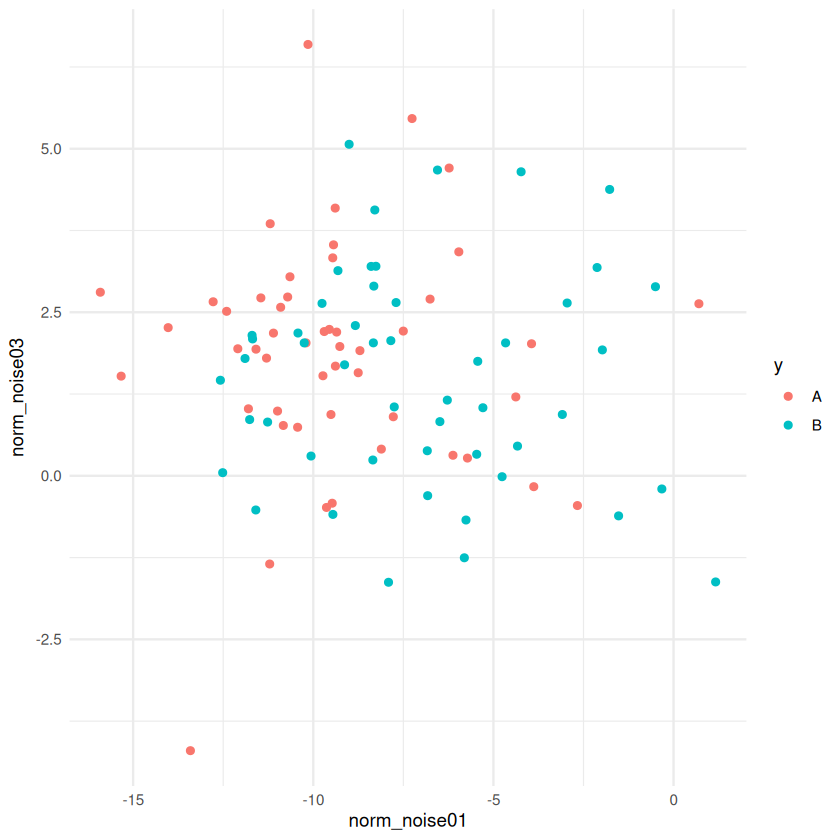

In [158]:
# Create scatter plot
library(ggplot2)
ggplot(df3_short, aes(x=norm_noise01, y=norm_noise03, color=as.factor(y))) +
  geom_point() +
  labs(x="norm_noise01", y="norm_noise03", color="y") +
  theme_minimal()


In [ ]:
xaires_fipv

In [99]:
# Installer et charger le package neuralnet si nécessaire
if (!require(neuralnet)) install.packages("neuralnet")
library(neuralnet)

# Fixer la graine pour la reproductibilité
set.seed(123)

# Générer des données simulées
n_samples <- 100   # nombre d'échantillons
n_features <- 10   # nombre de variables

# Génération d'une matrice de données aléatoires
X <- matrix(rnorm(n_samples * n_features), n_samples, n_features)

# Création d'une variable cible binaire (0 ou 1) basée sur la somme des 3 premières variables + bruit
y <- ifelse(rowSums(X[, 1:3]) + rnorm(n_samples) > 0, 1, 0)

# Combinaison des données dans un data frame
df <- as.data.frame(X)
colnames(df) <- paste0("Var", 1:n_features)
df$y <- y

df <- df3_short
#df <- df[,setdiff(colnames(df), "diff_distrib01")]
#df <- df[,setdiff(colnames(df), "diff_distrib02")]
df$y <- as.factor(df$y)
df$y <- as.numeric(df$y) - 1

# Création de la formule pour neuralnet : Class ~ Var1 + Var2 + ... + Var10

formula_nn <- as.formula("y ~ .")

# Entraînement du MLP avec 2 couches cachées :
# Par exemple, 5 neurones dans la première couche et 3 neurones dans la deuxième couche
nn_model <- neuralnet(formula = formula_nn, 
                      data = df, 
                      hidden = c(5, 3), 
                      linear.output = FALSE)

# Visualisation du réseau de neurones
plot(nn_model)

# display(df)
my_cols <- setdiff(colnames(df), "y")
display(my_cols)
# Prédiction sur le jeu de données d'entraînement
pred <- compute(nn_model, df[, my_cols])
pred_class <- ifelse(pred$net.result > 0.5, 1, 0)

# Affichage de la matrice de confusion
conf_matrix <- table(Predicted = pred_class, Actual = df$y)
print(conf_matrix)




,y,norm_noise01,norm_noise02,norm_noise03,norm_noise04,norm_noise05,norm_noise06,norm_noise07,norm_noise08,norm_noise09,norm_noise10,relVar01,relVar02
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-6.7579263,-3.3814362,2.7013842,6.917487,3.64788335,-8.74980989,10.115755,-3.0977427,3.1188930,-1.8705430,0.9673809,1.2546637
2,0,-3.9421022,-5.6959226,2.0186768,5.683056,7.16002415,0.27518974,5.146080,-12.2983169,6.8702181,-8.1007842,1.3506439,2.4085396
3,0,-15.9105346,-7.0131123,2.8061961,5.948519,0.22929788,-0.33870109,9.230829,2.2621149,6.5701204,0.3842239,0.9979927,2.1829127
4,0,-6.2286309,-2.9702398,4.7048867,9.836800,1.84807022,-2.00218335,6.121042,0.7368492,2.2050291,-4.6985806,1.8341190,3.1074023
5,0,-5.9602028,-7.2991950,3.4237093,6.053884,3.03548390,-6.64634415,7.567280,-8.7317536,1.7469672,-6.3653033,2.1466563,1.2896283
6,0,-9.7313131,-2.9653699,1.5290590,8.274682,-0.53834062,-5.67347703,8.226735,-5.7947500,12.0439163,-4.3746243,2.6020565,1.9421976
7,0,-9.6332383,-2.2048980,-0.4838893,9.574972,2.47304626,-1.97982971,7.568825,-8.3569630,3.6532212,6.1100186,2.5290555,2.3449234
8,0,-9.6954163,-3.8622655,2.2053462,7.688326,1.33758566,2.71713217,4.549246,-12.5105474,4.3084853,-11.1962031,3.4456958,3.2726544
9,0,-10.8314496,-4.4478561,0.7694095,6.100200,-2.52213782,-3.55257652,6.358794,-19.7670519,4.1072515,-4.4829943,2.5973093,1.8226192


[1] "norm_noise01" "norm_noise02" "norm_noise03" "norm_noise04" "norm_noise05"
 [6] "norm_noise06" "norm_noise07" "norm_noise08" "norm_noise09" "norm_noise10"
[11] "relVar01"     "relVar02"

         Actual
Predicted  0  1
        0 50  0
        1  0 50


In [300]:
# Installer et charger le package neuralnet si nécessaire
if (!require(neuralnet)) install.packages("neuralnet")
library(neuralnet)

# Fixer la graine pour la reproductibilité
#set.seed(1234)

df <- df3
df$y <- as.factor(df$y)
df$y <- as.numeric(df$y) - 1

df_train <- df[c(1:25, 76:100),]
# sample y
df_train$y <- sample(df_train$y)

df_test <- df[c(26:75),]
df_test$y <- sample(df_test$y)

# Création de la formule pour neuralnet : Class ~ Var1 + Var2 + ... + Var10

formula_nn <- as.formula("y ~ .")

# Entraînement du MLP avec 2 couches cachées :
# Par exemple, 5 neurones dans la première couche et 3 neurones dans la deuxième couche
nn_model <- neuralnet(formula = formula_nn, 
                      data = df_train,
                      hidden = c(8, 4), 
                      linear.output = FALSE)
                      
importance_table <- NeuralNetTools::olden(nn_model, bar_plot = FALSE)

predict(nn_model, df_test[, setdiff(colnames(df_test), "y")])[,1]

pred_wrapper <- function(object, newdata) {
    predict(object, newdata = newdata)[, 1]
}

shap_values <- explain(nn_model, X = df_test[, setdiff(colnames(df_test), "y")], pred_wrapper = pred_wrapper, nsim = 100)


# Affichage des premières lignes des valeurs SHAP
print(colMeans(abs(shap_values)))
# Affichage du tableau d'importance
print(importance_table)

26           27           28           29           30           31 
0.0001828669 0.0170294461 0.0001607530 0.0001567271 0.2740344506 0.6099436917 
          32           33           34           35           36           37 
0.9040615074 0.1110409671 0.9925400343 0.0001346794 0.0001893941 0.8156835165 
          38           39           40           41           42           43 
0.9880065713 0.9869490693 0.5941248838 0.9043759189 0.9711643853 0.9920903975 
          44           45           46           47           48           49 
0.0009151006 0.0003454904 0.5930932638 0.9923701552 0.1214160073 0.0067627277 
          50           51           52           53           54           55 
0.0397039750 0.9888129362 0.9793751928 0.9535103959 0.9961261211 0.9933834941 
          56           57           58           59           60           61 
0.9952960270 0.9962588653 0.9961953073 0.9873921536 0.9936534836 0.3869604245 
          62           63           64           65           66           67 
0.9962723639 0.0002071569 0.9962723394 0.9209894091 0.8522386515 0.9942417668 
          68           69           70           71           72           73 
0.9962701345 0.9962687578 0.9962711500 0.0460620767 0.9961559885 0.9931167942 
          74           75 
0.9886975845 0.9935023428

  norm_noise01   norm_noise02   norm_noise03   norm_noise04   norm_noise05 
    0.03592611     0.02463201     0.02163382     0.03755518     0.03325347 
  norm_noise06   norm_noise07   norm_noise08   norm_noise09   norm_noise10 
    0.09106031     0.02069671     0.02945042     0.05875364     0.08106661 
diff_distrib01 diff_distrib02       relVar01       relVar02 
    0.04925922     0.11552900     0.03542442     0.14318406 
                 importance
norm_noise01    -52.4019769
norm_noise02      0.3322099
norm_noise03    105.8769584
norm_noise04    109.7028305
norm_noise05     75.1595516
norm_noise06   -302.0960132
norm_noise07    123.2777539
norm_noise08    -73.9176497
norm_noise09   -111.8763008
norm_noise10    -33.9241522
diff_distrib01   20.1204129
diff_distrib02 -119.3553845
relVar01       -285.1764448
relVar02        329.6340005


In [257]:
predict(nn_model, df_test[, setdiff(colnames(df_test), "y")])

26,0.998509134
27,0.998496759
28,0.997733360
29,0.997700005
30,0.998470799
31,0.998034360
32,0.997611127
33,0.998513935
34,0.998414587
35,0.998417974
36,0.998508820


In [11]:
# Installer et charger les packages nécessaires
if (!requireNamespace("randomForest", quietly = TRUE)) install.packages("randomForest")
if (!requireNamespace("fastshap", quietly = TRUE)) install.packages("fastshap")
library(randomForest)
library(fastshap)

# Génération de données simulées
set.seed(123)
n <- 200    # nombre d'observations
p <- 5      # nombre de variables prédictives
X <- data.frame(matrix(rnorm(n * p), nrow = n))
names(X) <- paste0("X", 1:p)
y <- with(X, 3 * X1 - 2 * X2 + rnorm(n))
data <- data.frame(y = y, X)

# Ajustement d'un modèle Random Forest
rf_model <- randomForest(y ~ ., data = data)

# Calcul des valeurs SHAP avec fastshap en spécifiant la fonction de prédiction
shap_values <- explain(rf_model, X = data[, -1], pred_wrapper = predict, nsim = 100)

# Affichage des premières lignes des valeurs SHAP
print(head(shap_values))

# Calcul de l'importance des variables en prenant la moyenne des valeurs absolues des SHAP
shap_importance <- colMeans(abs(shap_values))
print(shap_importance)


          X1         X2          X3          X4         X5
1 -1.6075062 -2.8189268 -0.34942214 -0.46512968 -0.3356404
2 -1.0899206 -1.8533612 -0.14347560 -0.07326237 -0.2261181
3  3.0819169  1.0076625  0.19975299  0.22460206  0.1614697
4  0.4315166 -0.9498230 -0.05527562  0.01241392 -0.2322762
5  0.4657755  0.5714677 -0.17956926 -0.28793977 -0.2785743
6  3.1190309  1.4508178  0.43054590  0.27330281  0.1360959
       X1        X2        X3        X4        X5 
1.6126444 1.1244310 0.1654415 0.1630570 0.2014211 


In [18]:
# Installer et charger les packages nécessaires
if (!requireNamespace("randomForest", quietly = TRUE)) install.packages("randomForest")
if (!requireNamespace("fastshap", quietly = TRUE)) install.packages("fastshap")
library(randomForest)
library(fastshap)

# Génération de données simulées pour la classification
set.seed(123)
n <- 200    # nombre d'observations
p <- 5      # nombre de variables prédictives
X <- data.frame(matrix(rnorm(n * p), nrow = n))
names(X) <- paste0("X", 1:p)

# Création d'une variable réponse binaire (A ou B) basée sur X1
y <- ifelse(X$X1 + rnorm(n) > 0, "A", "B")
data <- data.frame(y = factor(y, levels = c("A", "B")), X)

# Ajustement d'un modèle Random Forest pour la classification
rf_model <- randomForest(y ~ ., data = data)

# Définition d'une fonction de prédiction qui renvoie la probabilité de la classe "A"
pred_wrapper <- function(object, newdata) {
  predict(object, newdata = newdata, type = "prob")[, "A"]
}

# Calcul des valeurs SHAP avec fastshap en spécifiant la fonction de prédiction
shap_values <- explain(rf_model, X = data[, -1], pred_wrapper = pred_wrapper, nsim = 100)

# Affichage des premières lignes des valeurs SHAP
print(head(shap_values))

# Calcul de l'importance des variables en prenant la moyenne des valeurs absolues des SHAP
shap_importance <- colMeans(abs(shap_values))
print(shap_importance)


        X1       X2       X3       X4       X5
1 -0.23182 -0.00976 -0.03566 -0.00792 -0.07890
2 -0.04926 -0.02668 -0.13244 -0.05122 -0.05554
3  0.40348  0.01846  0.01394 -0.00568 -0.00486
4 -0.05212 -0.09914 -0.06138 -0.05184 -0.05886
5  0.05088 -0.04058 -0.04432 -0.02876 -0.08620
6  0.43502  0.05432 -0.04448  0.01034 -0.01860
       X1        X2        X3        X4        X5 
0.2055943 0.0462969 0.0558652 0.0374405 0.0534610 


In [12]:
shap_importance["X1"]

X1 
1.612644

In [105]:
 install.packages("../0047_thesis_axis2/XAItest_0.99.25.tar.gz")

Installing package into ‘/home/gui/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

inferring 'repos = NULL' from 'pkgs'



In [5]:
# Charger les packages nécessaires
library(nnet)

# Assurez-vous que la variable cible est un facteur
df3_short$y <- as.factor(df3_short$y)

# Fixer la graine pour la reproductibilité
set.seed(123)

# Créer un split train/test (par exemple 70% train, 30% test)
n <- nrow(df3_short)
train_idx <- sample(seq_len(n), size = floor(0.5 * n))
train_data <- df3_short[train_idx, ]
test_data  <- df3_short[-train_idx, ]

# Entraîner un MLP (réseau de neurones à une couche cachée)
# Ici, size=5 correspond à 5 neurones dans la couche cachée.
# maxit fixe le nombre maximal d'itérations et decay permet de régulariser le modèle.
mlp_model <- nnet(y ~ ., 
                  data = train_data, 
                  size = 2, 
                  maxit = 200, 
                  decay = 0.1, 
                  trace = FALSE)

# Faire des prédictions sur l'ensemble test
# type = "class" retourne la classe prédite
predictions <- predict(mlp_model, newdata = test_data, type = "class")

# Calculer l'accuracy : proportion de prédictions correctes
accuracy <- mean(predictions == test_data$y)
cat("Test accuracy:", round(accuracy * 100, 2), "%\n")


Test accuracy: 50 %


In [109]:
colnames(df3_short)

[1] "y"            "norm_noise01" "norm_noise02" "norm_noise03" "norm_noise04"
 [6] "norm_noise05" "norm_noise06" "norm_noise07" "norm_noise08" "norm_noise09"
[11] "norm_noise10" "relVar01"     "relVar02"

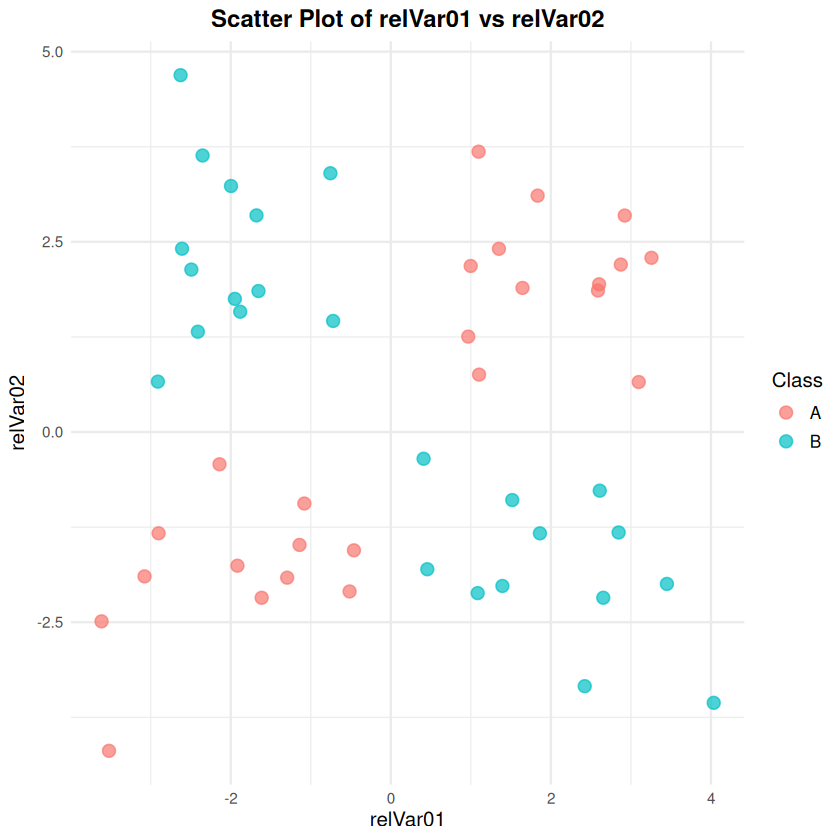

In [118]:
# Load ggplot2 package for visualization
library(ggplot2)

# Create a scatter plot of relVar01 vs relVar02 with points colored by y
ggplot(test_data, aes(x = relVar01, y = relVar02, color = y)) +
  geom_point(size = 3, alpha = 0.7) +
  #scale_color_manual(values = c("0" = "blue", "1" = "red")) +
  labs(
    title = "Scatter Plot of relVar01 vs relVar02",
    x = "relVar01",
    y = "relVar02",
    color = "Class"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )


In [116]:
library(e1071)

# SVM avec noyau RBF (radial)
svm_rbf <- svm(y ~ ., data = train_data, kernel = "radial", cost = 1, gamma = 0.1)

pred_rbf <- predict(svm_rbf, newdata = test_data)
accuracy_rbf <- mean(pred_rbf == test_data$y)
accuracy_rbf


[1] 0.62

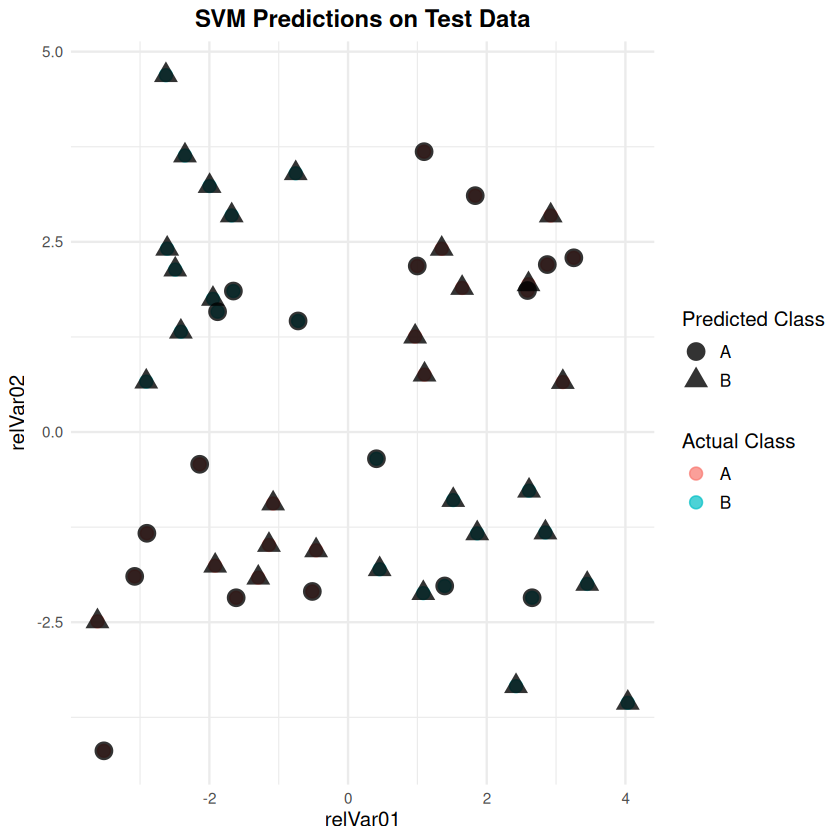

SVM with RBF kernel accuracy: 62 %


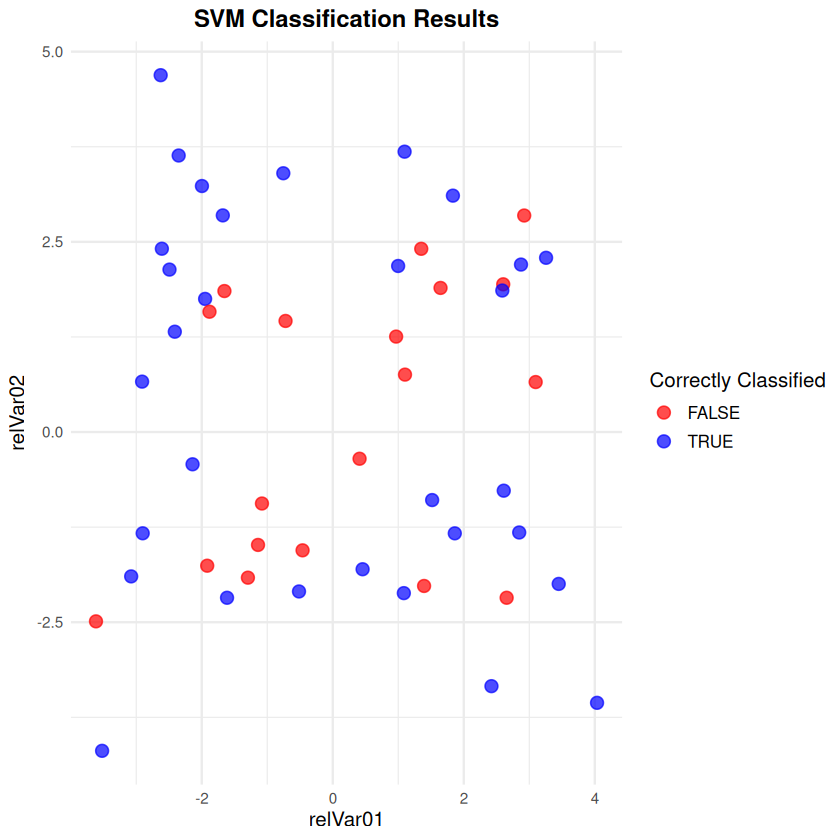

In [117]:
# Create a dataframe with test data and predictions
test_predictions <- data.frame(
  relVar01 = test_data$relVar01,
  relVar02 = test_data$relVar02,
  actual = test_data$y,
  predicted = pred_rbf
)

# Create a scatter plot showing actual vs predicted classes
ggplot() +
  # Plot actual classes with filled circles
  geom_point(data = test_predictions, 
             aes(x = relVar01, y = relVar02, color = actual),
             size = 3, alpha = 0.7) +
  # Plot predicted classes with hollow circles
  geom_point(data = test_predictions, 
             aes(x = relVar01, y = relVar02, shape = predicted),
             size = 4, alpha = 0.8, stroke = 1.5) +
  # Customize the plot appearance
  labs(
    title = "SVM Predictions on Test Data",
    x = "relVar01",
    y = "relVar02",
    color = "Actual Class",
    shape = "Predicted Class"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

# Create a second plot showing misclassifications
test_predictions$correct <- test_predictions$actual == test_predictions$predicted

ggplot(test_predictions, aes(x = relVar01, y = relVar02, color = correct)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("FALSE" = "red", "TRUE" = "blue")) +
  labs(
    title = "SVM Classification Results",
    x = "relVar01",
    y = "relVar02",
    color = "Correctly Classified"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

# Print accuracy as percentage
cat("SVM with RBF kernel accuracy:", round(accuracy_rbf * 100, 2), "%\n")


In [123]:
library(class)

# Préparation
train_x <- train_data[, setdiff(names(train_data), "y")]
train_y <- train_data$y
test_x  <- test_data[, setdiff(names(test_data), "y")]
test_y  <- test_data$y

# k-NN avec k=5 (par exemple)
pred_knn <- knn(train_x, test_x, cl = train_y, k = 20)
accuracy_knn <- mean(pred_knn == test_y)
accuracy_knn


[1] 0.58

In [130]:
library(randomForest)

rf_model <- randomForest(y ~ ., data = train_data, ntree = 100)
pred_rf <- predict(rf_model, newdata = test_data)
accuracy_rf <- mean(pred_rf == test_data$y)
accuracy_rf

[1] 0.54

In [131]:
library(nnet)

mlp_model <- nnet(y ~ ., data = train_data,
                  size = 10,      # plus de neurones
                  maxit = 1000,   # plus d'itérations
                  decay = 0.001,  # régularisation
                  trace = FALSE)

pred_mlp <- predict(mlp_model, newdata = test_data, type = "class")
accuracy_mlp <- mean(pred_mlp == test_data$y)
accuracy_mlp


[1] 0.58

In [ ]:
# Installer et charger keras si nécessaire
# install.packages("keras")
library(keras)

# On suppose que df3_short est déjà chargé, avec 100 lignes x 13 colonnes,
# et que la colonne "y" correspond à la variable de classe.
temp_df <- df5
#temp_df$y <- as.factor(temp_df$y)
# Scale all columns except 'y'
# First, identify all columns except 'y'
cols_to_scale <- setdiff(names(temp_df), "y")

# Apply scaling to those columns
temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

# Verify the scaling worked by checking means and standard deviations
# The means should be approximately 0 and standard deviations approximately 1
col_means <- colMeans(temp_df[cols_to_scale])
col_sds <- apply(temp_df[cols_to_scale], 2, sd)
print("Means after scaling:")
print(col_means)
print("Standard deviations after scaling:")
print(col_sds)


# Fixer la graine pour la reproductibilité
set.seed(123)

# Création d'un split train/test (70% train, 30% test)
n <- nrow(temp_df)
train_idx <- sample(seq_len(n), size = floor(0.7 * n))
train_data <- temp_df[train_idx, ]
test_data  <- temp_df[-train_idx, ]

# Préparation des données :
# Séparer les variables explicatives et la variable cible
X_train <- as.matrix(train_data[, setdiff(names(train_data), "y")])
X_test  <- as.matrix(test_data[, setdiff(names(test_data), "y")])

# Pour le modèle Keras, il faut encoder la variable cible en one-hot
num_classes <- length(levels(temp_df$y))
# Convertir les classes en indices (commençant par 0)
y_train <- as.integer(train_data$y) - 1  
y_test  <- as.integer(test_data$y) - 1

# Encodage one-hot
y_train_cat <- to_categorical(y_train, num_classes = num_classes)
y_test_cat  <- to_categorical(y_test, num_classes = num_classes)

# Construction du modèle MLP
model <- keras_model_sequential() %>%
  # Première couche cachée avec 4 neurones et activation ReLU
  layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
  # Dropout classique (20% des neurones désactivés aléatoirement)
  layer_dropout(rate = 0.2) %>%
  # Deuxième couche cachée avec 2 neurones et activation ReLU
  layer_dense(units = 8, activation = "relu") %>%
    layer_dropout(rate = 0.2) %>%
    
  # Deuxième couche cachée avec 2 neurones et activation ReLU

  # Couche de sortie : softmax pour la classification multi-classes
  layer_dense(units = num_classes, activation = "softmax")

# Compilation du modèle
model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = optimizer_adam(),
  metrics = c("accuracy")
)

# Affichage de la structure du modèle
summary(model)

# Entraînement du modèle
history <- model %>% fit(
  X_train, y_train_cat,
  epochs = 100,          # ajustez le nombre d'epochs selon vos besoins
  batch_size = 32,       # ajustez la taille de batch
  validation_split = 0.2,
  verbose = 1
)

# Évaluation sur l'ensemble de test
score <- model %>% evaluate(X_test, y_test_cat)
score
# display scatter plots of prediction on
#a(15,5)
#b()

[1] "Means after scaling:"
 norm_noise01  norm_noise02  norm_noise03  norm_noise04  norm_noise05 
-4.003742e-17 -1.947054e-16 -1.428718e-16  4.854624e-17 -7.412473e-17 
 norm_noise06  norm_noise07  norm_noise08  norm_noise09  norm_noise10 
-2.398949e-16  9.141993e-18 -9.298118e-18 -3.308985e-18 -5.282233e-17 
 unif_noise01  unif_noise02  unif_noise03  unif_noise04  unif_noise05 
-1.856154e-17  1.665335e-18 -1.038059e-16  5.093148e-17 -6.987466e-17 
 unif_noise06  unif_noise07  unif_noise08  unif_noise09  unif_noise10 
-4.156397e-17  2.708771e-17 -5.763185e-17 -1.998401e-17 -6.556387e-17 
[1] "Standard deviations after scaling:"
norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           1            1            1            1            1            1 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           1            1            1            1            1            1 
unif_noise03 unif_noise04 unif_noise05 unif_nois

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_11 (Dense)                   (None, 16)                      336         
 dropout_7 (Dropout)                (None, 16)                      0           
 dense_10 (Dense)                   (None, 8)                       136         
 dropout_6 (Dropout)                (None, 8)                       0           
 dense_9 (Dense)                    (None, 0)                       0           
Total params: 472 (1.84 KB)
Trainable params: 472 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


ERROR: in user code:

    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/gui/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 0) are incompatible


Moyennes après scaling:
 norm_noise01  norm_noise02  norm_noise03  norm_noise04  norm_noise05 
-4.003742e-17 -1.947054e-16 -1.428718e-16  4.854624e-17 -7.412473e-17 
 norm_noise06  norm_noise07  norm_noise08  norm_noise09  norm_noise10 
-2.398949e-16  9.141993e-18 -9.298118e-18 -3.308985e-18 -5.282233e-17 
 unif_noise01  unif_noise02  unif_noise03  unif_noise04  unif_noise05 
-1.856154e-17  1.665335e-18 -1.038059e-16  5.093148e-17 -6.987466e-17 
 unif_noise06  unif_noise07  unif_noise08  unif_noise09  unif_noise10 
-4.156397e-17  2.708771e-17 -5.763185e-17 -1.998401e-17 -6.556387e-17 
Écart-types après scaling:
norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           1            1            1            1            1            1 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
           1            1            1            1            1            1 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 

Model: "sequential_8"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_26 (Dense)                   (None, 16)                      336         
 dropout_17 (Dropout)               (None, 16)                      0           
 dense_25 (Dense)                   (None, 8)                       136         
 dropout_16 (Dropout)               (None, 8)                       0           
 dense_24 (Dense)                   (None, 1)                       9           
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________
               loss mean_absolute_error 
           2.701522            1.343930 


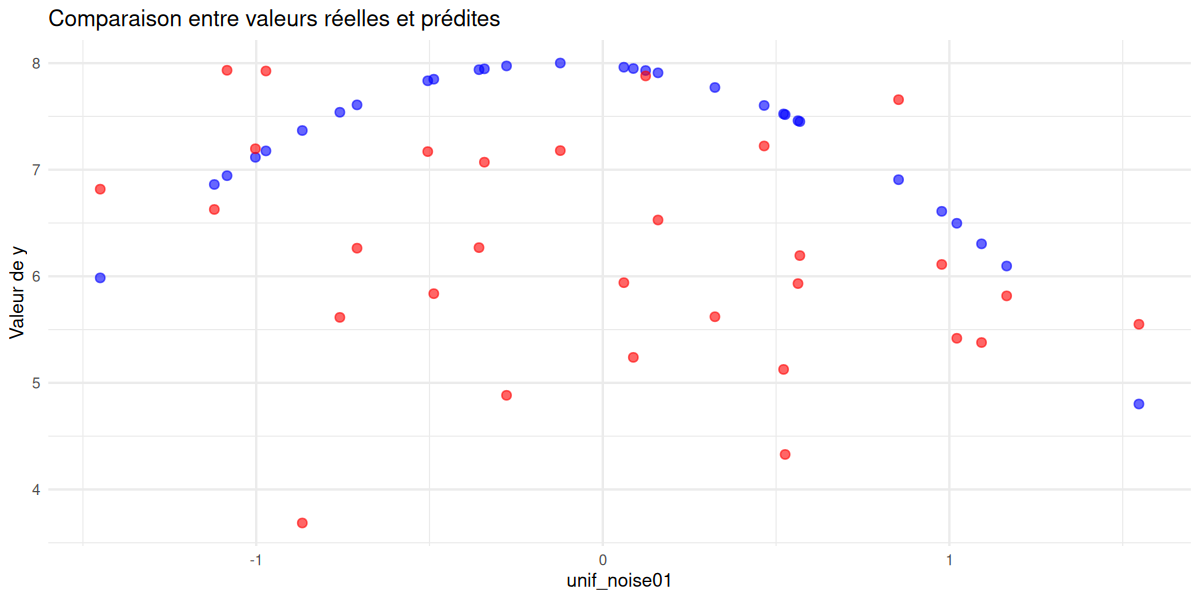

In [24]:
# Installer et charger keras si nécessaire
# install.packages("keras")
library(keras)

# On suppose que df5 est déjà chargé et que la colonne "y" est une valeur continue.
temp_df <- df5
#temp_df$y <- temp_df$norm_noise01

# Scale all columns except 'y'
cols_to_scale <- setdiff(names(temp_df), "y")
temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

# Vérifier le scaling : les moyennes devraient être proches de 0 et les écart-types proches de 1
cat("Moyennes après scaling:\n")
print(colMeans(temp_df[cols_to_scale]))
cat("Écart-types après scaling:\n")
print(apply(temp_df[cols_to_scale], 2, sd))

# Fixer la graine pour la reproductibilité
set.seed(123)

# Création d'un split train/test (70% train, 30% test)
n <- nrow(temp_df)
train_idx <- sample(seq_len(n), size = floor(0.7 * n))
train_data <- temp_df[train_idx, ]
test_data  <- temp_df[-train_idx, ]

# Préparation des données : séparer les variables explicatives (X) et la variable cible (y)
X_train <- as.matrix(train_data[, setdiff(names(train_data), "y")])
X_test  <- as.matrix(test_data[, setdiff(names(test_data), "y")])

# Ici, y est une variable numérique continue, donc pas besoin d'encodage
y_train <- train_data$y
y_test  <- test_data$y

# Construction du modèle MLP adapté à la régression
model <- keras_model_sequential() %>%
  # Première couche cachée avec 16 neurones et activation ReLU
  layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
  layer_dropout(rate = 0.2) %>%
  # Deuxième couche cachée avec 8 neurones et activation ReLU
  layer_dense(units = 8, activation = "relu") %>%
  layer_dropout(rate = 0.2) %>%
  # Couche de sortie avec 1 neurone et activation linéaire (adapté pour la régression)
  layer_dense(units = 1)

# Compilation du modèle avec la fonction de perte MSE et l'optimiseur Adam
model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

# Affichage de la structure du modèle
summary(model)

# Entraînement du modèle
history <- model %>% fit(
  X_train, y_train,
  epochs = 5000,          # ajustez le nombre d'epochs selon vos besoins
  batch_size = 32,       # ajustez la taille de batch
  validation_split = 0.2,
  verbose = 1
)

# Évaluation sur l'ensemble de test
score <- model %>% evaluate(X_test, y_test)
print(score)

# Obtenir les prédictions pour le jeu de test (attention : les prédictions retournent un vecteur/matrice)
predictions <- model %>% predict(X_test)

# Ajouter les prédictions à test_data (attention à la dimension de predictions)
test_data$pred <- as.vector(predictions)

# Charger ggplot2
library(ggplot2)

# Créer le graphique
ggplot(test_data, aes(x = norm_noise01)) +
  # Points des valeurs réelles
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  # Points des valeurs prédites
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison entre valeurs réelles et prédites",
       x = "unif_noise01",
       y = "Valeur de y") +
  theme_minimal()


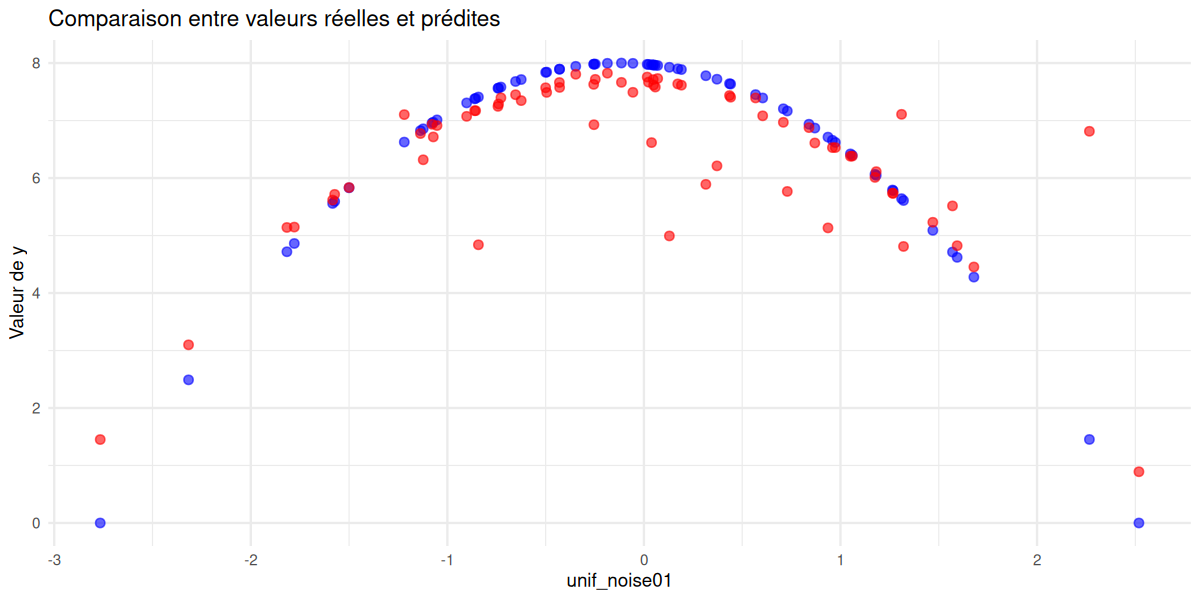

In [25]:
predictions <- model %>% predict(X_train)

# Ajouter les prédictions à test_data (attention à la dimension de predictions)
train_data$pred <- as.vector(predictions)

# Charger ggplot2
library(ggplot2)

# Créer le graphique
ggplot(train_data, aes(x = norm_noise01)) +
  # Points des valeurs réelles
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  # Points des valeurs prédites
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison entre valeurs réelles et prédites",
       x = "unif_noise01",
       y = "Valeur de y") +
  theme_minimal()

Test MSE: 19.06797 
Test MAE: 3.338993 


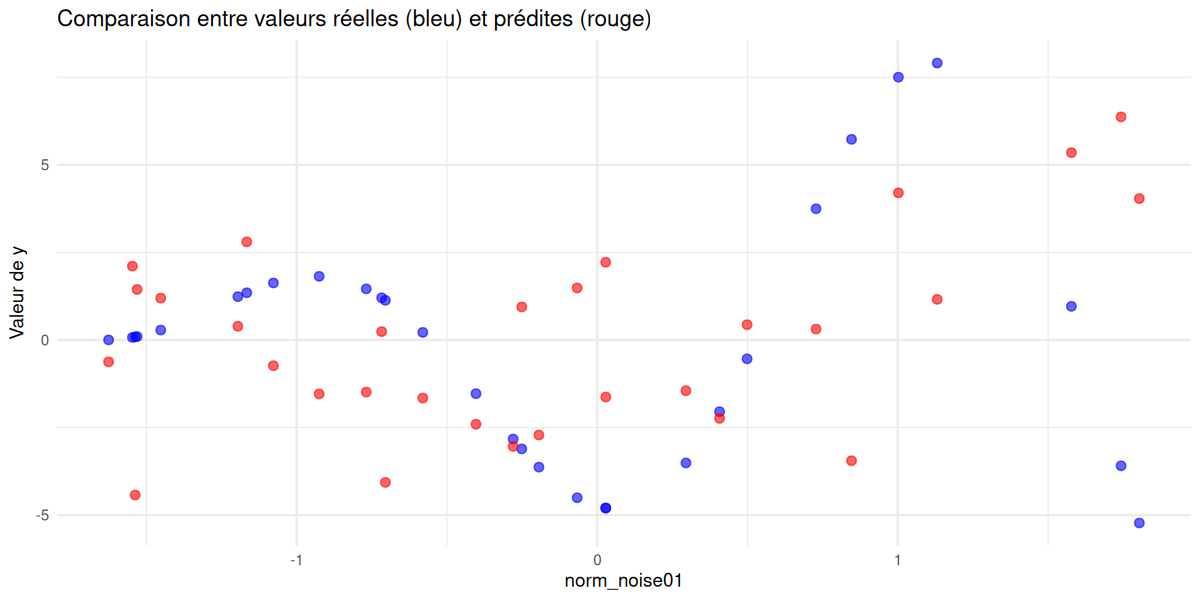

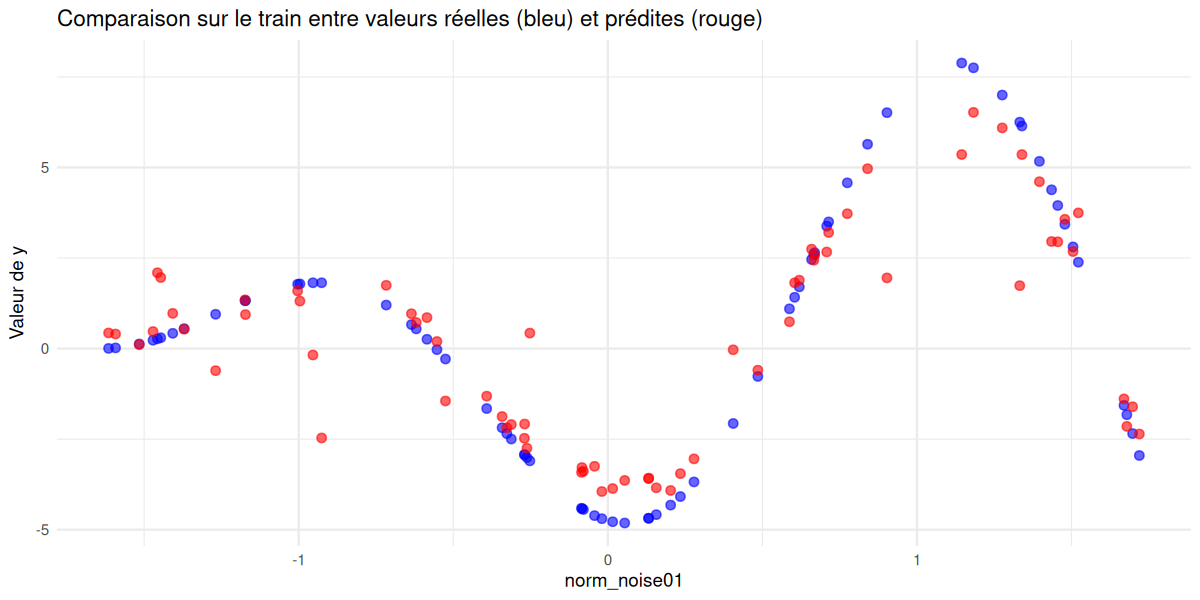

In [ ]:
# Installer et charger keras si nécessaire
# install.packages("keras")
library(keras)
library(ggplot2)

# ---------------------- 
# 1. Préparation des données
# ----------------------

# On suppose que df5 est déjà chargé et que la colonne "y" est une valeur continue.
temp_df <- df6

# Scale all columns except 'y'
cols_to_scale <- setdiff(names(temp_df), "y")
temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

# Fixer la graine pour la reproductibilité
set.seed(123)

# Split train/test (70% train, 30% test)
n <- nrow(temp_df)
train_idx <- sample(seq_len(n), size = floor(0.7 * n))
train_data <- temp_df[train_idx, ]
test_data  <- temp_df[-train_idx, ]

X_train <- as.matrix(train_data[, setdiff(names(train_data), "y")])
X_test  <- as.matrix(test_data[, setdiff(names(test_data), "y")])

y_train <- train_data$y
y_test  <- test_data$y

# ---------------------- 
# 2. Construction du modèle
# ----------------------

model <- keras_model_sequential() %>%
  layer_dense(
    units = 16, 
    activation = "relu", 
    input_shape = ncol(X_train),
    kernel_regularizer = regularizer_l2(l = 0.01)  # Régularisation L2
  ) %>%
  layer_dropout(rate = 0.2) %>%
  
  layer_dense(
    units = 8, 
    activation = "relu",
    kernel_regularizer = regularizer_l2(l = 0.01)  # Régularisation L2
  ) %>%
  layer_dropout(rate = 0.2) %>%
  
  # Couche de sortie pour la régression (1 neurone, activation linéaire par défaut)
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(learning_rate = 0.01),
  metrics = c("mean_absolute_error")
)

# ---------------------- 
# 3. Callbacks pour mieux généraliser
# ----------------------

# Early stopping : on arrête si val_loss ne s'améliore plus au bout de 50 epochs
early_stop <- callback_early_stopping(
  monitor = "val_loss", 
  patience = 500, 
  restore_best_weights = TRUE
)

# Reduce LR on plateau : si val_loss stagne, on réduit le lr de 50%
reduce_lr <- callback_reduce_lr_on_plateau(
  monitor = "val_loss",
  factor = 0.5,
  patience = 200,
  verbose = 1
)

# ---------------------- 
# 4. Entraînement
# ----------------------

history <- model %>% fit(
  x = X_train, y = y_train,
  epochs = 5000,       # On met un nombre d'epochs large, early stopping arrêtera au besoin
  batch_size = 32,
  validation_split = 0.2,
  verbose = 1,
  callbacks = list(early_stop, reduce_lr)
)

# ---------------------- 
# 5. Évaluation
# ----------------------

score <- model %>% evaluate(X_test, y_test)
cat("Test MSE:", score[[1]], "\n")
cat("Test MAE:", score[[2]], "\n")

# ---------------------- 
# 6. Prédictions + Visualisation (Test set)
# ----------------------

pred_test <- model %>% predict(X_test)
test_data$pred <- as.vector(pred_test)

# Pour l'affichage, on suppose que la colonne d'intérêt sur l'axe des X est "norm_noise01"
# (ou "unif_noise01", en fonction de la cohérence des noms de colonnes)
ggplot(test_data, aes(x = unif_noise01)) +
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison entre valeurs réelles (bleu) et prédites (rouge)",
       x = "norm_noise01",
       y = "Valeur de y") +
  theme_minimal()

# ---------------------- 
# 7. Prédictions + Visualisation (Train set)
# ----------------------

pred_train <- model %>% predict(X_train)
train_data$pred <- as.vector(pred_train)

ggplot(train_data, aes(x = unif_noise01)) +
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison sur le train entre valeurs réelles (bleu) et prédites (rouge)",
       x = "norm_noise01",
       y = "Valeur de y") +
  theme_minimal()


Test MSE: 2.128579 
Test MAE: 1.165806 


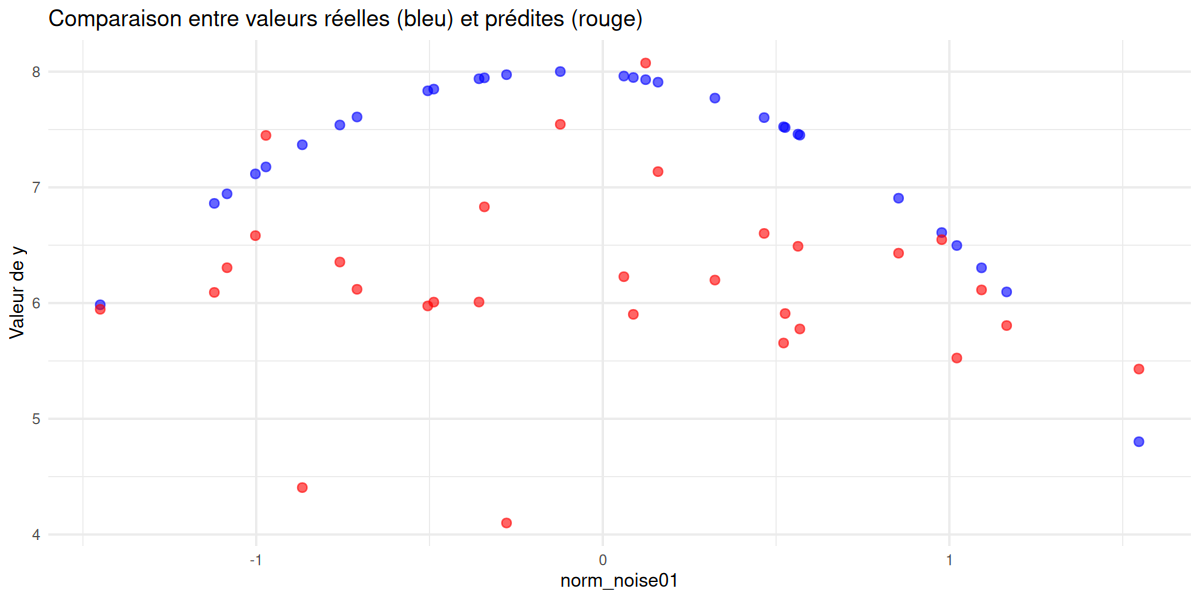

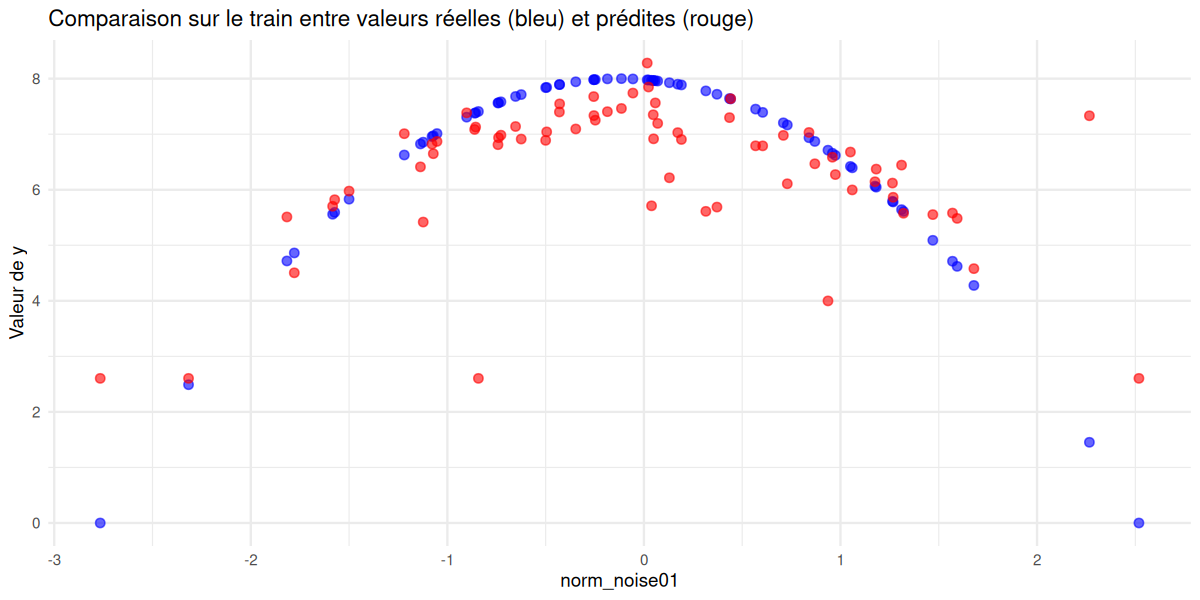

In [38]:
# Installer et charger keras si nécessaire
# install.packages("keras")
library(keras)
library(ggplot2)

# ---------------------- 
# 1. Préparation des données
# ----------------------

# On suppose que df5 est déjà chargé et que la colonne "y" est une valeur continue.
temp_df <- df5

# Scale all columns except 'y'
cols_to_scale <- setdiff(names(temp_df), "y")
temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

# Fixer la graine pour la reproductibilité
set.seed(123)

# Split train/test (70% train, 30% test)
n <- nrow(temp_df)
train_idx <- sample(seq_len(n), size = floor(0.7 * n))
train_data <- temp_df[train_idx, ]
test_data  <- temp_df[-train_idx, ]

X_train <- as.matrix(train_data[, setdiff(names(train_data), "y")])
X_test  <- as.matrix(test_data[, setdiff(names(test_data), "y")])

y_train <- train_data$y
y_test  <- test_data$y

# ---------------------- 
# 2. Construction du modèle
# ----------------------

model <- keras_model_sequential() %>%
  layer_dense(
    units = 8, 
    activation = "relu", 
    input_shape = ncol(X_train),
    kernel_regularizer = regularizer_l2(l = 0.0001)  # Régularisation L2
  ) %>%
  layer_dropout(rate = 0.2) %>%
  
  layer_dense(
    units = 4, 
    activation = "relu",
    kernel_regularizer = regularizer_l2(l = 0.0001)  # Régularisation L2
  ) %>%
  
  # Couche de sortie pour la régression (1 neurone, activation linéaire par défaut)
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(learning_rate = 0.1),
  metrics = c("mean_absolute_error")
)

# ---------------------- 
# 3. Callbacks pour mieux généraliser
# ----------------------

# Early stopping : on arrête si val_loss ne s'améliore plus au bout de 50 epochs
early_stop <- callback_early_stopping(
  monitor = "val_loss", 
  patience = 500, 
  restore_best_weights = TRUE
)

# Reduce LR on plateau : si val_loss stagne, on réduit le lr de 50%
reduce_lr <- callback_reduce_lr_on_plateau(
  monitor = "val_loss",
  factor = 0.5,
  patience = 200,
  verbose = 1
)

# ---------------------- 
# 4. Entraînement
# ----------------------

history <- model %>% fit(
  x = X_train, y = y_train,
  epochs = 5000,       # On met un nombre d'epochs large, early stopping arrêtera au besoin
  batch_size = 32,
  validation_split = 0.2,
  verbose = 1,
  callbacks = list(early_stop, reduce_lr)
)

# ---------------------- 
# 5. Évaluation
# ----------------------

score <- model %>% evaluate(X_test, y_test)
cat("Test MSE:", score[[1]], "\n")
cat("Test MAE:", score[[2]], "\n")

# ---------------------- 
# 6. Prédictions + Visualisation (Test set)
# ----------------------

pred_test <- model %>% predict(X_test)
test_data$pred <- as.vector(pred_test)

# Pour l'affichage, on suppose que la colonne d'intérêt sur l'axe des X est "norm_noise01"
# (ou "unif_noise01", en fonction de la cohérence des noms de colonnes)
ggplot(test_data, aes(x = norm_noise01)) +
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison entre valeurs réelles (bleu) et prédites (rouge)",
       x = "norm_noise01",
       y = "Valeur de y") +
  theme_minimal()

# ---------------------- 
# 7. Prédictions + Visualisation (Train set)
# ----------------------

pred_train <- model %>% predict(X_train)
train_data$pred <- as.vector(pred_train)

ggplot(train_data, aes(x = norm_noise01)) +
  geom_point(aes(y = y), color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(y = pred), color = "red", alpha = 0.6, size = 2) +
  labs(title = "Comparaison sur le train entre valeurs réelles (bleu) et prédites (rouge)",
       x = "norm_noise01",
       y = "Valeur de y") +
  theme_minimal()


In [43]:
model

Model: "sequential_21"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_66 (Dense)                   (None, 8)                       168         
 dropout_42 (Dropout)               (None, 8)                       0           
 dense_65 (Dense)                   (None, 4)                       36          
 dense_64 (Dense)                   (None, 1)                       5           
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

In [ ]:
        pred_wrapper <- function(object, newdata, ...) {
            predict(object, newdata)[, 1]
        }
        shap_values <- fastshap::explain(object=model, X = X_train, pred_wrapper = pred_wrapper, nsim = 2)
        shap_values <- colMeans(abs(shap_values))
        shap_values

norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
   0.1597615    0.1283176    0.2213866    0.2662992    0.1635088    0.2989622 
norm_noise07 norm_noise08 norm_noise09 norm_noise10 unif_noise01 unif_noise02 
   0.3329265    0.1871722    0.1585668    0.1754355    0.1585323    0.3774220 
unif_noise03 unif_noise04 unif_noise05 unif_noise06 unif_noise07 unif_noise08 
   0.2090636    0.1429261    0.2369244    0.3981301    0.1726061    0.1349369 
unif_noise09 unif_noise10 
   0.2272390    0.1143131

In [10]:
# Installer et charger keras si nécessaire
# install.packages("keras")
# my_keras 
library(keras)

# On suppose que df3_short est déjà chargé, avec 100 lignes x 13 colonnes,
# et que la colonne "y" correspond à la variable de classe.
temp_df <- df3_short
temp_df$y <- as.factor(temp_df$y)
# Scale all columns except 'y'
# First, identify all columns except 'y'
cols_to_scale <- setdiff(names(temp_df), "y")

# Apply scaling to those columns
temp_df[cols_to_scale] <- scale(temp_df[cols_to_scale])

# Verify the scaling worked by checking means and standard deviations
# The means should be approximately 0 and standard deviations approximately 1
col_means <- colMeans(temp_df[cols_to_scale])
col_sds <- apply(temp_df[cols_to_scale], 2, sd)
print("Means after scaling:")
print(col_means)
print("Standard deviations after scaling:")
print(col_sds)


# Fixer la graine pour la reproductibilité
set.seed(123)

# Création d'un split train/test (70% train, 30% test)
n <- nrow(temp_df)
train_idx <- sample(seq_len(n), size = floor(0.7 * n))
train_data <- temp_df[train_idx, ]
test_data  <- temp_df[-train_idx, ]

# Préparation des données :
# Séparer les variables explicatives et la variable cible
X_train <- as.matrix(train_data[, setdiff(names(train_data), "y")])
X_test  <- as.matrix(test_data[, setdiff(names(test_data), "y")])

# Pour le modèle Keras, il faut encoder la variable cible en one-hot
num_classes <- length(levels(temp_df$y))
# Convertir les classes en indices (commençant par 0)
y_train <- as.integer(train_data$y) - 1  
y_test  <- as.integer(test_data$y) - 1

# Encodage one-hot
y_train_cat <- to_categorical(y_train, num_classes = num_classes)
y_test_cat  <- to_categorical(y_test, num_classes = num_classes)

# Construction du modèle MLP
model <- keras_model_sequential() %>%
  # Première couche cachée avec 4 neurones et activation ReLU
  layer_dense(units = 16, activation = "relu", input_shape = ncol(X_train)) %>%
  # Dropout classique (20% des neurones désactivés aléatoirement)
  layer_dropout(rate = 0.2) %>%
  # Deuxième couche cachée avec 2 neurones et activation ReLU
  layer_dense(units = 8, activation = "relu") %>%
    layer_dropout(rate = 0.2) %>%
    
  # Deuxième couche cachée avec 2 neurones et activation ReLU

  # Couche de sortie : softmax pour la classification multi-classes
  layer_dense(units = num_classes, activation = "softmax")

# Compilation du modèle
model %>% compile(
  loss = "categorical_crossentropy",
  optimizer = optimizer_adam(),
  metrics = c("accuracy")
)

# Affichage de la structure du modèle
summary(model)

# Entraînement du modèle
history <- model %>% fit(
  X_train, y_train_cat,
  epochs = 5000,          # ajustez le nombre d'epochs selon vos besoins
  batch_size = 32,       # ajustez la taille de batch
  validation_split = 0.2,
  verbose = 1
)

# Évaluation sur l'ensemble de test
score <- model %>% evaluate(X_test, y_test_cat)
score
# display scatter plots of prediction on
a(15,5)
b()

[1] "Means after scaling:"
 norm_noise01  norm_noise02  norm_noise03  norm_noise04  norm_noise05 
-1.200429e-17  5.308254e-18  1.657528e-17  1.977585e-17  3.001072e-17 
 norm_noise06  norm_noise07  norm_noise08  norm_noise09  norm_noise10 
 3.080869e-17  6.588046e-17  4.021089e-17  8.916479e-18 -6.661338e-18 
     relVar01      relVar02 
-2.040035e-17  1.831868e-17 
[1] "Standard deviations after scaling:"
norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
           1            1            1            1            1            1 
norm_noise07 norm_noise08 norm_noise09 norm_noise10     relVar01     relVar02 
           1            1            1            1            1            1 


Model: "sequential_6"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_20 (Dense)                   (None, 16)                      208         
 dropout_13 (Dropout)               (None, 16)                      0           
 dense_19 (Dense)                   (None, 8)                       136         
 dropout_12 (Dropout)               (None, 8)                       0           
 dense_18 (Dense)                   (None, 2)                       18          
Total params: 362 (1.41 KB)
Trainable params: 362 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


loss  accuracy 
7.0185251 0.6666667

ERROR: Error in b(): could not find function "b"


In [24]:
# Si fastshap n'est pas installé, décommentez la ligne suivante :
# install.packages("fastshap")
library(fastshap)
library(ggplot2)

# Définir une fonction de prédiction pour le modèle Keras.
# Ici, on récupère la probabilité de la première classe.
pred_fun <- function(object, newdata) {
  # predict renvoie une matrice de probabilités pour chaque classe,
  # ici on sélectionne la première colonne.
  predict(object, newdata)[, 1]
}

# Calculer les valeurs SHAP approximatives avec fastshap.
# 'nsim' correspond au nombre de simulations Monte Carlo pour l'approximation.
set.seed(123)
shap_values <- fastshap::explain(
  object = model,      # Votre modèle Keras
  X = X_train,         # Jeu de données d'entraînement (matrice)
  pred_wrapper = pred_fun,
  nsim = 5          # Augmentez nsim pour une estimation plus précise
)

# Calculer l'importance des features comme la moyenne des valeurs absolues des SHAP values
feature_importance <- colMeans(abs(shap_values))
print("Importance des features (moyenne des valeurs absolues des SHAP) :")
print(feature_importance)



[1] "Importance des features (moyenne des valeurs absolues des SHAP) :"
norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
  0.06689423   0.03005597   0.01750779   0.04060525   0.03069149   0.03374703 
norm_noise07 norm_noise08 norm_noise09 norm_noise10     relVar01     relVar02 
  0.02764321   0.03801069   0.04850297   0.05126205   0.04362158   0.03906485 


In [56]:
# Extraire les poids du modèle Keras
weights <- model %>% get_weights()

# Vérifiez la structure des poids
# Par exemple, avec summary(weights[[1]]), summary(weights[[3]]), summary(weights[[5]])
# On suppose :
# W1 : weights[[1]]  -> dimensions : nb_features x 16
# W2 : weights[[3]]  -> dimensions : 16 x 8
# W3 : weights[[5]]  -> dimensions : 8 x num_classes

W1 <- weights[[1]]
W2 <- weights[[3]]
W3 <- weights[[5]]

n_features <- dim(W1)[1]
n_hidden1 <- dim(W1)[2]  # 16
n_hidden2 <- dim(W2)[2]  # 8
n_outputs <- dim(W3)[2]  # num_classes

# Initialiser un vecteur pour stocker l'importance de chaque feature
feature_importance <- rep(0, n_features)

# Pour chaque feature, on somme les contributions absolues de tous les chemins menant aux sorties
for (i in 1:n_features) {
  for (j in 1:n_hidden1) {
    for (k in 1:n_hidden2) {
      for (l in 1:n_outputs) {
        feature_importance[i] <- feature_importance[i] + abs(W1[i, j] * W2[j, k] * W3[k, l])
      }
    }
  }
}

# Donner des noms aux variables d'entrée, par exemple en utilisant les colonnes de X_train
names(feature_importance) <- colnames(X_train)

# Afficher les importances calculées
print("Feature importance (méthode Olden approximative) :")
print(feature_importance)


[1] "Feature importance (méthode Olden approximative) :"
norm_noise01 norm_noise02 norm_noise03 norm_noise04 norm_noise05 norm_noise06 
    62.76556     54.56071     32.44394     58.85107     40.91489     53.92813 
norm_noise07 norm_noise08 norm_noise09 norm_noise10     relVar01     relVar02 
    43.43366     35.70496     71.65305     48.67739    107.67014    122.61447 


In [43]:

# Création de deux graphiques pour visualiser les variables relVar01 et relVar02
# avec coloration selon la catégorie prédite (test et train)

b <- function(){

# Obtenir les prédictions du modèle sur les données de test
test_predictions <- model %>% predict(X_test)
test_predicted_classes <- apply(test_predictions, 1, which.max) - 1  # Convertir de one-hot à indices de classe (0-based)

# Obtenir les prédictions du modèle sur les données d'entraînement
train_predictions <- model %>% predict(X_train)
train_predicted_classes <- apply(train_predictions, 1, which.max) - 1  # Convertir de one-hot à indices de classe (0-based)

# Créer des dataframes pour la visualisation
test_viz_df <- data.frame(
  relVar01 = X_test[, "relVar01"],
  relVar02 = X_test[, "relVar02"],
  Category = factor(test_predicted_classes)
)

train_viz_df <- data.frame(
  relVar01 = X_train[, "relVar01"],
  relVar02 = X_train[, "relVar02"],
  Category = factor(train_predicted_classes)
)

# Créer un dataframe pour les données originales de test
original_viz_df <- data.frame(
  relVar01 = X_test[, "relVar01"],
  relVar02 = X_test[, "relVar02"],
  Category = factor(y_test)
)

# Créer les graphiques avec ggplot2
test_plot <- ggplot(test_viz_df, aes(x = relVar01, y = relVar02, color = Category)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_manual(values = c("0" = "blue", "1" = "red")) +
  labs(
    title = "Prédictions sur données de test",
    x = "relVar01",
    y = "relVar02",
    color = "Catégorie prédite"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5)
  )

train_plot <- ggplot(train_viz_df, aes(x = relVar01, y = relVar02, color = Category)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_manual(values = c("0" = "blue", "1" = "red")) +
  labs(
    title = "Prédictions sur données d'entraînement",
    x = "relVar01",
    y = "relVar02",
    color = "Catégorie prédite"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5)
  )

original_plot <- ggplot(original_viz_df, aes(x = relVar01, y = relVar02, color = Category)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_manual(values = c("0" = "blue", "1" = "red")) +
  labs(
    title = "Données originales de test",
    x = "relVar01",
    y = "relVar02",
    color = "Catégorie réelle"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(hjust = 0.5)
  )

# Afficher les graphiques côte à côte
library(gridExtra)
grid.arrange(test_plot, train_plot, original_plot, ncol = 3)

# Afficher le graphique sans titre dans la console
cat("plot without title\n")
}